# Table of Contents
 <p><div class="lev1"><a href="#Setup-1">Setup</a></div><div class="lev2"><a href="#Initial-device-check-1.1">Initial device check</a></div><div class="lev2"><a href="#QPC-trace-sweeping-2-gates-1.2">QPC trace sweeping 2 gates</a></div><div class="lev2"><a href="#QPC-trace-1-gate-1.3">QPC trace 1 gate</a></div><div class="lev2"><a href="#set-DAC-1.4">set DAC</a></div><div class="lev2"><a href="#DC-2D-measurement-1.5">DC 2D measurement</a></div><div class="lev2"><a href="#RF-resonance-search-1.6">RF resonance search</a></div><div class="lev2"><a href="#Optimize-Vps-1.7">Optimize Vps</a></div><div class="lev1"><a href="#AWG-2">AWG</a></div><div class="lev2"><a href="#Amplitude-calibr-2.1">Amplitude calibr</a></div><div class="lev2"><a href="#Marker-Amp-calibr-2.2">Marker Amp calibr</a></div><div class="lev2"><a href="#V-pulse-2.3">V pulse</a></div><div class="lev1"><a href="#Scans-3">Scans</a></div><div class="lev2"><a href="#1D-2D-scan-without-pulse-trig-3.1">1D-2D scan without pulse trig</a></div><div class="lev2"><a href="#time-traces-3.2">time traces</a></div><div class="lev3"><a href="#tunneling-event-3.2.1">tunneling event</a></div><div class="lev3"><a href="#time-trace-repeat&amp;average-3.2.2">time trace repeat&amp;average</a></div><div class="lev1"><a href="#Pulses-4">Pulses</a></div><div class="lev2"><a href="#test-2-AWGs-4.1">test 2 AWGs</a></div><div class="lev3"><a href="#T-+-4.1.1">T +</a></div><div class="lev3"><a href="#T-faster-4.1.2">T faster</a></div><div class="lev3"><a href="#map-ST+-crossing-4.1.3">map ST+ crossing</a></div><div class="lev4"><a href="#2D-mapping-4.1.3.1">2D mapping</a></div><div class="lev3"><a href="#Empty-4.1.4">Empty</a></div><div class="lev3"><a href="#Test-AWG-resolu-4.1.5">Test AWG resolu</a></div><div class="lev3"><a href="#Step-pulse-for-tunnleing-4.1.6">Step pulse for tunnleing</a></div><div class="lev3"><a href="#Rectangle-pulse-4.1.7">Rectangle pulse</a></div><div class="lev3"><a href="#RAP-4.1.8">RAP</a></div><div class="lev3"><a href="#RAP-with-d.compen-4.1.9">RAP with d.compen</a></div><div class="lev3"><a href="#One-stage-to-|S>-4.1.10">One stage to |S&gt;</a></div><div class="lev3"><a href="#two-stage-updown-new-4.1.11">two stage updown new</a></div><div class="lev3"><a href="#1st-order-transition-4.1.12">1st order transition</a></div><div class="lev3"><a href="#1st-order-with-2-stage-4.1.13">1st order with 2 stage</a></div><div class="lev3"><a href="#Pulse-barri-with-RAP-4.1.14">Pulse barri with RAP</a></div><div class="lev3"><a href="#Pulse-barrier-with-RAP,-d.compensate-4.1.15">Pulse barrier with RAP, d.compensate</a></div><div class="lev3"><a href="#Pulse-barri-with-2-stage-4.1.16">Pulse barri with 2 stage</a></div><div class="lev3"><a href="#Test-delays-of-AWG-channels-4.1.17">Test delays of AWG channels</a></div><div class="lev3"><a href="#T0-4.1.18">T0</a></div><div class="lev3"><a href="#T0-with-meta-4.1.19">T0 with meta</a></div><div class="lev3"><a href="#Meas-T+-in-Meta-4.1.20">Meas T+ in Meta</a></div><div class="lev3"><a href="#SWAP-4.1.21">SWAP</a></div><div class="lev1"><a href="#Measurements-5">Measurements</a></div><div class="lev3"><a href="#single-shot-5.0.1">single shot</a></div><div class="lev2"><a href="#Evol_time-dependence-5.1">Evol_time dependence</a></div><div class="lev3"><a href="#one-5.1.1">one</a></div><div class="lev3"><a href="#SWAP-5.1.2">SWAP</a></div><div class="lev3"><a href="#loop-5.1.3">loop</a></div><div class="lev3"><a href="#loop-pulse-5.1.4">loop pulse</a></div><div class="lev2"><a href="#delay-setting-5.2">delay setting</a></div><div class="lev2"><a href="#Sweep-2-gates-along-detuning-5.3">Sweep 2 gates along detuning</a></div>

# Setup

In [1]:
%matplotlib notebook

from __future__ import division
from time import sleep, time, strftime

import expdata2018 as ex
import takatools2018new as tk

from instr import world as w
from TUDAC import TUDAC
from AGE4432B import AGE4432B
import AlazarDigitizer.alazar_digitizer as ad
from MercuryIPS import IPS
from YK7651 import YK7651
import Keithley2450
from waveform_lazy import waveform
from AWG70000 import AWG70000
from AWG7000test  import AWG7000
from AWG520  import AWG520
import AG34401A
#from GS200_new_Mi import GS200


import numpy as np
import matplotlib.pyplot as plt
import lmfit

DAC   = TUDAC(addr=5, interface='Serial')
w.L   = DAC.ch1(min=-2., max=0.8, step=0.01)
w.PL  = DAC.ch2(min=-2., max=0.4, step=0.01)
w.T   = DAC.ch3(min=-2., max=0.4, step=0.01)
# w.PC  = DAC.ch7(min=-2., max=0.4, step=0.01)
# w.CR  = DAC.ch5(min=-2., max=0.4, step=0.01)
w.PR  = DAC.ch4(min=-2., max=0.4, step=0.01)
w.R   = DAC.ch5(min=-2., max=0.8, step=0.01)
w.C1  = DAC.ch6(min=-2., max=0.4, step=0.01)
w.C2  = DAC.ch7(min=-2., max=0.4, step=0.01)
w.SL  = DAC.ch8(min=-2., max=0.4, step=0.01)
w.SC  = DAC.ch9(min=-2., max=0.4, step=0.01)
w.SR  = DAC.ch10(min=-2., max=0.4, step=0.01)
#w.ST  = DAC.ch12(min=-2., max=0.4, step=0.05)
#w.SM  = DAC.ch13(min=-2., max=0.4, step=0.05)
#w.SB  = DAC.ch14(min=-2., max=0.4, step=0.05)
#w.Co  = DAC.ch15(min=-0.5, max=0., step=0.05)

w.rf = AGE4432B(addr=19, interface='GPIB')
w.rf.power.setup(max = 15, units = 'dBm')

rf_phase = YK7651(addr=16, interface='GPIB')
w.Vps = rf_phase.voltage(max =6.0, min = 0.0, step=0.05)

w.SMU = Keithley2450.Keithley2450(addr = '192.168.1.5', interface = 'LAN', compliance = 1e-3, nplc = 1)   #(addr = 12, compliance = 1e-4, nplc = 1)
w.SMU.voltage.setup(min = -0.01, max = 0.01, step = 0.001)

# GS200 = YK7651(addr = 7, interface = 'GPIB') 
# w.GS200_vol = GS200.voltage(max =0.012, min = 0.0, step=0.0001,range = '10mV')
#w.Isd = AG34401A.AG34401A(addr = 22).voltage
#w.Isd.setup(range =1, resolution = 1e-5)

if False: #AWG 70000
    ## w.AWG = AWG70000(addr = '192.168.1.11', interface = 'LAN', dac_resolutions = 8,
    ##                  t_sample = 0.25, scales = [0.055, 0.051], amplitudes=[0.5,0.5])
    # w.AWG = AWG70000(addr = '192.168.1.11', interface = 'LAN', dac_resolutions = 8,
    #                   t_sample = 0.25, scales = [0.0508, 0.0484], amplitudes=[0.5,0.5])
    w.AWG = AWG70000(addr = '192.168.1.11', interface = 'LAN', dac_resolutions = 8,
                      t_sample = 0.25, scales = [1.0, 1.0], amplitudes=[0.5,0.5])
else: #AWG 7000
    w.AWG = AWG7000(addr = '192.168.1.3', interface = 'LAN', dac_resolutions = 10,
                    t_sample = 1.0, scales = [0.054, 0.054], amplitudes=[1.0, 1.0], ref_clock = 'Ext')  #scales = [0.054, 0.054]

w.AWGMA = AWG520(addr=14, interface='GPIB', dac_resolutions = 8,
                 t_sample = 8.0, amplitudes=[1.0, 1.0], ref_clock = 'Ext')

w.AWG.ch1.name, w.AWG.ch2.name = 'PR', 'PL'
w.AWGMA.ch1.name, w.AWGMA.ch2.name =  'trigger', 'trigSL'

detuning = waveform([w.AWG.ch1, w.AWG.ch2])
trigger  = waveform([w.AWGMA.ch1])
trigSL   = waveform([w.AWGMA.ch2])
triggers  = waveform([w.AWGMA.ch1, w.AWGMA.ch2])
all_ch = waveform([detuning, trigSL, trigger])

alazar = ad.alazar_digitizer(clock_source='Ext_10MHz',
                             trigger_mode='1',
                             trigger_source1='B', trigger_slope1='Positive', trigger_level1=140,  # trigger_slope1='Negative',trigger_level1=100
                             sample_rate='125M', trigger_timeout=0)
alazar.ChB(input_range = '1')

# alazar = ad.alazar_digitizer(trigger_mode='1', trigger_source1='B', trigger_delay=0,  trigger_timeout = 0.1,
#                              clock_source='Int', clock_edge='Rise', sample_rate = '100M')
# alazar.ChB(input_range = '1')
w.Vrf = alazar.ChD(input_range='0.2', coupling='DC')
w.Vrf.units = 'V'

#w.Bext = IPS(addr= 4, interface='Serial', sweep_rate = 0.03).field

import datetime as datetime
import sys, os
path = r'Z:\Measurements\Chloe\20190410'
#path = r'C:\20190618'
if not os.path.exists(path):
    os.makedirs(path)
    print("Created: " + path)
%cd $path

print w.check()

def h5files(path = path):
    return [file_name for file_name in os.listdir(path) if file_name.endswith('.h5')]

def save(suffix = 'setup'):
    d = ex.data_store(comment=w.status, filename = '%s_%s'%(strftime('%y%m%d%H%M%S'),suffix))
    d.__exit__(None, True, None)

def numpnts(d, dim):
    lengths = [len(d[names[0]]) for names in d.axis_names]
    return np.prod(lengths) if dim is None else 1 if abs(dim) > len(lengths) else lengths[dim]

save('instruments')
us_pnts    = 1e3/8

VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

In [1]:
%matplotlib notebook   
## simple version with less instr

from __future__ import division
from time import sleep, time, strftime

import expdata2018 as ex
import takatools2018new as tk

from instr import world as w
from TUDAC import TUDAC
from AGE4432B import AGE4432B
import AlazarDigitizer.alazar_digitizer as ad
from MercuryIPS_Mika import MercuryIPS
from MercuryIPScopy import IPS
from YK7651 import YK7651
import Keithley2450
from waveform_lazy import waveform
from AWG70000 import AWG70000
from AWG7000test  import AWG7000
from AWG520  import AWG520
import AG34401A
#from GS200_new_Mi import GS200

import numpy as np
import matplotlib.pyplot as plt
import lmfit

DAC   = TUDAC(addr=5, interface='Serial')
w.L   = DAC.ch1(min=-2., max=0.8, step=0.01)
w.PL  = DAC.ch2(min=-2., max=0.4, step=0.01)
w.T   = DAC.ch3(min=-2., max=0.4, step=0.01)
# w.PC  = DAC.ch7(min=-2., max=0.4, step=0.01)
# w.CR  = DAC.ch5(min=-2., max=0.4, step=0.01)
w.PR  = DAC.ch4(min=-2., max=0.4, step=0.01)
w.R   = DAC.ch5(min=-2., max=0.8, step=0.01)
w.C1  = DAC.ch6(min=-2., max=0.4, step=0.01)
w.C2  = DAC.ch7(min=-2., max=0.4, step=0.01)
w.SL  = DAC.ch8(min=-2., max=0.4, step=0.01)
w.SC  = DAC.ch9(min=-2., max=0.4, step=0.01)
w.SR  = DAC.ch10(min=-2., max=0.4, step=0.01)

w.G1  = DAC.ch12(min=-2., max=0.4, step=0.01)
w.G2  = DAC.ch13(min=-2., max=0.4, step=0.01)

#w.SB  = DAC.ch14(min=-2., max=0.4, step=0.05)
#w.Co  = DAC.ch15(min=-0.5, max=0., step=0.05)


# w.SMU = Keithley2450.Keithley2450(addr = '192.168.1.5', interface = 'LAN', compliance = 1e-3, nplc = 1)   #(addr = 12, compliance = 1e-4, nplc = 1)
# w.SMU.voltage.setup(min = -0.01, max = 0.01, step = 0.001)
#w.SMU.voltage.setup(min = -2.0, max = 0.4, step = 0.05)

w.rf = AGE4432B(addr=19, interface='GPIB')
w.rf.power.setup(max = 15, units = 'dBm')

rf_phase = YK7651(addr=16, interface='GPIB')
w.Vps = rf_phase.voltage(max =6.0, min = 0.0, step=0.05)

w.AWG = AWG7000(addr = '192.168.1.3', interface = 'LAN', dac_resolutions = 10,             #'192.168.1.3::4300', interface = 'Socket'
                t_sample = 1.0, scales = [0.054, 0.054], amplitudes=[1.0, 1.0], ref_clock = 'Ext')  #scales = [0.054, 0.054]

w.AWGMA = AWG520(addr='192.168.1.7::4000', interface='Socket', dac_resolutions = 8,  #TCPIP::{192.168.1.7}::4000', interface='LAN',
                 t_sample = 8.0, amplitudes=[1.0, 1.0], ref_clock = 'Ext')

w.AWG.ch1.name, w.AWG.ch2.name = 'PR', 'PL'
w.AWGMA.ch1.name, w.AWGMA.ch2.name =  'trigger', 'trigSL'

detuning = waveform([w.AWG.ch1, w.AWG.ch2])
trigger  = waveform([w.AWGMA.ch1])
trigSL   = waveform([w.AWGMA.ch2])
triggers  = waveform([w.AWGMA.ch1, w.AWGMA.ch2])
all_ch = waveform([detuning, trigSL, trigger])

alazar = ad.alazar_digitizer(clock_source='Ext_10MHz',
                             trigger_mode='1',
                             trigger_source1='B', trigger_slope1='Positive', trigger_level1=140,  # trigger_slope1='Negative',trigger_level1=100
                             sample_rate='125M', trigger_timeout=0)
alazar.ChB(input_range = '1')

# alazar = ad.alazar_digitizer(trigger_mode='1', trigger_source1='B', trigger_delay=0,  trigger_timeout = 0.1,
#                              clock_source='Int', clock_edge='Rise', sample_rate = '100M')
# alazar.ChB(input_range = '1')
w.Vrf = alazar.ChD(input_range='0.2', coupling='DC')
w.Vrf.units = 'V'

w.Bext = IPS(addr = '192.168.1.6::7020', interface = 'Socket', sweep_rate = 0.06).field
#w.Bext = MercuryIPS(addr = '192.168.1.15::7020', interface = 'Socket', sweep_rate = 0.06).field(max = 3., units ='T')
#w.Bext = IPS(addr= 4, interface='Serial', sweep_rate = 0.06).field
#w.Bext.switch_heater = True


import datetime as datetime
import sys, os
path = r'Z:\Measurements\Chloe\20190410'
#path = r'C:\20190618'
if not os.path.exists(path):
    os.makedirs(path)
    print("Created: " + path)
%cd $path

print w.check()

def h5files(path = path):
    return [file_name for file_name in os.listdir(path) if file_name.endswith('.h5')]

def save(suffix = 'setup'):
    d = ex.data_store(comment=w.status, filename = '%s_%s'%(strftime('%y%m%d%H%M%S'),suffix))
    d.__exit__(None, True, None)

def numpnts(d, dim):
    lengths = [len(d[names[0]]) for names in d.axis_names]
    return np.prod(lengths) if dim is None else 1 if abs(dim) > len(lengths) else lengths[dim]

w.AWG.safe_write("TRIGGER:SEQUENCE:SOURCE EXTERNAL")
w.AWG.safe_write("TRIGGER:SEQUENCE:LEVEL 200MV")
w.AWG.safe_write("TRIGGER:SEQUENCE:POLARITY POSITIVE")

save('instruments')
us_pnts    = 1e3/8

Z:\Measurements\Chloe\20190410
L = -0.24 V, PL = -0.901 V, T = -0.1 V, PR = -0.5913 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.206 V, SR = -0.725 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=-0.200000

Closed 190819161711_instruments


In [2]:
%matplotlib notebook   
## simple version with less instr

from __future__ import division
from time import sleep, time, strftime

import expdata2018 as ex
import takatools2018new as tk

from instr import world as w
from TUDAC import TUDAC
from AGE4432B import AGE4432B
import AlazarDigitizer.alazar_digitizer as ad
from MercuryIPS_Mika import MercuryIPS
from MercuryIPScopy import IPS
from YK7651 import YK7651
import Keithley2450
from waveform_lazy import waveform
from AWG70000 import AWG70000
from AWG7000test  import AWG7000
from AWG520  import AWG520
import AG34401A
#from GS200_new_Mi import GS200

import numpy as np
import matplotlib.pyplot as plt
import lmfit

DAC   = TUDAC(addr=5, interface='Serial')
w.L   = DAC.ch1(min=-2., max=0.8, step=0.01)
w.PL  = DAC.ch2(min=-2., max=0.4, step=0.01)
w.T   = DAC.ch3(min=-2., max=0.4, step=0.01)
# w.PC  = DAC.ch7(min=-2., max=0.4, step=0.01)
# w.CR  = DAC.ch5(min=-2., max=0.4, step=0.01)
w.PR  = DAC.ch4(min=-2., max=0.4, step=0.01)
w.R   = DAC.ch5(min=-2., max=0.8, step=0.01)
w.C1  = DAC.ch6(min=-2., max=0.4, step=0.01)
w.C2  = DAC.ch7(min=-2., max=0.4, step=0.01)
w.SL  = DAC.ch8(min=-2., max=0.4, step=0.01)
w.SC  = DAC.ch9(min=-2., max=0.4, step=0.01)
w.SR  = DAC.ch10(min=-2., max=0.4, step=0.01)

w.G12  = DAC.ch12(min=-2., max=2., step=0.01)
w.G2  = DAC.ch13(min=-2., max=0.4, step=0.01)

#w.SB  = DAC.ch14(min=-2., max=0.4, step=0.05)
#w.Co  = DAC.ch15(min=-0.5, max=0., step=0.05)

w.G16  = DAC.ch16(min=-2., max=2.0, step=0.01)


# w.SMU = Keithley2450.Keithley2450(addr = '192.168.1.5', interface = 'LAN', compliance = 1e-3, nplc = 1)   #(addr = 12, compliance = 1e-4, nplc = 1)
# w.SMU.voltage.setup(min = -0.01, max = 0.01, step = 0.001)
#w.SMU.voltage.setup(min = -2.0, max = 0.4, step = 0.05)


rf_phase = YK7651(addr=16, interface='GPIB')
w.Vps = rf_phase.voltage(max =6.0, min = 0.0, step=0.005)



import datetime as datetime
import sys, os
path = r'Z:\Measurements\Chloe\20190410'
#path = r'C:\20190618'
if not os.path.exists(path):
    os.makedirs(path)
    print("Created: " + path)
%cd $path

print w.check()

def h5files(path = path):
    return [file_name for file_name in os.listdir(path) if file_name.endswith('.h5')]

def save(suffix = 'setup'):
    d = ex.data_store(comment=w.status, filename = '%s_%s'%(strftime('%y%m%d%H%M%S'),suffix))
    d.__exit__(None, True, None)

def numpnts(d, dim):
    lengths = [len(d[names[0]]) for names in d.axis_names]
    return np.prod(lengths) if dim is None else 1 if abs(dim) > len(lengths) else lengths[dim]

# w.AWG.safe_write("TRIGGER:SEQUENCE:SOURCE EXTERNAL")
# w.AWG.safe_write("TRIGGER:SEQUENCE:LEVEL 200MV")
# w.AWG.safe_write("TRIGGER:SEQUENCE:POLARITY POSITIVE")

save('instruments')
us_pnts    = 1e3/8

Z:\Measurements\Chloe\20190410
L = 0. V, PL = 0. V, T = 0. V, PR = 0. V, R = 0. V, C1 = 0. V, C2 = 0. V, SL = 0. V, SC = 0. V, SR = 0. V, G12 = 0. V, G2 = 0. V, G16 = 0. V, Vps=0.000000

Closed 191129140326_instruments


In [2]:
print w.AWG.errors # w.AWGMA.errors
#print w.AWG.scales

[u'-500,"Power on"', u'0,"No error"']


In [153]:
w.check()
#L = -0.46 V, PL = -0.6027 V, T = -0.45 V, PR = -0.3564 V, R = -0.69 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.2 V, SR = -0.74 V, G1 = 0. V, G2 = 0. V

'L = -0.71 V, PL = -0.3268 V, T = -0.5 V, PR = -0.9261 V, R = -0.62 V, C1 = -0.7 V, C2 = 0. V, SL = -0.7 V, SC = 0. V, SR = -0.5 V, rf(rf.frequency=213.000000, rf.power=4.000000), Vps=2.400000, SMU(SMU.voltage=0.001406), GS200_vol=0.001390'

In [89]:
w.rf.power= -135

In [221]:
w.rf.power= -0.8

In [46]:
w.rf.power= 7.0 # 14.0 # 4.0  # 14.5

In [63]:
w.Vrf.sample_rate_hz

125000000.0

In [69]:
w.Vrf.decimation

0

In [4]:
w.Bext.switch_heater = True

In [9]:
#w.Bext.safe_query("READ:DEV:GRPZ:PSU:SIG:SWHT")
#w.Bext.safe_query("READ:DEV:GRPZ:PSU:SIG:FLD")
w.Bext.safe_query("READ:DEV:GRPZ:PSU:ATOB")
#w.Bext._selfinit()

u'STAT:DEV:GRPZ:PSU:ATOB:14.276'

In [4]:
w.Bext.val = -0.200 #.check()
w.Bext.check()

-0.2

In [4]:
np.__version__

'1.15.2'

## Initial device check

In [7]:
w.SMU.voltage.val = 0.000

In [217]:
w.check()

'L = 0. V, PL = 0. V, T = 0. V, PR = 0. V, R = 0. V, C1 = 0. V, C2 = 0. V, SL = 0. V, SC = 0. V, SR = 0. V, G1 = 0. V, G2 = 0. V, SMU(SMU.voltage=0.000000)'

In [11]:
#t1=np.arange('2019-05-16T18:30', '2019-05-16T20:30', dtype='datetime64')
t1 = np.arange(0, 1200.)
#print t1

In [108]:
ti = strftime('%H:%M:%S')

'18:13:44'

In [110]:
tim = np.datetime64('now')  
dat = np.datetime64('today')
#tim2 = tim.astype('datetime64[h]')+ tim.astype('datetime64[m]')
#print tim.astype(object).hour + 9
print tim - dat

33463 seconds


In [222]:
#  time-current curve

t1 = np.arange(0, 20.) #(0, 1200.)
w.SMU.voltage.val = 0.000
with ex.data_store(comment=w.status) as d:
    #d.axis(np.linspace(-0.002, 0.002, 21), var = w.SMU.voltage)
    d.axis(t1*0.1, var = 'time_min')
    #d.axis(np.linspace(0.0, 1.0, 201), var = w.SMU.voltage)
    d.storage('current', units = 'nA')
    
    for timepnt in d.loop():
        d.put(w.SMU.current.val*1e9)
        sleep(1.) # 1.0
#w.SMU.voltage.val = 0.

(19) done.
Closed 190614191705


In [307]:
#IV curve
with ex.data_store(comment=w.status) as d:
    d.axis(np.linspace(-0.004, 0.004, 21), var = w.SMU.voltage)
    #d.axis(np.linspace(0.,1000.,1001)*0.5, var = 'time')
    #d.axis(np.linspace(0.0, 1.0, 201), var = w.SMU.voltage)
    d.storage('current', units = 'nA')
    
    for w.SMU.voltage in d.loop():
        sleep(0.1)
        d.put(w.SMU.current.val*1e9)
w.SMU.voltage.val = 0.00

(20) done.  
Closed 190704220210


In [95]:
#IV curve up and down
with ex.data_store(comment=w.status) as d:
    d.axis(np.arange(2), var = 'direc')
    d.axis(np.linspace(0.01, -0.01, 21), var = w.SMU.voltage)
    #d.axis(np.linspace(0.0, 1.0, 201), var = w.SMU.voltage)
    d.storage('current', units = 'nA')
    
    for direc in d.loop():
        for w.SMU.voltage.val in d.loop(reverse = True):
            sleep(0.1)
            d.put(w.SMU.current.val*1e9)
w.SMU.voltage.val = 0.

(1, 0) done. 
Closed 190702220828


<IPython.core.display.Javascript object>


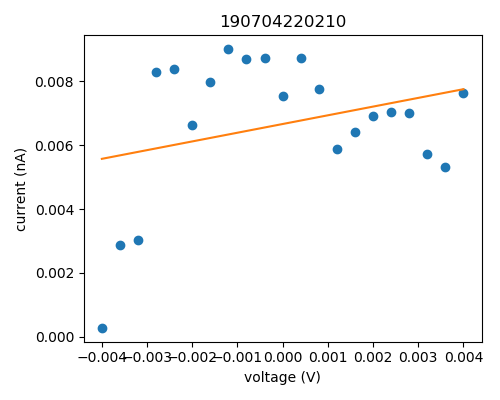

[[Model]]
    Model(OhmsLaw)
[[Fit Statistics]]
    # function evals   = 21
    # data points      = 21
    # variables        = 2
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -255.193
    Bayesian info crit = -253.104
[[Variables]]
    volt_offset:  -0.02444210 +/- 0.017818 (72.90%) (init= 0)
    resistance:    3.66719833 +/- 2.660423 (72.55%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(volt_offset, resistance)   = -0.995 

3.667198e+09 Ohm
3667198.331696 kOhm
3667.198332 MOhm
3.667198 GOhm
190704220210


In [308]:
#resisntace fitting
d  = ex.load_data(h5files()[-1], load_now = True)
#d = ex.load_data('190514134156')
curr = d['current'].values #[10:81]
#volt = d['SMU_voltage (V)'].values
volt = d['SMU.voltage'].values #[10:81]

def OhmsLaw(volt, volt_offset, resistance):
    return (volt-volt_offset)/resistance

model = lmfit.Model(OhmsLaw, independent_vars=['volt'])
result = model.fit(curr, volt = volt,
                   volt_offset = lmfit.Parameter(value = 0., min= -100., max = 100.),
                   resistance  = lmfit.Parameter(value = 1., min= -0., max = 1000.))
volt_offset, resistance = (result.best_values[key] for key in result.var_names)

fig, ax = plt.subplots(figsize = (5., 4.))
plt.plot(volt, curr, 'o',lw =8, solid_joinstyle='miter',)
plt.plot(volt, OhmsLaw(volt, volt_offset, resistance))
plt.xlabel('voltage (V)'); plt.ylabel('current (nA)')
plt.title(d.attrs['filename'])
fig.patch.set_facecolor('white');fig.patch.set_alpha(1.0);plt.tight_layout()

print result.fit_report()
print '%e Ohm'%(resistance * 1e+9)
print '%f kOhm'%(resistance * 1e+6)
print '%f MOhm'%(resistance * 1e+3)
print '%f GOhm'%(resistance * 1e+0)
print d.attrs['filename']

In [105]:
a00 = d1.variables.values()[-1].values
a00*1.2

array([ 6.74076378e-04, -8.34268611e-03, -6.05181372e-03, -9.37636849e-03,
       -3.99143668e-03,  2.05697282e-03,  1.30774928e-02,  1.12805853e-03,
       -1.05497222e-02, -3.25111090e-03, -8.09124019e-03, -3.71906068e-03,
       -2.85300612e-03,  8.73370096e-03, -3.67017020e-03, -6.87863911e-04,
       -3.23016010e-03, -4.91338456e-03, -8.44745804e-03, -8.25188775e-03,
       -4.08495136e-04, -6.24739192e-03,  4.16623708e-03, -4.66893613e-03,
        6.10088790e-03, -1.57670174e-02, -4.87147551e-03,  4.22211131e-03,
       -9.50905494e-03, -9.18346690e-04, -1.78008617e-04,  1.37949479e-03,
        9.08287894e-03,  9.64156631e-03,  9.67418368e-04, -6.38008723e-03,
       -2.27722935e-02, -2.70633260e-03, -9.97002237e-03,  2.67857779e-03,
        1.35854410e-03,  9.46471642e-04, -5.48607856e-03, -6.54070824e-03,
       -1.33364527e-02, -1.05008120e-02, -7.71407830e-03, -1.86820922e-03,
        3.54463584e-03,  1.14712594e-02, -9.29951295e-03, -8.48932751e-03,
       -1.09268595e-02, -

<IPython.core.display.Javascript object>


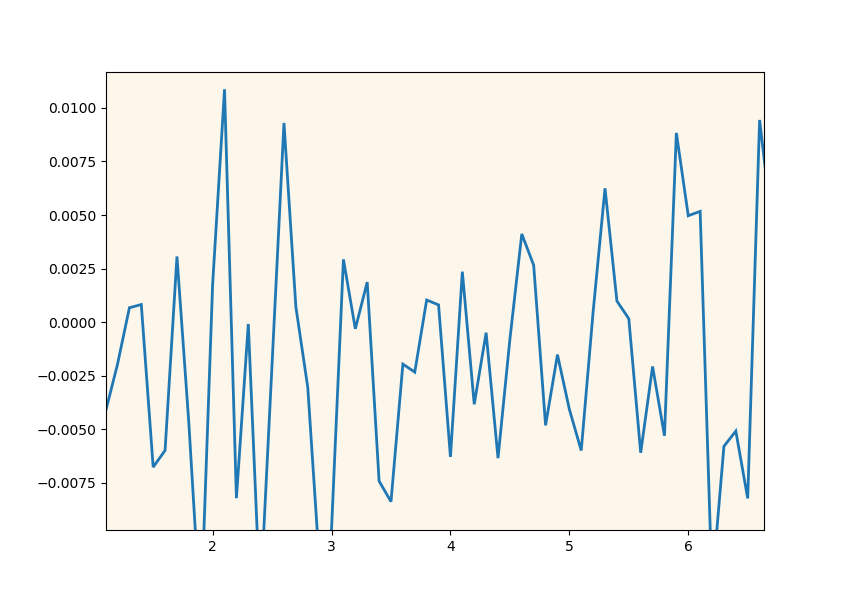

In [133]:
d1 = ex.load_data(h5files()[-1]) # 190515164852  h5files[-1]
#d1  = ex.load_data('190516170806')
#tk.plot(d1,cmap = 'tab20',solid_joinstyle='miter',lw =4)

fig, ax = plt.subplots(figsize = (5., 4.))
ax.plot(d1[d1.dims.keys()[-1]].values, d1.variables.values()[-1], '-',lw =2, solid_joinstyle='miter',)
ax.patch.set_facecolor('wheat')
ax.patch.set_alpha(0.25)

In [100]:
type(d1)

xarray.core.dataset.Dataset

In [53]:
x = np.linspace(0, 3 * np.pi, 60)
y = np.sin(x)
z = np.array([x,y])
points = z.T.reshape(-1, 1, 2)
seg = np.concatenate([points[:-1], points[1:]], axis=1)

print seg

[[[ 0.00000000e+00  0.00000000e+00]
  [ 1.59741999e-01  1.59063496e-01]]

 [[ 1.59741999e-01  1.59063496e-01]
  [ 3.19483999e-01  3.14076712e-01]]

 [[ 3.19483999e-01  3.14076712e-01]
  [ 4.79225998e-01  4.61092501e-01]]

 [[ 4.79225998e-01  4.61092501e-01]
  [ 6.38967997e-01  5.96367359e-01]]

 [[ 6.38967997e-01  5.96367359e-01]
  [ 7.98709997e-01  7.16456740e-01]]

 [[ 7.98709997e-01  7.16456740e-01]
  [ 9.58451996e-01  8.18302776e-01]]

 [[ 9.58451996e-01  8.18302776e-01]
  [ 1.11819400e+00  8.99312130e-01]]

 [[ 1.11819400e+00  8.99312130e-01]
  [ 1.27793599e+00  9.57422038e-01]]

 [[ 1.27793599e+00  9.57422038e-01]
  [ 1.43767799e+00  9.91152831e-01]]

 [[ 1.43767799e+00  9.91152831e-01]
  [ 1.59741999e+00  9.99645611e-01]]

 [[ 1.59741999e+00  9.99645611e-01]
  [ 1.75716199e+00  9.82684125e-01]]

 [[ 1.75716199e+00  9.82684125e-01]
  [ 1.91690399e+00  9.40700267e-01]]

 [[ 1.91690399e+00  9.40700267e-01]
  [ 2.07664599e+00  8.74763085e-01]]

 [[ 2.07664599e+00  8.74763085e-01]
  

<IPython.core.display.Javascript object>


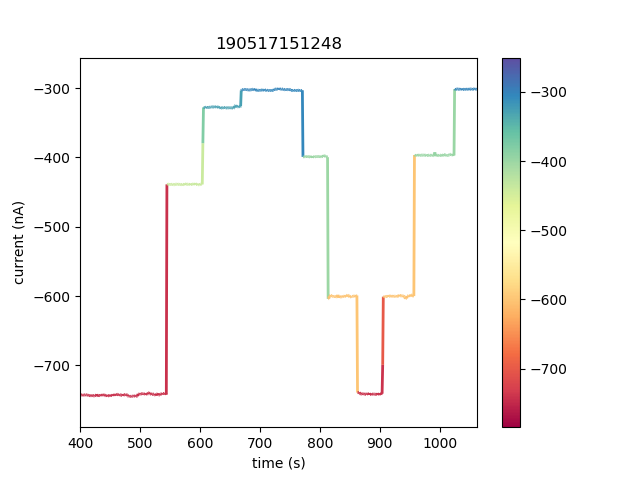

In [123]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
d1 = ex.load_data('190517151248') # 190515164852  h5files[-1]
#d1  = ex.load_data('190516170806')


x = d1['time'].values[400:1063] #np.linspace(0, 3 * np.pi, 500)
y = d1['current'].values[400:1063]# np.sin(x)
#dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[1:], points[:-1]], axis=1)

fig, axs = plt.subplots()

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(y.min()-40, y.max()+50)
lc = LineCollection(segments, cmap='Spectral', norm=norm)  #tab10
# Set the values used for colormapping
lc.set_array(y)
lc.set_linewidth(2)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min(), x.max())
axs.set_ylim(y.min()-0.1*(y.max()-y.min()),y.max()+0.1*(y.max()-y.min()))
axs.set_xlabel('time (s)')
axs.set_ylabel('current (nA)')

plt.title(d1.attrs['filename'])
plt.show()

In [29]:
#IV curve - adapted to check 34401
gate_test = w.C2
with ex.data_store(comment=w.status) as d:
#    d.axis(np.linspace(-0.50, 0.0, 501), var = w.PR)
    d.axis(np.linspace(0.0, -0.01, 201), var = gate_test)
    d.storage('current', units = 'A')
    
    for gate_test.val in d.loop():
        sleep(0.5)
#        d.put(w.SMU.current.val)
        d.put(w.Isd.val) #*1e-8
#w.SMU.voltage.val = 0.

Closed 180307214410
(200,) done.Reopened 180307221423.h5 in read-only mode


In [320]:
#Zeros
for ch_num in range(1,17):
    getattr(DAC, 'ch%d'%ch_num).val = 0.
#w.Vps=0.
#w.rf.power = -100
w.check()

'SMU_voltage=0.001200, Vsd = 0. V, C1 = 0. V, C2 = 0. V, L = 0. V, PL = 0. V, T = 0. V, PR = 0. V, R = 0. V, P3 = 0. V, sur = 0. V, SL = 0. V, SP = 0. V, SR = 0. V, rf(rf.frequency=174.000000, rf.power=13.000000), Vps=2.000000, Bext=1.000000, AWG()'

## QPC trace sweeping 2 gates

In [8]:
rng = np.linspace(0,-1.0,101)
direc = ex.sweeper('dir',np.arange(2))
gSR = ex.sweeper(w.SR, rng) 
gC1 = ex.sweeper(w.C1, rng)
g2 = ex.szip(gSR,gC1)
w.SMU.voltage.val = 0.001
Vsd = w.SMU.voltage.val


with ex.data_store(comment=w.status) as d:
    d.alloc('current',direc,g2, units = 'A')
    for _ in direc:
        for _ in g2(reverse = True):        
            d['current']= w.SMU.current.val
w.SMU.voltage.val = 0.0


Closed 181017162014


Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed


TypeError: 'szip' object is not callable

In [214]:
#QPC trace
gates = (w.SR, w.C1)
rng   = np.linspace(0., -1.0, 101)
w.SMU.voltage.val = 0.001
Vsd = w.SMU.voltage.val


with ex.data_store(comment=w.status) as d:
    d.axis(np.arange(2), var = 'direction')
    d.axis(rng, var = gates[0])
    d.axis(rng, var = gates[1], dim = 1)
    d.storage('current', units = 'A',noplot = False)
#     d.storage('conductance', units = 'e2/h', noplot = True)
    
    for up_down in d.loop():
        for voltages in d.loop(reverse = True):
            sleep(0.02)
            for gate, voltage in zip(gates, voltages):
                gate.val = voltage
            d.put(w.SMU.current.val, name = 'current')
#             current = w.SMU.current.val
#             QG = current/(Vsd - current*4200)/(38.63*10**(-6))
#             d.put(QG, name = 'conductance')            

    w.SMU.voltage.val = 0.

(1, 0) done.  
Closed 190703164729


VGFiKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShIQm94KGNoaWxkcmVuPShEcm9wZG93bihkZXNjcmlwdGlvbj11J25hbWUnLCBpbmRleD0xLCBvcHRpb25zPSh1J0MxJywgdSdjdXJyZW50JynigKY=


<IPython.core.display.Javascript object>


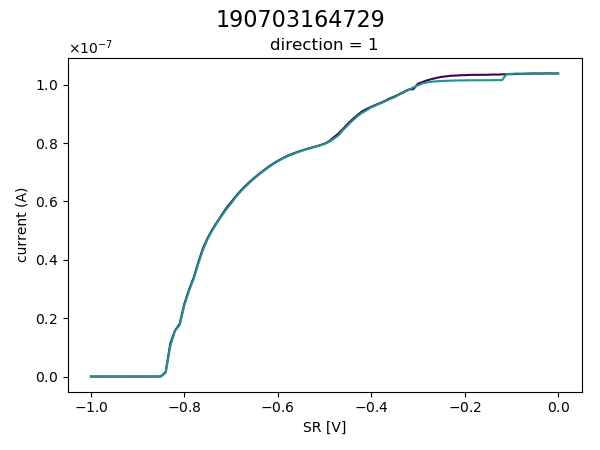

In [215]:
d1 = ex.load_data(0) # 190515164852  h5files[-1]
#d1  = ex.load_data('190516170806')
tk.plot(d1, cmap = 'viridis') #style ='--o'

In [305]:
# dipstick  QPC trace
gates = (w.G2, w.G1)
rng   = np.linspace(0., -1.2, 101)
w.SMU.voltage.val = 0.001
Vsd = w.SMU.voltage.val


with ex.data_store(comment=w.status) as d:
    d.axis(np.arange(2), var = 'direction')
    d.axis(rng, var = 'S2R',units = 'V')
    d.axis(rng, var = 'C', dim = 1)
    d.storage('current', units = 'A',noplot = False)
#     d.storage('conductance', units = 'e2/h', noplot = True)
    
    for up_down in d.loop():
        for voltages in d.loop(reverse = True):
            #sleep(0.02)
            for gate, voltage in zip(gates, voltages):
                gate.val = voltage
                sleep(0.01)
            d.put(w.SMU.current.val, name = 'current')
#             current = w.SMU.current.val
#             QG = current/(Vsd - current*4200)/(38.63*10**(-6))
#             d.put(QG, name = 'conductance')            

    w.SMU.voltage.val = 0.

(1, 0) done.  
Closed 190704220038


VGFiKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShIQm94KGNoaWxkcmVuPShEcm9wZG93bihkZXNjcmlwdGlvbj11J25hbWUnLCBpbmRleD0xLCBvcHRpb25zPSh1J0MnLCB1J2N1cnJlbnQnKSzigKY=


<IPython.core.display.Javascript object>


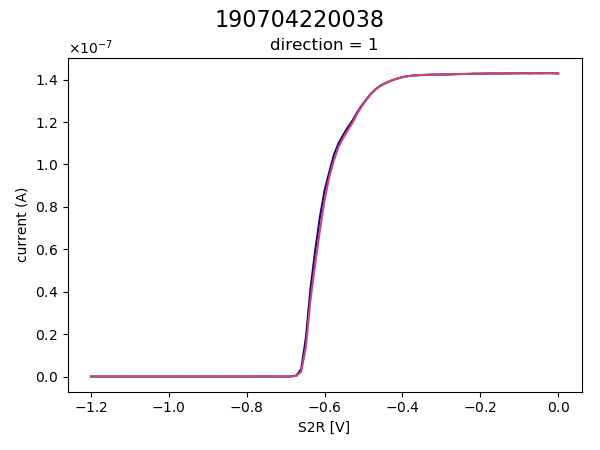

In [306]:
d1 = ex.load_data(0) # 190515164852  h5files[-1]
#d1  = ex.load_data('190516170806')
tk.plot(d1, cmap = 'plasma') #style ='--o' 'tab10'

In [19]:
zip(['A','B'], (0.1,0.2))

[('A', 0.1), ('B', 0.2)]

In [20]:
w.check()

'L = 0.1 V, PL = 0.1 V, T = 0.1 V, PR = 0.1 V, R = 0.1 V, C1 = 0.1 V, C2 = 0. V, SL = 0.1 V, SC = 0.1 V, SR = 0.1 V, G1 = 0. V, G2 = 0. V, SMU(SMU.voltage=0.000000)'

VGFiKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShIQm94KGNoaWxkcmVuPShEcm9wZG93bihkZXNjcmlwdGlvbj11J25hbWUnLCBvcHRpb25zPSh1J1ZyZl9kZWNpbWF0ZWQnLCksIHZhbHVlPXXigKY=


<IPython.core.display.Javascript object>


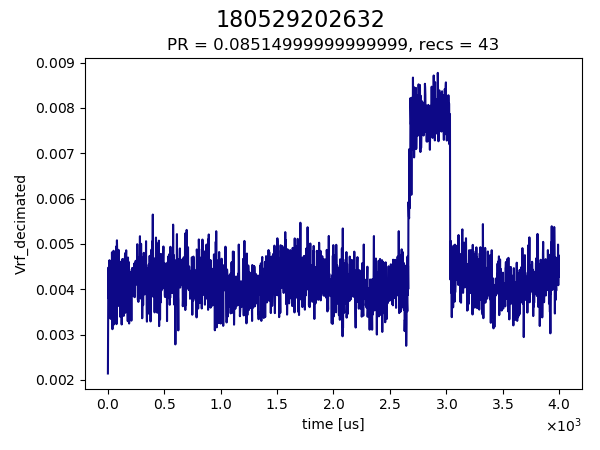

In [216]:
# import matplotlib.cm as cm
# import matplotlib
d2 = ex.load_data('180529202632') # 190515164852  h5files[-1]
#d1  = ex.load_data('190516170806')
# cm1 = cm.get_cmap('viridis_r')
tk.plot(d2,cmap =  'plasma' )

In [5]:
w.SR.val = 0.

In [236]:
w.check()

'L = 0. V, PL = 0. V, T = 0. V, PR = 0. V, R = 0. V, C1 = 0. V, C2 = 0. V, SL = 0. V, SC = 0. V, SR = 0. V, rf(rf.frequency=206.000000, rf.power=-135.000000), Vps=3.600000, SMU(SMU.voltage=0.000000), AWG(), AWGMA(), Bext=-0.000000'

## QPC trace 1 gate

In [33]:
#w.L = 0.0
w.C1 = -0.60
w.check()

'L = 0. V, PL = 0. V, T = 0. V, PR = 0. V, R = 0. V, C1 = -0.6 V, C2 = 0. V, SL = 0. V, SC = 0. V, SR = 0. V, rf(rf.frequency=206.000000, rf.power=-135.000000), Vps=3.600000, SMU(SMU.voltage=0.000000), AWG(), AWGMA()'

In [221]:
#QPC trace 1gate
gate = w.R # C1
rng   = np.linspace(0., -1.0, 101)
w.SMU.voltage.val = 0.001
Vsd = w.SMU.voltage.val

with ex.data_store(comment=w.status) as d:
    d.axis(np.arange(2), var = 'direction')
    d.axis(rng, var = gate)
    d.storage('current', units = 'A')
    #d.storage('conductance', units = 'e2/h', noplot = True)
    
    for up_down in d.loop():
        for voltage in d.loop(reverse = True):
            sleep(0.01)
            gate.val = voltage
            d.put(w.SMU.current.val, name = 'current')
#             current = w.SMU.current.val
#             QG = current/(Vsd - current*4200)/(38.63*10**(-6))
#             d.put(QG, name = 'conductance')
    w.SMU.voltage.val = 0.

(1, 0) done.  
Closed 190704171132


VGFiKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShIQm94KGNoaWxkcmVuPShEcm9wZG93bihkZXNjcmlwdGlvbj11J25hbWUnLCBvcHRpb25zPSh1J2N1cnJlbnQnLCksIHZhbHVlPXUnY3VycmXigKY=


<IPython.core.display.Javascript object>


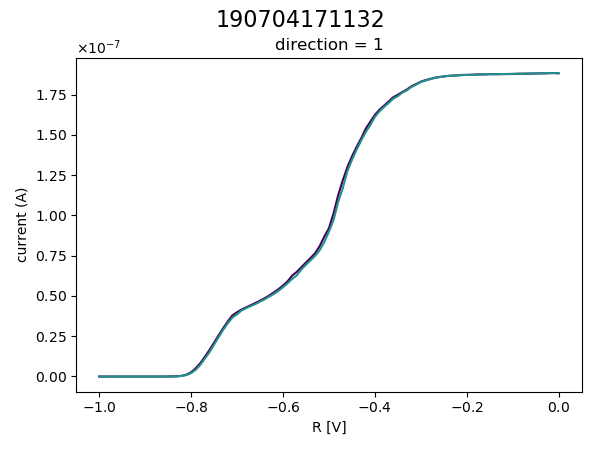

In [222]:
d1 = ex.load_data(0) # 190515164852  h5files[-1]
#d1  = ex.load_data('190516170806')
tk.plot(d1, cmap = 'viridis') #style ='--o'

<IPython.core.display.Javascript object>


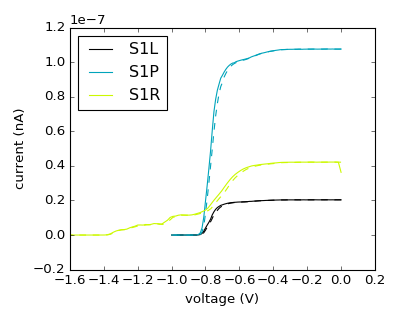

Closed 170612195254


In [94]:
#QPC traces
# labels = ('C1-C2',)
# filenames = (h5files[-1],)
h5files = [file_name for file_name in os.listdir(path) if file_name.endswith('.h5')]
# labels = ('L', 'P1', 'T12', 'P2', 'T23', 'P3',  'T34', 'P4', 'T45', 'P5', 'R')
# filenames = (h5files[-12], h5files[-11], h5files[-10], h5files[-9], h5files[-8], h5files[-7], h5files[-6], h5files[-5], h5files[-4], h5files[-3], h5files[-1])
labels = ('S1L', 'S1P', 'S1R', 'S2L', 'S2P', 'S2R')
filenames = (h5files[-3], h5files[-2], h5files[-1])

fig, ax = plt.subplots(figsize = (5., 4.))
for index in range(len(filenames)):
    label, filename = labels[index], filenames[index]
    d = ex.load_data(filename, load_now = True)
    xlabel = d.coords.keys()[-1]
    volt = d[xlabel].values
    currs = d['current'].values
    
    color = plt.cm.nipy_spectral(index/float(len(filenames)))
    plt.plot(volt, currs[0], '-', label = label, color = color)
    plt.plot(volt, currs[1], '--', color = color)

plt.legend(loc = 'best')
plt.xlabel('voltage (V)'); plt.ylabel('current (nA)')
fig.patch.set_facecolor('white'); fig.patch.set_alpha(1.0); plt.tight_layout()

In [313]:
# dipstick QPC trace 1gate
gate = w.G1 # C1
rng   = np.linspace(0., -1.0, 101)
w.SMU.voltage.val = 0.001
Vsd = w.SMU.voltage.val

with ex.data_store(comment=w.status) as d:
    d.axis(np.arange(2), var = 'direction')
    d.axis(rng, var = 'L',units = 'V')
    d.storage('current', units = 'A')
    #d.storage('conductance', units = 'e2/h', noplot = True)
    
    for up_down in d.loop():
        for w.G1.val in d.loop(reverse = True):
            #sleep(0.01)
            #w.G1.val = voltage
            d.put(w.SMU.current.val, name = 'current')
#             current = w.SMU.current.val
#             QG = current/(Vsd - current*4200)/(38.63*10**(-6))
#             d.put(QG, name = 'conductance')
    w.SMU.voltage.val = 0.

(1, 0) done.  
Closed 190704220708


In [24]:
# leakage QPC trace 1gate

#gate = w.G1 # C1
rng   = np.linspace(0., -1.0, 101)

with ex.data_store(comment=w.status) as d:
    #d.axis(np.arange(2), var = 'direction')
    d.axis(rng, var = 'R',units = 'V')
    d.storage('current', units = 'A')
    #d.storage('conductance', units = 'e2/h', noplot = True)
    
    for w.SMU.voltage.val in d.loop():
        sleep(0.01)
        #w.G1.val = voltage
        #w.SMU.voltage.val = voltage
        d.put(w.SMU.current.val, name = 'current')
#             current = w.SMU.current.val
#             QG = current/(Vsd - current*4200)/(38.63*10**(-6))
#             d.put(QG, name = 'conductance')
w.SMU.voltage.val = 0.
w.check()

(100) done.
Closed 190704230147


'L = -0.6 V, PL = -0.25 V, T = -0.5 V, PR = -0.55 V, R = -0.6 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.455 V, SR = -0.74 V, G1 = 0. V, G2 = 0. V, SMU(SMU.voltage=0.000000), rf(rf.frequency=205.400000, rf.power=9.500000), Vps=0.000000'

In [14]:
w.SMU.voltage.val = 0.

VGFiKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShIQm94KGNoaWxkcmVuPShEcm9wZG93bihkZXNjcmlwdGlvbj11J25hbWUnLCBvcHRpb25zPSh1J2N1cnJlbnQnLCksIHZhbHVlPXUnY3VycmXigKY=


<IPython.core.display.Javascript object>


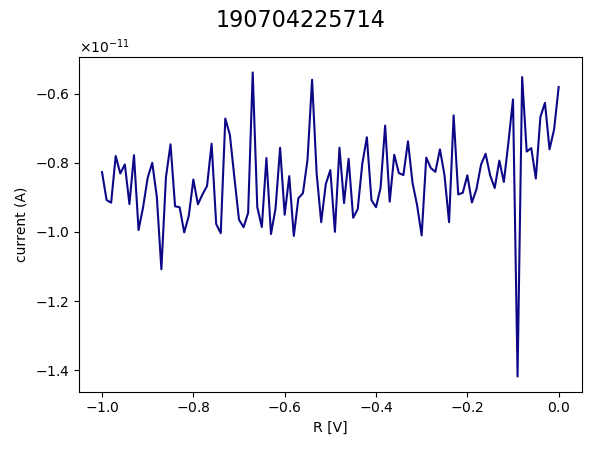

In [21]:
d1 = ex.load_data(0) # 190515164852  h5files[-1]
#d1  = ex.load_data('190516170806')
tk.plot(d1, cmap = 'plasma') #style ='--o'

In [2]:
#single-gate QPC traces
#w.C2 = -1.

gates = (w.L, w.PL, w.T, w.PR, w.R)
rng   = np.linspace(-0.5, -1.5, 51)
w.SMU_voltage.val = 0.0005 + 0.0007

for gate in gates:
    with ex.data_store(comment=w.status) as d:
        d.axis(np.arange(2), var = 'direction')
        d.axis(rng, var = gate)
        d.storage('current', units = 'nA')

        for up_down in d.loop():
            for voltage in d.loop(reverse = True):
                sleep(0.05)
                gate.val = voltage
                d.put(w.SMU_current.val)

w.SMU_voltage.val = 0.
filenames = [file_name for file_name in os.listdir(path) if file_name.endswith('.h5')][-len(gates):]
fig, ax = plt.subplots(figsize = (5., 4.))
for index, filename in enumerate(filenames):
    d = ex.load_data(filename, load_now = True)
    xlabel = d.coords.keys()[-1]
    volt = d[xlabel].values
    currs = d['current'].values
    
    color = plt.cm.nipy_spectral(index/float(len(filenames)))
    plt.plot(volt, currs[0], '-', label = xlabel.rstrip(' (V)'), color = color)
    plt.plot(volt, currs[1], '--', color = color)

plt.legend(loc = 'best')
plt.xlabel('voltage (V)'); plt.ylabel('current (nA)')
fig.patch.set_facecolor('white'); fig.patch.set_alpha(1.0); plt.tight_layout()

(0, 11) done.KeyboardInterrupt received. Delaying interrupt until a critical code finishes...


KeyboardInterrupt: 

## set DAC

In [8]:
w.L, w.R  = -0.46, -0.69
w.T  = -0.45
w.C1  = -0.6
w.C2  = -0.0
w.PL, w.PR = -0.6027, -0.3564
w.SL, w.SC, w.SR = -1.3, -0.3964, -0.74
#w.SMU.valtage = 0.0
w.G1 = 0.
w.G2 = 0.
w.check()

'L = -0.46 V, PL = -0.6027 V, T = -0.45 V, PR = -0.3564 V, R = -0.69 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.3964 V, SR = -0.74 V, G1 = 0. V, G2 = 0. V, AWG()'

In [13]:
w.L  = 0.1
w.PL = 0.1
w.T  = 0.1
w.PR = 0.1
w.R =  0.1
w.SL = 0.1
w.SR = 0.1
w.SC = 0.1

w.C1  = 0.1
#w.C2 = 0.0
#w.SMU.voltage = 0.0
w.check()

'L = 0.1 V, PL = 0.1 V, T = 0.1 V, PR = 0.1 V, R = 0.1 V, C1 = 0.1 V, C2 = 0. V, SL = 0.1 V, SC = 0.1 V, SR = 0.1 V, G1 = 0.8877 V, G2 = 1.47063 V, SMU(SMU.voltage=0.000000)'

In [5]:
w.L  = 0.
w.PL = 0.
w.T  = 0.
w.PR = 0.
w.R =  0.
w.SL = 0.
w.SR = 0.
w.SC = 0.

w.C1  = 0.
w.C2 = 0.0

w.G1 = 0.0
w.G2 = 0.0
w.G12 = 0.0
w.G16 = 0.0

#w.SMU.voltage = 0.0
w.check()

'G1 = 0. V, L = 0. V, PL = 0. V, T = 0. V, PR = 0. V, R = 0. V, C1 = 0. V, C2 = 0. V, SL = 0. V, SC = 0. V, SR = 0. V, G12 = 0. V, G2 = 0. V, G16 = 0. V, Vps=0.000000'

In [8]:
w.G12 = 0.8

w.G16 = 0.5
w.Vps = 1.2

In [13]:
w.SMU.voltage.val = 0.0

In [229]:
#w.L, w.R  = -0.6,  -0.6
#w.T       = - 0.5
#w.PL, w.PR = -0.2, -0.4
#w.SL, w.SC, w.SR = -1.0, 0., -0.3
# w.C1, w.C2 = -0.0, 0.0
# w.SMU.valtage = 0.0
w.check()

'L = -0.6 V, PL = -0.2 V, T = -0.5 V, PR = -0.4 V, R = -0.6 V, C1 = -0.6 V, C2 = 0. V, SL = -1. V, SC = 0. V, SR = -0.3 V, G1 = 0. V, G2 = 0. V, SMU(SMU.voltage=0.000000), rf(rf.frequency=205.400000, rf.power=9.500000), Vps=0.000000'

In [332]:
w.rf.power = 15.

In [36]:
w.SMU.voltage = 0.000
w.check()

'L = -0.55 V, PL = -0.15 V, T = -0.67 V, PR = -0.4 V, R = -0.6 V, C1 = -0.95 V, C2 = 0. V, SL = -1.05 V, SC = -0.541 V, SR = -0.3 V, rf(rf.frequency=205.000000, rf.power=15.000000), Vps=2.000000, SMU(SMU.voltage=0.000000), AWG()'

## DC 2D measurement

In [52]:
#scan DC
def scan_dc(var_rng_list):
    max_dim = 4
    if len(var_rng_list) > max_dim:
        raise Exception('Not implemented')
    
    callback_funcs = [lambda:None,]*(max_dim - len(var_rng_list))
    for ax, var_rng in enumerate(var_rng_list):
        if len(var_rng) > 2:
            callback_funcs.append(var_rng[2])
            var_rng_list[ax] = (var_rng[0], var_rng[1],)
        else:
            callback_funcs.append(lambda: None)
    
    original_values = [var.val for var, rng in var_rng_list]
    def change_var(dim, value):
        if dim <= len(var_rng_list):
            var, rng = var_rng_list[-dim]
            var.val = value
    
    try:
        with ex.data_store(comment=w.status) as d:
            for var, rng in var_rng_list:
                d.axis(rng, var = var)
                
            d.storage('current', units = 'A')
            
            for var4 in d.loop() if len(var_rng_list) >= 4 else range(1):
                change_var(4, var4)
                callback_funcs[-4]()
                for var3 in d.loop() if len(var_rng_list) >= 3 else range(1):
                    change_var(3, var3)
                    callback_funcs[-3]()
                    for var2 in d.loop() if len(var_rng_list) >= 2 else range(1):
                        change_var(2, var2)
                        callback_funcs[-2]()
                        for var1_index, var1 in enumerate(d.loop()):
                            change_var(1, var1)
                            callback_funcs[-1]()
                            if var1_index == 0:
                                sleep(0.1)
                            d.put(w.SMU.current.val)
    finally:
        for var_index in range(len(var_rng_list)):
            var, rng = var_rng_list[var_index]
            var.val = original_values[var_index]

w.SMU.voltage.val = 0.0003
var_rng_list = [(w.L, np.linspace(-0.3, -0.7, 41)),
                (w.R, np.linspace(-0.3, -0.8, 51))]

var_rng_list = [(w.T, np.linspace(-0.65, -0.71, 3)),] + var_rng_list

scan_dc(var_rng_list)


(2, 40, 50) done.Reopened 180305204600.h5 in read-only mode
Closed 180305204600


In [8]:
#scan DC with preAmp at drain, to 34401

def scan_dc(var_rng_list):
    max_dim = 4
    if len(var_rng_list) > max_dim:
        raise Exception('Not implemented')
    
    callback_funcs = [lambda:None,]*(max_dim - len(var_rng_list))
    for ax, var_rng in enumerate(var_rng_list):
        if len(var_rng) > 2:
            callback_funcs.append(var_rng[2])
            var_rng_list[ax] = (var_rng[0], var_rng[1],)
        else:
            callback_funcs.append(lambda: None)
    
    original_values = [var.val for var, rng in var_rng_list]
    def change_var(dim, value):
        if dim <= len(var_rng_list):
            var, rng = var_rng_list[-dim]
            var.val = value
    
    try:
        with ex.data_store(comment=w.status) as d:
            for var, rng in var_rng_list:
                d.axis(rng, var = var)
                
            d.storage('current', units = 'V')
            
            for var4 in d.loop() if len(var_rng_list) >= 4 else range(1):
                change_var(4, var4)
                callback_funcs[-4]()
                for var3 in d.loop() if len(var_rng_list) >= 3 else range(1):
                    change_var(3, var3)
                    callback_funcs[-3]()
                    for var2 in d.loop() if len(var_rng_list) >= 2 else range(1):
                        change_var(2, var2)
                        callback_funcs[-2]()
                        for var1_index, var1 in enumerate(d.loop()):
                            change_var(1, var1)
                            callback_funcs[-1]()
                            if var1_index == 0:
                                sleep(0.1)
                            d.put(w.Isd.val)
    finally:
        for var_index in range(len(var_rng_list)):
            var, rng = var_rng_list[var_index]
            var.val = original_values[var_index]

#w.SMU.voltage.val = 0.000
# var_rng_list = [(w.L, np.linspace(-0.3, -0.7, 41)),
#                 (w.R, np.linspace(-0.3, -0.8, 51))]

#var_rng_list = [(w.T, np.linspace(-0.65, -0.71, 3)),] + var_rng_list
#var_rng_list = [(w.PR, np.linspace(-0.5, -0.3, 401))]
var_rng_list = [(w.C2, np.linspace(-0.0, -0.01, 201))]

scan_dc(var_rng_list)


(200,) done.Reopened 180307175914.h5 in read-only mode
Closed 180307175914


In [15]:
#w.L, w.R  = -0.55, -0.55
w.C2.val = 0.
#w.SMU.voltage.val = 0.
w.check()

'L = -0.65 V, PL = -0.05 V, T = -0.67 V, PR = -0.495 V, R = -0.61 V, C1 = -0.85 V, C2 = 0. V, SL = -1.25 V, SC = 0. V, SR = -0.46 V, rf(rf.frequency=204.500000, rf.power=-135.000000), Vps=3.400000, SMU(SMU.voltage=0.000000), AWG()'

In [35]:
#2Dplot tansport
w.SMU.voltage.val = 0.001
with ex.data_store(comment=w.status) as d:
    d.axis(np.linspace(0, 0.2, 51), var = w.PC)
    d.axis(np.linspace(0, 0.2, 51), var = w.PR)
    d.storage('current', units = 'A')
    
    for w.PC in d.loop():
        for w.PR in d.loop():
            sleep(0.01)
            d.put(w.SMU.current.val)
    w.SMU.voltage.val = 0.

Closed 170613180041
(50, 50) done.Reopened 170613195938.h5 in read-only mode


## RF resonance search

In [37]:
#w.C1 = -0.68
#w.SR = -0.
w.SL = -1.0
w.check()

'L = 0. V, PL = 0. V, T = 0. V, PR = 0. V, R = 0. V, C1 = -0.6 V, C2 = 0. V, SL = -1. V, SC = 0. V, SR = 0. V, rf(rf.frequency=181.000000, rf.power=-135.000000), Vps=3.600000, SMU(SMU.voltage=0.000000), AWG(), AWGMA()'

In [142]:
#RF resonance search
#sensor_gate = w.SC
sensor_gate = w.SC
#w.rf.power = 14.5
with ex.data_store(comment=w.status) as d:
    d.axis(np.linspace(210,196,29), var = w.rf.frequency)
    d.axis(np.linspace(-0.1,-0.44, 171), var = sensor_gate)
    vps_range = np.linspace(0,6,21)
    d.storage('Vrf', units = 'V')

    with w.Vrf.start(time_average=True, record_average = False, triggered=False, dmm=True, meas_samples=20e+6/8,
                 recs_per_block=1):
        for w.rf.frequency in d.loop():
            vps_dep = []
            for w.Vps in vps_range:
                sleep(0.01)
                vps_dep.append(w.Vrf.val)
            w.Vps = vps_range[np.argmax(vps_dep)]
            print w.Vps.val,
            sleep(0.1)
            for sensor_gate.val in d.loop():
                d.put(w.Vrf.val)

(28, 170) done.3.9 3.6 3.6 3.3 3.0 3.0 2.7 2.1 1.5 0.0 0.0 6.0 4.8 3.9 3.6 3.3 3.0 3.0 3.0 2.7 2.7 2.4 2.4 2.4 2.1 2.1 1.8 1.8 
Closed 190725141652


In [83]:
#RF resonance search without Phase shiftor
sensor_gate = w.SR
#w.rf.power = 14.5
with ex.data_store(comment=w.status) as d:
    d.axis(np.linspace(220,180,41), var = w.rf.frequency)
    d.axis(np.linspace(-0.6,-1.1, 81), var = sensor_gate)
    vps_range = np.linspace(0,6,31)
    d.storage('Vrf', units = 'V')

    with w.Vrf.start(time_average=True, record_average = False, triggered=False, dmm=True, meas_samples=20e+6/8,
                 recs_per_block=1):
        for w.rf.frequency in d.loop():
            sleep(0.1)
            for sensor_gate.val in d.loop():
                d.put(w.Vrf.val)

Closed 180206184238
(30, 80) done.Reopened 180206184619.h5 in read-only mode


In [22]:
with ex.data_store(comment=w.status) as d:
    d.axis(np.linspace(120,280,321), var = w.rf.frequency)
    #d.axis(np.linspace(0.,1000.,1001)*0.5, var = 'time')
    #d.axis(np.linspace(0.0, 1.0, 201), var = w.SMU.voltage)
    d.storage('Vrf', units = 'V')
    
    with w.Vrf.start(time_average=True, record_average = False, triggered=False, dmm=True, meas_samples=20e+6/8,
             recs_per_block=1):   
        for w.rf.frequency in d.loop():
            sleep(0.02)
            d.put(w.Vrf.val)


(320) done.   
Closed 190520170751


In [296]:
w.rf.frequency = 204.8
#w.Vps = 5 #3

In [41]:
w.Vps.val = 3.6

In [18]:
#w.SR =  -0.65
#w.SL =  -0.9
w.check()

'L = 0. V, PL = 0. V, T = 0. V, PR = 0. V, R = 0. V, C1 = 0. V, C2 = 0. V, SL = 0. V, SC = 0. V, SR = 0. V, rf(rf.frequency=204.600000, rf.power=-135.000000), Vps=0.000000, AWG(), AWGMA(), Bext=0.000200'

In [91]:
w.check()

'L = 0. V, PL = 0. V, T = 0. V, PR = 0. V, R = 0. V, C1 = 0. V, C2 = 0. V, SL = 0. V, SC = 0. V, SR = 0. V, rf(rf.frequency=205.000000, rf.power=-135.000000), Vps=0.000000, SMU(SMU.voltage=0.000000), AWG()'

## Optimize Vps

In [145]:
w.Vps= 0.2

In [63]:
#Vps
#w.rf.frequency = 248
with ex.data_store(comment=w.status) as d:
    d.axis(np.linspace(0,6.,61), var = w.Vps)
    d.storage('Vrf', units = 'V')
    
    with w.Vrf.start(time_average=True, record_average = False, triggered=False, dmm=True, meas_samples=20e+6/8,
                 recs_per_block=1):
        for w.Vps in d.loop():
            sleep(0.1)
            d.put(w.Vrf.val)

(60) done.    
Closed 181122150353


In [24]:
w.check()

'L = -0.62 V, PL = -0.48 V, T = -0.35 V, PR = -0.9 V, R = -0.1 V, C1 = -0.8 V, C2 = 0. V, SL = -0.9 V, SC = 0. V, SR = 0. V, rf(rf.frequency=207.500000, rf.power=14.500000), Vps=5.100000, SMU(SMU.voltage=0.000000), AWG(), AWGMA(), Bext=-0.000100'

In [82]:
#SET power broadening
rng   = np.linspace(-0.2, -0.45, 201)
w.SMU_voltage.val = 0.001 + 0.0001

with ex.data_store(comment=w.status) as d:
    d.axis(np.linspace(-5,20,6), var = 'relative rf power (dB)')
    d.axis(rng, var = w.S2P)
    d.storage('current', units = 'nA')
    
    for rrp in d.loop():
        w.rf.power = -27 + rrp #note that 40 dB attenuator at fridge top flange is temporarily removed.
        for w.S2P in d.loop():
            sleep(0.05)
            d.put(w.SMU_current.val)

Closed 161221143926
(5, 200) done.Reopened 161221144347.h5 in read-only mode


# AWG

## Amplitude calibr

In [4]:
w.PR.val, w.PL.val = (-0.510, -0.620)

<IPython.core.display.Javascript object>


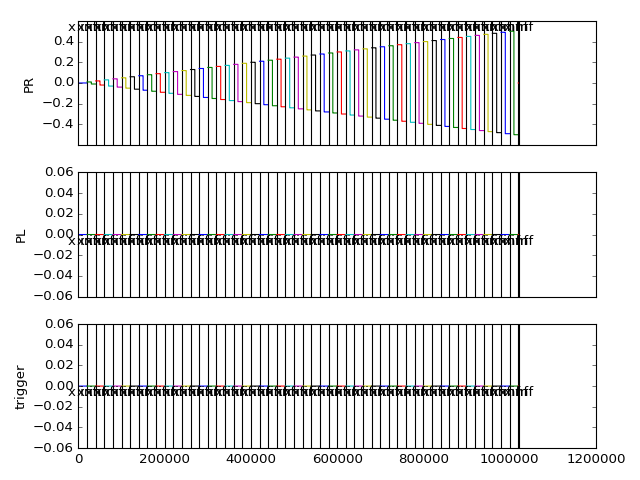

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 3.89 seconds
Closed 180822163811
(50, 160) done.Reopened 180822174314.h5 in read-only mode


In [15]:
#amplitude calibration
cal_gate=[w.PR, w.PL][0]
if [False, True][1]:
    amp_arr = np.linspace(0., 0.5, 51)
    cycle_length = 20000

    all_ch.refresh()
    for idx, v in enumerate(amp_arr):
        detuning.dwell(cycle_length*0.5, at=(v, 0.)  if cal_gate == w.PR else (0., v))
        detuning.dwell(cycle_length*0.5, at=(-v, 0.) if cal_gate == w.PR else (0., -v))
        all_ch.section(repeat=np.inf)
    detuning.dwell(2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.show()
    all_ch.load_seq()

w.AWG.jump(-1)
with ex.data_store(comment=w.status) as d:
    d.axis(amp_arr, var = 'amplitude')
    d.axis(np.linspace(-0.04, 0.04, 161)+cal_gate.val, var = cal_gate)
    d.storage('Vrf', units = 'V')
    
    with w.Vrf.start(time_average=True, record_average = True, triggered=False, dmm=True,
                      meas_samples=20e6/8./10., recs_per_block=20):
        for line_num, _ in enumerate(d.loop()):
            w.AWG.jump(line_num)
            for cal_gate.val in d.loop():
                sleep(0.05)
                d.put(w.Vrf.val)
w.AWG.jump(-1)

Loading the sequence into AWG (GPIB0::14::INSTR)
Waveforms generated in 0.07 and sent in 2.76
Waveforms generated in 0.04 and sent in 2.69
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.77 seconds


<IPython.core.display.Javascript object>


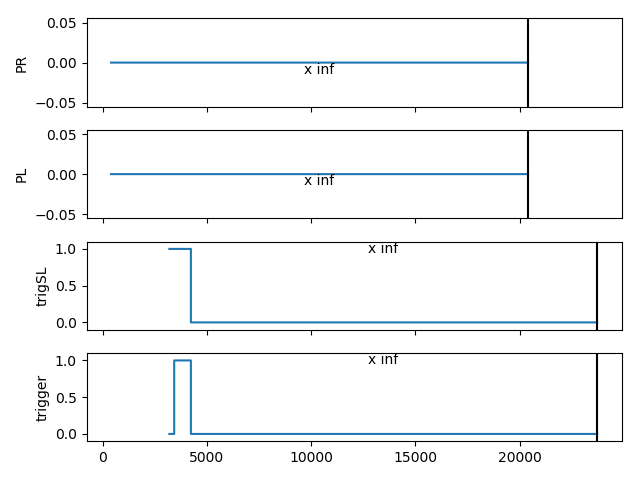

In [5]:
#amplitude calibration  with AWG520 master,  2019.06

cal_gate=[w.PR, w.PL][1]
if [False, True][1]:
    amp_arr = np.linspace(0., 0.5, 51)
    cycle_length = 20000

w.AWGMA.t_sample = 8.
w.AWG.t_sample = 0.4
    
def cali_pulses(amp_arr = np.linspace(0., 0.5, 51),
                  cycle_length = 20e+3,):
#     if w.AWG.t_sample > evol_times[1]-evol_times[0]:
#         print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf) 
    
    for idx, v in enumerate(amp_arr):
        detuning.dwell(cycle_length*0.001, at=(0, 0.))
        detuning.dwell(cycle_length*0.499, at=(v, 0.)  if cal_gate == w.PR else (0., v))
        detuning.dwell(cycle_length*0.499, at=(-v, 0.) if cal_gate == w.PR else (0., -v))
        detuning.dwell(cycle_length*0.001, at=(0, 0.))

        detuning.section(wait = True, repeat=np.inf)

    detuning.compose()
    detuning.load_seq()  
#     all_ch.compose()
#     all_ch.load_seq()
    
    w.AWG.jump(0)
    w.AWG._OPC()


# triggers
triggers.refresh()
triggers.dwell(w.AWGMA.t_sample*400, at=(0.,0.)) # w.AWGMA.t_sample*800
triggers.section(repeat=np.inf)

t_delay =  216 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  180 + 128 * w.AWG.t_sample
triggers.dwell(t_delay,      at = (0.,1.))
triggers.dwell(800, at = (1., 1.))
triggers.dwell(cycle_length - 800 - t_delay + (840 * w.AWG.t_sample + 176.), at =(0., 0.)) #  - 8.
triggers.section(repeat=np.inf)

triggers.compose()
triggers.load_seq()
w.AWGMA.jump(0)
w.AWGMA._OPC()
###
cali_pulses(amp_arr = np.linspace(0., 0.5, 51), cycle_length = 20e+3)

all_ch.show(1)
time_label = 'dwell'



<IPython.core.display.Javascript object>


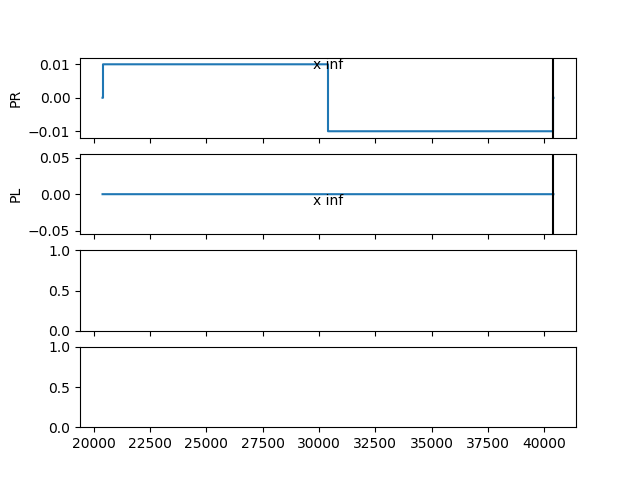

ValueError: max() arg is an empty sequence

In [341]:
all_ch.show(2)

In [6]:
with ex.data_store(comment=w.status) as d:
    d.axis(amp_arr, var = 'amplitude')
    d.axis(np.linspace(-0.04, 0.04, 161)+cal_gate.val, var = cal_gate)
    d.storage('Vrf', units = 'V')
    
    with w.Vrf.start(time_average=True, record_average = True, triggered= True, dmm=True,
                      meas_samples=2e6/8., recs_per_block=20):
        for line_num, _ in enumerate(d.loop()):
            w.AWG.jump(line_num+1)
            w.AWGMA.jump(1)
            for cal_gate.val in d.loop():
                sleep(0.05)
                d.put(w.Vrf.val)
            w.AWG.jump(0)
            w.AWGMA.jump(0)

(50, 160) done.
Closed 190625202857


In [9]:
w.AWG.jump(0)
w.AWGMA.jump(0)

ZeroDivisionError: integer division or modulo by zero

Loading the sequence into AWG (GPIB0::14::INSTR)
Waveforms generated in 0.87 and sent in 0.39
Waveforms generated in 1.00 and sent in 0.26
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 0.11 seconds


<IPython.core.display.Javascript object>


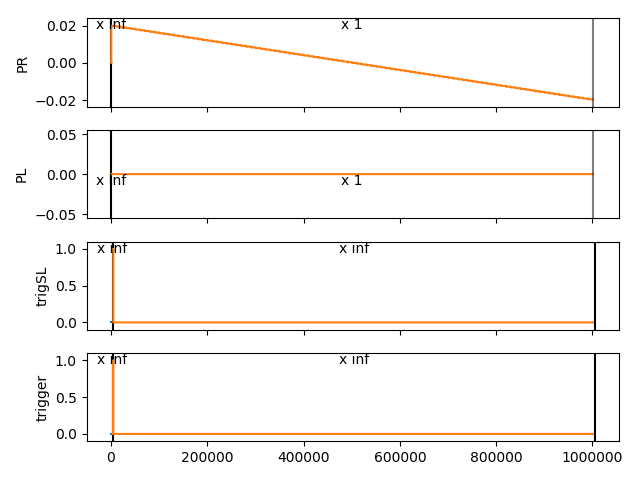

In [26]:
# SAW-tooth waveform on one gate for sweeping stability diagram  2019.06

sw_gate=[w.PR, w.PL][0]
if [False, True][1]:
    half_range  = 0.020 
    cycle_length = 1.0e6   # 1ms period sawtooth

w.AWGMA.t_sample = 10.
w.AWG.t_sample = 0.8

num_seg = 100
vol_arr = np.linspace(half_range,-half_range,num_seg+1)[0:num_seg]
    
def saw_pulses(half_range = 0.010,
                  cycle_length = 1.0e+6,):
#     if w.AWG.t_sample > evol_times[1]-evol_times[0]:
#         print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    # IDLE 0th waveform
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf) 
    # SAW tooth
    detuning.dwell(40., at=(0, 0.))
    for vol in  vol_arr:
        detuning.dwell(cycle_length/num_seg if vol !=vol_arr[-1] else cycle_length/num_seg-40., at = (vol,0) )
        
    #detuning.ramp(cycle_length-40., _from = ( half_range,0.),  to = (-half_range,0) )
    #detuning.dwell(cycle_length*0.499, at=(v, 0.)  if cal_gate == w.PR else (0., v))
    #detuning.dwell(cycle_length*0.001, at=(0, 0.))

    #detuning.section(wait = True, repeat=np.inf)  # with repeat =inf , this saw and trigger are not synched
    detuning.section(wait = True,go_to = 1)

    detuning.compose()
    detuning.load_seq()  
#     all_ch.compose()
#     all_ch.load_seq()
    
    w.AWG.jump(0)
    w.AWG._OPC()


# triggers
triggers.refresh()
triggers.dwell(w.AWGMA.t_sample*400, at=(0.,0.)) # w.AWGMA.t_sample*800
triggers.section(repeat=np.inf)

t_delay =  216. + 128. * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  180. + 128. * w.AWG.t_sample
triggers.dwell(t_delay, at = (0.,1.))
triggers.dwell(800., at = (1., 1.))
triggers.dwell(cycle_length - 800. - t_delay + (840. * w.AWG.t_sample + 170.), at =(0., 0.)) #  + 8. or + 10. 
#triggers.dwell(cycle_length - 800. + (840. * w.AWG.t_sample + 170.), at =(0., 0.)) # 
triggers.section(repeat=np.inf)

triggers.compose()
triggers.load_seq()
w.AWGMA.jump(0)
w.AWGMA._OPC()
###
saw_pulses(half_range = half_range, cycle_length = 1.0e6)

all_ch.show()
time_label = 'dwell'


In [9]:
#w.AWG.jump(0)
w.AWGMA.jump(0)

In [29]:
# trigger in every loop
original_v = w.PL.val
dt = 10.0e3 # 1e3
time_axis = np.arange(0., cycle_length, dt)
width = int(dt/8.)
n_rec = 10

with ex.data_store(comment=w.status) as d:
    d.axis(w.PL.val+ np.linspace(0.02,-0.02,101), var = w.PL)
    d.axis(w.PR.val+ np.linspace(0.02,-0.02,101)[0:100], var = 'PR')
    d.storage('Vrf', units = 'V',noplot= True)
    #d.setup_plot(live_plot=False)
    
    with w.Vrf.start(time_average= False, record_average = True, triggered= True, dmm=True,
                      meas_samples= len(time_axis)*width, recs_per_block = n_rec):
        #w.AWG.jump(1)
        #w.AWGMA.jump(1)
        
        for nn, w.PL.val in enumerate(d.loop()):
            
            w.AWG.jump(1)
            w.AWGMA.jump(1)
            
            d.put(w.Vrf.val.reshape(len(time_axis),width).mean(axis = 1))
            w.AWG.jump(0)
            w.AWGMA.jump(0)

w.PL.val = original_v

(100, :) done.
Closed 190628180654


In [44]:
original_v = w.PL.val
dt = 10.0e3 # 1e3
time_axis = np.arange(0., cycle_length, dt)
width = int(dt/8.)
n_rec = 10

with ex.data_store(comment=w.status) as d:
    d.axis(w.PL.val+ np.linspace(0.02,-0.02,101), var = w.PL)
    d.axis(w.PR.val+ np.linspace(0.02,-0.02,101)[0:100], var = 'PR')
    d.storage('Vrf', units = 'V') # noplot = True
    #d.setup_plot(live_plot=False)
    
    with w.Vrf.start(time_average= False, record_average = True, triggered= True, dmm=True,
                      meas_samples= len(time_axis)*width, recs_per_block = n_rec):
        
        
        w.AWG.jump(1)
        w.AWGMA.jump(1)
        for nn, w.PL.val in enumerate(d.loop()):

#             if nn ==0:
#                 #w.AWG.jump(1)
#                 w.AWGMA.jump(1)
#             else:
#                 pass

            d.put(w.Vrf.val.reshape(len(time_axis),width).mean(axis = 1))
            #w.AWG.jump(0)
            #w.AWGMA.jump(0)
        w.AWG.jump(0)
        w.AWGMA.jump(0)
w.PL.val = original_v

(100, :) done.
Closed 190628182133


In [15]:
# cycle_length =1.0e6
# dt = 10.0e3 # 1e3
# time_axis = np.arange(0., cycle_length, dt)
# len(time_axis)
w.check()
for n in np.array([0,1]):
    

'L = -0.66 V, PL = -0.239 V, T = -0.54 V, PR = -0.497 V, R = -0.7 V, C1 = -0.67 V, C2 = 0. V, SL = -1.35 V, SC = -0.536 V, SR = -0.62 V, rf(rf.frequency=205.400000, rf.power=9.500000), Vps=1.000000, SMU(SMU.voltage=0.000000), AWG(), AWGMA(), Bext=0.100000'

VGFiKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShIQm94KGNoaWxkcmVuPShEcm9wZG93bihkZXNjcmlwdGlvbj11J25hbWUnLCBpbmRleD0xLCBvcHRpb25zPSh1J1ZyZicsICdkaWZmJyksIHbigKY=


<IPython.core.display.Javascript object>


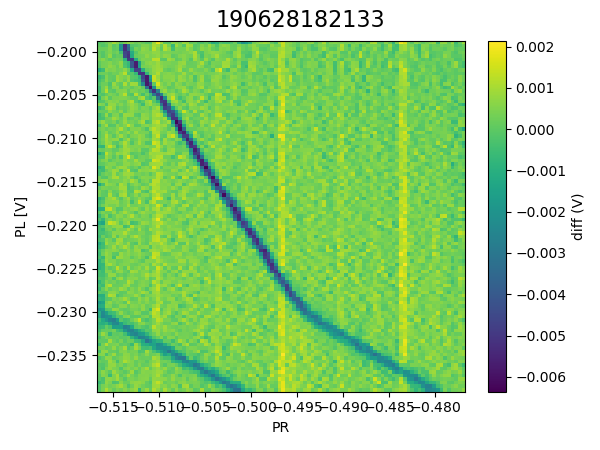

In [45]:
dw = ex.load_data(h5files()[-1])
dw['diff'] = tk.differentiate(dw['Vrf'], sigma = 0.5)
tk.plot(dw,cmap= 'viridis')

## Marker Amp calibr

In [452]:
(w.PR.val, w.PL.val) = (-1.0768, -0.5650)

In [453]:
# Barrier gate amplitude calibration
# Set the Barrier(Marker Ch) high & Low Values 
#all_ch.refresh()
#if [False, True][1]:

cal_gate=w.R

def set_CL_high(value):
    ch_num, marker_num = 1, 1
    if value <-1.4 or value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, value)
    print cmd
    w.AWG.safe_write(cmd)
def set_CL_low(value):
    ch_num, marker_num = 1, 1
    if value <-1.4 or value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, value)
    print cmd2
    w.AWG.safe_write(cmd2)
    
amp_arr = np.linspace(0.25, 0.5, 51)
#cycle_length = 10000
#
#   The only manipulation of Marker pulse - just about amplitude 
#for v in enumerate(amp_arr):
#-----------------
#for v in amp_arr:
#    set_CL_high(v)
#    set_CL_low(-v)
#----------------

w.AWG.jump(0)

with ex.data_store(comment=w.status) as d:
    d.axis(amp_arr, var = 'amplitude')
    d.axis(np.linspace(-0.02, 0.02, 101)+cal_gate.val, var = cal_gate)
    d.storage('Vrf', units = 'V')
    
    with w.Vrf.start(time_average=True, record_average = True, triggered=False, dmm=True,
                      meas_samples=20e6/8./10., recs_per_block=10):
        for half_amp in d.loop():
            set_CL_high(half_amp)
            set_CL_low(-half_amp)
            for cal_gate.val in d.loop():
                sleep(0.1)
                d.put(w.Vrf.val)
w.AWG.jump(-1)

SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.250000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.250000
(0, 100) done.SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.255000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.255000
(1, 100) done.SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.260000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.260000
(2, 100) done.SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.265000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.265000
(3, 100) done.SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.270000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.270000
(4, 100) done.SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.275000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.275000
(5, 100) done.SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.280000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.280000
(6, 100) done.SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.285000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.285000
(7, 100) done.SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.290000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.290000
(8, 100) done.SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.295000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.2

In [139]:
print w.check()

L = 0. V, PL = 0. V, CL = -1.24517 V, PC = -0.1616 V, CR = -0.92 V, PR = 0.2237 V, R = -1.4 V, S = -0.95 V, SL = -1.1 V, SC = -0.432 V, SR = -0.75 V, rf(rf.frequency=250.000000, rf.power=14.500000), Vps=0.000000, AWG(), Bext=0.200000


In [319]:
#transmission property check
cycle_arr = np.logspace(2.5, 7,36)*1.0 # in ns
PR_rng    = np.linspace(-0.1,0.1, 51)+w.PR.val
t_sample = w.AWG.t_sample

def two_step_pulse(cycle, duty = 0.5, amplitude = 0.01, no_plot = True):
    w.AWG.t_sample = cycle/1024.
    if not 1024.*w.AWG.t_sample == cycle: #this is possible due to hardware limitation
        cycle_64 = np.rint(cycle/w.AWG.t_sample/64)*64*w.AWG.t_sample
        print 'cycle changed: {:}ns -> {:}ns ({:.2%})'.format(cycle, cycle_64, abs((cycle_64-cycle)/cycle))
        cycle = cycle_64
    all_ch.refresh()
    detuning.dwell(duty*cycle, at=(0, (1-duty)*amplitude))
    detuning.dwell((1.-duty)*cycle, at=(0, -duty*amplitude))
    all_ch.section(repeat=np.inf)
    detuning.dwell(cycle, at = 0.)
    all_ch.compose()
    if not no_plot:
        all_ch.show()
    all_ch.load_seq()

with ex.data_store(comment=w.status) as d:
    d.axis(cycle_arr, var = 'cycle time (ns)')
    d.axis(PR_rng, var = w.PR)
    d.storage('Vrf', units = 'V')
    
    for cycle in d.loop():
        two_step_pulse(cycle, duty = 0.333)
        with w.Vrf.start(time_average=True, record_average = False, triggered=False, dmm=True,meas_samples=100e+6/8., recs_per_block=1):
            for w.PR in d.loop():
                d.put(w.Vrf.val)

w.AWG.t_sample = 1.

cycle changed: 316.227766017ns -> 320.0ns (1.19%)
(0, 50) done.cycle changed: 425.178630338ns -> 426.666666667ns (0.35%)
(1, 50) done.cycle changed: 571.666650191ns -> 586.666666667ns (2.62%)
(2, 50) done.cycle changed: 768.62461004ns -> 746.666666667ns (2.86%)
(19, 50) done.cycle changed: 117876.863479ns -> 115200.0ns (2.27%)
(20, 50) done.cycle changed: 158489.319246ns -> 160000.0ns (0.95%)
(21, 50) done.cycle changed: 213094.101537ns -> 211200.0ns (0.89%)
(22, 50) done.cycle changed: 286512.026966ns -> 288000.0ns (0.52%)
(23, 50) done.cycle changed: 385224.842004ns -> 384000.0ns (0.32%)
(24, 50) done.cycle changed: 517947.467923ns -> 518400.0ns (0.09%)
(25, 50) done.cycle changed: 696397.402962ns -> 697600.0ns (0.17%)
(26, 50) done.cycle changed: 936329.208824ns -> 934400.0ns (0.21%)
(27, 50) done.cycle changed: 1258925.41179ns -> 1260800.0ns (0.15%)
(28, 50) done.cycle changed: 1692666.61504ns -> 1689600.0ns (0.18%)
(29, 50) done.cycle changed: 2275845.92607ns -> 2278400.0ns (0.11%

<IPython.core.display.Javascript object>


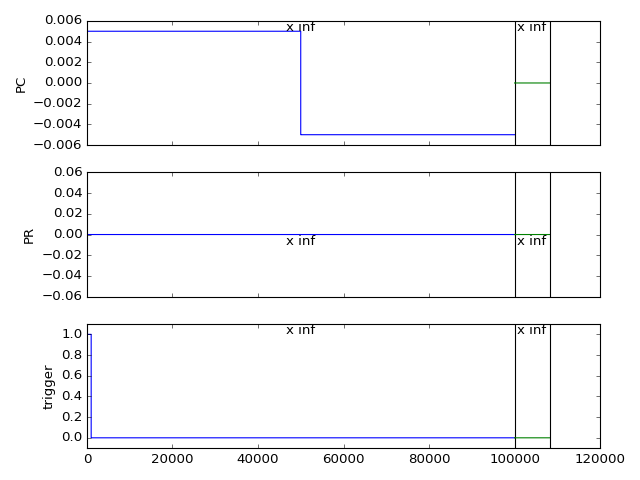

Loading the sequence into AWG (TCPIP::192.168.1.11)  in 0.02 seconds


In [3]:
#two-step pulse
pulsed_gate = {'PC':True,'PR':False}
cycle_time = 100000.
duty_ratio   = 0.5
high_pos     = (0.005*pulsed_gate['PC'], 0.005*pulsed_gate['PR'])
low_pos      = (-0.005*pulsed_gate['PC'], -0.005*pulsed_gate['PR'])

all_ch.refresh()
detuning.dwell(duty_ratio*cycle_time, at = high_pos)
detuning.dwell((1.-duty_ratio)*cycle_time, at = low_pos)
trigger.excurse(1000, to = 1.)
all_ch.section(repeat=np.inf)

detuning.dwell(64*32*4, at=0.)
all_ch.section(repeat=np.inf)
all_ch.compose()

all_ch.show()
all_ch.load_seq()
pulse_type = 'two_step'

## V pulse

In [172]:
w.PR.val, w.PL.val = (-0.9217, -0.3497)

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.10 seconds


<IPython.core.display.Javascript object>


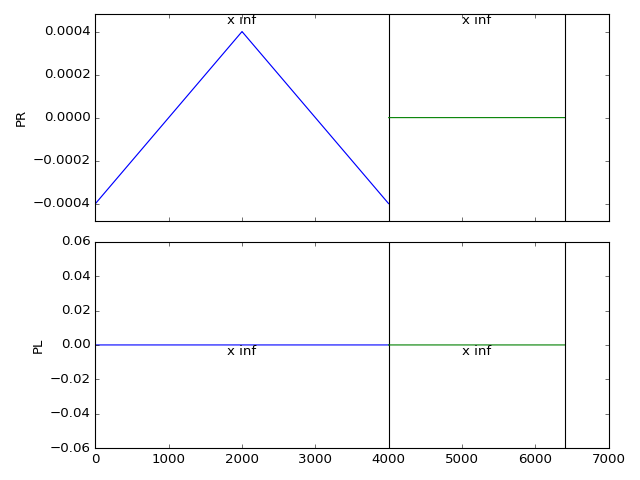

In [201]:
#V pulse
w.AWG.t_sample = 1.

pulsed_gate = {'PR':True,'PL':False}
cycle_time = 4000
ramp_duty = 0.5
# high_pos = (-0.008*pulsed_gate['PR'], 0.008*pulsed_gate['PL'])
# low_pos  = (0.008*pulsed_gate['PR'], -0.008*pulsed_gate['PL'])
high_pos = (-0.0004*pulsed_gate['PR'], 0.004*pulsed_gate['PL'])
low_pos  = (0.0004*pulsed_gate['PR'], -0.004*pulsed_gate['PL'])

#w.AWG.t_sample = 0.4
detuning.refresh()
detuning.ramp(ramp_duty*cycle_time, _from=high_pos, to= low_pos)
detuning.ramp(ramp_duty*cycle_time, _from=low_pos, to= high_pos)
# detuning.ramp(ramp_duty*cycle_time, _from=high_pos, to= low_pos)
# detuning.ramp(ramp_duty*cycle_time, _from=low_pos, to= high_pos)
# detuning.ramp(ramp_duty*cycle_time, _from=high_pos, to= low_pos)

#detuning.ramp((1.-ramp_duty)*cycle_time, to= high_pos)
#trigger.dwell(pulse_time)
#trigger.excurse(100, to = 1.)
detuning.section(wait = False,repeat=np.inf)

detuning.dwell(w.AWG.t_sample*2400, at=0.)
detuning.section(wait = False,repeat=np.inf)
detuning.compose()

detuning.load_seq()
w.AWG.jump(-1)
w.AWG._OPC()
detuning.show()


In [202]:
w.AWG.jump(0)
#all_ch.show()

# Scans

In [4]:
#voltage configuration
w.S = -1.
w.CL, w.R = -1., -1.
w.CR = -0.5
w.PC, w.PR = -0.3, -0.3
w.SL, w.SC, w.SR = -0.5, -0.5, -0.9
w.check()

'L = 0. V, PL = 0. V, CL = -1. V, PC = -0.3 V, CR = -0.5 V, PR = -0.3 V, R = -1. V, S = -1. V, SL = -0.5 V, SC = -0.5 V, SR = -0.9 V, rf(rf.frequency=246.000000, rf.power=14.000000), Vps=3.000000, SMU(SMU.voltage=1.000000), AWG()'

In [374]:
print w.check()
#w.SR.val, w.SL.val = -0.0, -0.0
#w.SR.val, w.SL.val = -0.70, -1.1
#w.CL = -1.4
#w.CR = -1.20
#print w.check()

L = -0.59 V, PL = -0.3591 V, T = -0.4 V, PR = -0.9453 V, R = -0.44504 V, C1 = -0.75 V, C2 = 0. V, SL = -1.2 V, SC = -0.5057 V, SR = -0.3 V, rf(rf.frequency=204.600000, rf.power=15.000000), Vps=0.600000, SMU(SMU.voltage=0.000000), AWG(), Bext=0.100000


## 1D-2D scan without pulse trig

In [77]:
w.AWG.safe_write("OUTPUT1:STATE 0")
w.AWG.safe_write("OUTPUT2:STATE 0")

(17L, <StatusCode.success: 0>)

In [49]:
us_pnts

125.0

In [86]:
def scan(var_rng_list, nplc = 1, relative = False, triggered = False):
    max_dim = 4
    if len(var_rng_list) > max_dim:
        raise Exception('Not implemented')
    
    callback_funcs = [lambda:None,]*(max_dim - len(var_rng_list))
    for ax, var_rng in enumerate(var_rng_list):
        var_rng_list[ax] = (var_rng[0], var_rng[1] + (var_rng[0].val if relative else 0.),)
        if len(var_rng) > 2:
            callback_funcs.append(var_rng[2])
        else:
            callback_funcs.append(lambda: None)

    original_values = [var.val for var, rng in var_rng_list]
    def change_var(dim, value):
        if dim <= len(var_rng_list):
            var, rng = var_rng_list[-dim]
            var.val = value
    
    if triggered:
        meas_samples, meas_offset = 5e3/8, 25e3/8
        recs_per_block = int(nplc*20e+6/cycle_time)
    else:
        #meas_samples, recs_per_block, meas_offset = 40.0*us_pnts , 10, 1000/8
         meas_samples, recs_per_block, meas_offset = nplc*30e6/8./10., 10, 1000/8
#        meas_samples, recs_per_block, meas_offset = nplc*10*1000/8, 20, 1000/8  #0

    try:
        with ex.data_store(comment=w.status) as d:
            for var, rng in var_rng_list:
                d.axis(rng, var = var)
                
            d.storage('Vrf', units = 'V', noplot = True)
            d.storage('dVrf', units = 'V')#, noplot= True)

            for var4 in d.loop() if len(var_rng_list) >= 4 else range(1):
                change_var(4, var4)
                callback_funcs[-4]()
                for var3 in d.loop() if len(var_rng_list) >= 3 else range(1):
                    change_var(3, var3)
                    callback_funcs[-3]()
                    for var2 in d.loop() if len(var_rng_list) >= 2 else range(1):
                        change_var(2, var2)
                        callback_funcs[-2]()
                        vrf_arr = np.ones(numpnts(d, -1))*np.nan
                        with w.Vrf.start(time_average=True, record_average = True, triggered=triggered, dmm = True,
                                         meas_samples=meas_samples, recs_per_block=recs_per_block, meas_offset = meas_offset):
        
                            try:
                                for var1_index, var1 in enumerate(d.loop()):
                                    change_var(1, var1)
                                    callback_funcs[-1]()
                                    if var1_index == 0:
                                        sleep(0.1)
                                    #d.put(w.Vrf.val)
                                    vrf_arr[var1_index] = w.Vrf.val
                            except TypeError:
                                print 'TypeError occurred.'
                            d.put(vrf_arr, name = 'Vrf')
                            d.put(np.append(np.nan, np.diff(vrf_arr)/np.diff(var_rng_list[-1][1])), name = 'dVrf')
    finally:
        for var_index in range(len(var_rng_list)):
            var, rng = var_rng_list[var_index]
            var.val = original_values[var_index]

def maximize_dVrf(var = w.SC, rng = np.linspace(-0.2, -0.5, 301), notify = False):
    var.val = rng[0]
    sleep(0.2)
    vrf_arr = np.ones(len(rng))*np.nan
    with w.Vrf.start(time_average=True, record_average = True, triggered=False, dmm=True, meas_samples=20e+6/8./10, recs_per_block=10):
        for var_index, var_val in enumerate(rng):
            var.val = var_val
            vrf_arr[var_index] = w.Vrf.val
    max_index = np.nanargmax(np.abs(np.diff(vrf_arr)))
    var.val = rng[max_index]
    if max_index in (0, len(rng)-1):
        print 'maximize_dVrf sets %s. You may want to expand the range.'%(var.status.replace('=', 'to'))
    elif notify:
        print var.status.replace('=', 'was set to')        
        

# two dim-LR
gate_y, gate_x = w.PL, w.PR
#gate_y, gate_x = w.PR, w.PL
#dV, pnts = 0.3, 301
dV, pnts = 0.4, 201

var_rng_list = [(gate_y, gate_y.val + np.linspace(0.5, -0.5, pnts)*dV),  #*0.75
                (gate_x, gate_x.val + np.linspace(0.5, -0.5, pnts)*dV)]

# var_rng_list = [(gate_x, gate_x.val + np.linspace(-0.5, 0.5, pnts)*dV),
#                 (gate_y, gate_y.val + np.linspace(0.5, -0.5, pnts)*dV)]

###
#var_rng_list = [(w.L, np.linspace(-0.48,-0.68, 101)),(w.R, np.linspace(-0.5, -0.7, 101))]
#var_rng_list = [(w.PL, np.linspace(-0.0,-0.3, 301)),(w.PR, np.linspace(-0.0, -0.3, 301))]
#var_rng_list = [(w.PR, w.PR.val + np.linspace(0.5, -0.5, 51)*0.003),]
#var_rng_list = [(w.Bext, np.linspace(0.5, 0., 6))] + var_rng_list
#var_rng_list = [(w.CR, np.linspace(-1.10, -1.20, 3)),] + var_rng_list

#var_rng_list = [(w.C2, np.linspace(0., -0.001, 40)),] + var_rng_list
#var_rng_list = [(w.SC, np.linspace(-0.32, -0.314, 7)),] + var_rng_list

#var_rng_list = [(w.SMU.voltage, np.array([-0.001, 0., 0.001])),] + var_rng_list
#var_rng_list = [(w.T, np.linspace(-0.55, -0.46, 4)),] + var_rng_list


#var_rng_list = [(w.L, np.linspace(-0.29, -0.17, 4)),] + var_rng_list

#var_rng_list = [(w.R, np.linspace(-0.6, -0.4, 5)),] + var_rng_list
#var_rng_list = [(w.T, np.linspace(-0.35, -0.26, 4)),] + var_rng_list
#var_rng_list = [(w.GS200_vol, np.array([0.00143,0.00142, 0.00141, 0.00140,0.00139,0.00138])),] + var_rng_list
#var_rng_list = [(w.Vps, np.linspace(0,6.,31)),(w.SC, np.linspace(-0.2, -0.6, 161))]

#var_rng_list = [(w.SC, np.linspace(-0.20, -0.35, 151)),]
#var_rng_list = [(w.SC, np.linspace(-0.10, -0.4, 151)),]
#var_rng_list = [(w.Vps, np.linspace(0,6.,31)),] + var_rng_list
#$var_rng_list = [(w.SC, np.linspace(-0.0, -1.4, 281)),]

#var_rng_list = [(w.SL, np.linspace(-0.6, -1.6, 201)),]
#var_rng_list = [(w.SR, np.linspace(-0.3, -1.2, 181)),]
#var_rng_list = [(w.CL, np.linspace(-1.33, -1.21, 201)),] w.rf.power= 15.
#var_rng_list = [(w.rf.power, np.linspace(15, 0., 31)),]  + var_rng_list
#var_rng_list = [(w.R, np.linspace(-1.2,-1.6, 61)),(w.PR, np.linspace(-0.1, 0.3, 61))]
#var_rng_list = [(w.R, np.linspace(-0.70, -0.54, 5)),]+ var_rng_list
#var_rng_list = [(w.SC, np.linspace(-0.2, -0.6, 3)),(w.SL, np.linspace(-0.8,-1.4, 101)),(w.SR, np.linspace(-0.5,-1.1, 101))]
#var_rng_list = [(w.SR, np.linspace(-0.30,-0.80, 51)),(w.SC, np.linspace(-0.3, -1.0, 141))] 
#var_rng_list = [(w.SL, np.linspace(-1.0, -1.80, 41)),(w.SR, np.linspace(-0.3, -1.1, 161))]
#var_rng_list = [(w.SL, np.linspace(-1.3, -1.60, 4)),]+ var_rng_list
#var_rng_list = [(w.SR, np.linspace(-0.60, -0.80, 41)),(w.SC, np.linspace(-0.1, -0.4, 151))] 
#var_rng_list = [(w.SL, np.linspace(-1.40, -1.70, 7)),] + var_rng_list
#maximize_dVrf(notify = True)
#print var_rng_list

#var_rng_list = [(w.rf.frequency, np.linspace(150,250,201)),] #+ var_rng_list
#var_rng_list = [(w.C2, np.linspace(0., 0.001, 41)),] + var_rng_list

print w.check()

#w.Bext.val = 0.1

#sleep(50)
#w.AWG.jump(0)
num = np.linspace(0.,5., 1)
for n in num:
    sleep(0.02)  #2.0
    scan(var_rng_list, nplc = 1, triggered = False)

#w.AWG.jump(-1)

L = -0.21 V, PL = -0.8 V, T = -0.19 V, PR = -0.54 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.204 V, SR = -0.728 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=-0.200000
(200, :) done.
Closed 190826183056


In [280]:
#np.array([1,2]).dtype
#np.linspace(1,5,2).dtype
#np.arange(1,5,1.5).dtype

#w.C1.val = -0.6
print w.check()

L = -0.24 V, PL = -0.898 V, T = -0.1 V, PR = -0.5911 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.2114 V, SR = -0.725 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=0.200000


In [83]:
#w.SL.val = -1.3
#w.SR.val = -0.728
w.SC.val = -0.204
print w.check()

L = -0.21 V, PL = -0.715 V, T = -0.19 V, PR = -0.54 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.204 V, SR = -0.728 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=-0.200000


In [85]:
#(w.PR.val, w.PL.val) = np.array([-0.3573, -0.9292])  # det_PL=-1.5 det_T, det_PR = -1.0 det_T
(w.PR.val, w.PL.val) = np.array([-0.540, -0.800])#np.array([-0.308,-0.704])
#(w.PR.val, w.PL.val) = np.array([-0.9433,-0.4457])  # -0.62
#(w.PR.val, w.PL.val) = np.array([-0.9370,-0.4694])
#(w.PR.val, w.PL.val) = np.array([-0.9343,-0.4816]) # np.array([-0.950,-0.540])

#w.PR.val, w.PL.val = (-0.915, -0.400)
print w.check()

L = -0.21 V, PL = -0.8 V, T = -0.19 V, PR = -0.54 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.204 V, SR = -0.728 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=-0.200000


In [175]:
#w.SR.val = -0.90

In [247]:
#w.SR.val = -0.653
#w.SL.val = -1.00
print w.check()

L = -0.24 V, PL = -0.896 V, T = -0.1 V, PR = -0.599 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.2164 V, SR = -0.725 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=-0.200000


In [55]:
w.L.val = -0.21
##w.PL.val = -0.0
w.T.val = -0.19 #-0.46
#w.PR.val = -0.0

#w.R.val = -0.81

# print w.check()

In [9]:
w.SMU.voltage.val =  -0.00

w.check()

'L = -0.35 V, PL = -0.9 V, T = -0.26 V, PR = -0.36 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.228 V, SR = -0.725 V, G1 = 0. V, G2 = 0. V, SMU(SMU.voltage=0.000000), rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=-0.060000'

In [42]:
w.GS200_vol =0.0
w.check()

'L = 0.1 V, PL = 0.1 V, T = 0.1 V, PR = 0.1 V, R = 0.1 V, C1 = 0.1 V, C2 = 0. V, SL = 0.1 V, SC = 0.1 V, SR = 0.1 V, rf(rf.frequency=206.000000, rf.power=-135.000000), Vps=3.600000, AWG(), AWGMA(), Bext=0.000000'

In [20]:
w.Bext.val = -0.200
w.Bext.check()

-0.2

In [38]:
#all_ch.show(-1)
w.check()

'L = -0.58 V, PL = -0.4819 V, T = -0.37 V, PR = -0.9517 V, R = 0. V, C1 = -0.79 V, C2 = 0. V, SL = -1.2 V, SC = -0.262 V, SR = -0.703 V, rf(rf.frequency=204.600000, rf.power=14.500000), Vps=0.600000, SMU(SMU.voltage=0.000000), AWG(), AWGMA(), Bext=0.100000'

In [9]:
#simultaneous sweep
with ex.data_store(comment=w.status) as d:
    d.axis(np.linspace(-0.125, -0.14, 151), var = 'PC (mV) with PR')
    d.axis(np.linspace(0.28, 0.295, 151), var = w.PR, dim = 0)
#     d.axis(np.linspace(-0.005, 0.005, 61)+w.PC.val, var = 'PC (mV)')#, with PR ')
#     d.axis(np.linspace(0.006, -0.006, 61)+w.PR.val, var = w.PR, dim = 0)
    d.storage('Vrf', units = 'V')
    orignal_vals = w.PL.val, w.PR.val
    
    with w.Vrf.start(time_average=True, record_average = True, triggered=False, dmm=True, meas_samples=20e+6/8., recs_per_block=20):
        for w.PC.val, w.PR.val in d.loop():
            print w.check()
            d.put(w.Vrf.val)
    
    w.PL.val, w.PR.val = orignal_vals

Closed 170206190940
L = 0. V, PL = 0. V, CL = -1.46 V, PC = -0.125 V, CR = -0.8 V, PR = 0.28 V, R = -1.74 V, S = -0.9 V, SL = -1.25 V, SC = -0.355 V, SR = -0.8 V, rf(rf.frequency=245.500000, rf.power=14.500000), Vps=5.000000, AWG(), Bext=0.499900
(0,) done.L = 0. V, PL = 0. V, CL = -1.46 V, PC = -0.1251 V, CR = -0.8 V, PR = 0.2801 V, R = -1.74 V, S = -0.9 V, SL = -1.25 V, SC = -0.355 V, SR = -0.8 V, rf(rf.frequency=245.500000, rf.power=14.500000), Vps=5.000000, AWG(), Bext=0.500000
(1,) done.L = 0. V, PL = 0. V, CL = -1.46 V, PC = -0.1252 V, CR = -0.8 V, PR = 0.2802 V, R = -1.74 V, S = -0.9 V, SL = -1.25 V, SC = -0.355 V, SR = -0.8 V, rf(rf.frequency=245.500000, rf.power=14.500000), Vps=5.000000, AWG(), Bext=0.500000
(2,) done.L = 0. V, PL = 0. V, CL = -1.46 V, PC = -0.1253 V, CR = -0.8 V, PR = 0.2803 V, R = -1.74 V, S = -0.9 V, SL = -1.25 V, SC = -0.355 V, SR = -0.8 V, rf(rf.frequency=245.500000, rf.power=14.500000), Vps=5.000000, AWG(), Bext=0.500000
(3,) done.L = 0. V, PL = 0. V, CL

In [5]:
#sweep along a line, spin funnel
triggered = True
nplc      = 5
with ex.data_store(comment=w.status) as d:
    #d.axis(np.linspace(4, 48, 12), var = 'integration time (us)')
    d.axis(np.linspace(1, -1, 201), var = w.Bext)
    d.axis(np.linspace(-0.125, -0.14, 51), var = 'PC (mV) with PR')
    d.axis(np.linspace(0.28, 0.295, 51), var = w.PR, dim = 1)
    d.storage('Vrf', units = 'V')
    orignal_vals = w.PC.val, w.PR.val

    t_int_us = 10.
    if triggered:
        meas_samples = t_int_us*1e+3/8
        recs_per_block, meas_offset = int(nplc*20e+6/cycle_time), 2000/8
    else:
        meas_samples, recs_per_block, meas_offset = nplc*20e+6/8/10, 10, 0

    for w.Bext.val in d.loop():
        for w.PC.val, w.PR.val in d.loop():
            with w.Vrf.start(time_average=True, record_average = True, triggered=triggered, dmm = True,
                             meas_samples=meas_samples, recs_per_block=recs_per_block, meas_offset = meas_offset):
                d.put(w.Vrf.val)
    
    w.PC.val, w.PR.val = orignal_vals

TypeError: object of type 'NoneType' has no len()

## time traces

In [81]:
w.AWG.jump(-1)

<IPython.core.display.Javascript object>

ValueError: max() arg is an empty sequence

In [170]:
w.AWG.t_sample = 0.8

In [136]:
w.AWGMA.t_sample = 7.

In [171]:
w.AWG.safe_write("OUTPUT1:STATE 0")
w.AWG.safe_write("OUTPUT2:STATE 0")#
w.AWGMA.safe_write("OUTPUT1:STATE 0")
w.AWGMA.safe_write("OUTPUT2:STATE 0")#

(17L, <StatusCode.success: 0>)

In [63]:
w.SC.val = -0.218
w.check()

'L = -0.29 V, PL = -1.097 V, T = -0.26 V, PR = -0.3 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.218 V, SR = -0.725 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=0.200000'

In [291]:
#1D_time
n_repeat = 1 # 1000 #2000
#time_axis = np.arange(0, 50e+6, 8)#np.arange(0, 0.2e+9, 8)
dt = 80000. # 80. , 1e3
time_axis = np.arange(0., 127e6, dt)
width = int(dt/8.)

with ex.data_store(comment=w.status) as d:
    d.axis(np.arange(n_repeat), var = 'repeat') # could be deleted
    d.axis(time_axis, var = 'time')
    d.storage('Vrf', units = 'V', noplot = True, chunksizes=( 1, len(time_axis) ),) #chunksizes=( 1000, len(time_axis) ),

    with w.Vrf.start(time_average = False, dmm = True, triggered = False, record_average = False, 
                     meas_samples= len(time_axis)*width, recs_per_block = n_repeat):
        signal_raw = w.Vrf.val
        #signal_ave = signal_raw.reshape(-1, width).mean(axis = 1)
        signal_ave = signal_raw.reshape(n_repeat, width,-1).mean(axis = 1)
        d.put(signal_ave)
        #w.AWGMA.jump(1)
        #d.put(w.Vrf.val)
        #d.put(np.mean(w.Vrf.val.reshape(-1, int(dt/8.)), axis = -1))
        #w.AWGMA.jump(0)

# filename = ''
# xarr = ex.load_data(filename = filename)['Vrf']
# tarr = xarr['time'].values
# dt   = (tarr[1]-tarr[0])*1e-9
# freq = np.fft.rfftfreq(len(tarr), d = dt)[1:]

# ffted = np.fft.rfft(xarr, norm = None)[1:]
# spectrum = dt*np.abs(ffted)**2

# fig, ax = plt.subplots(figsize = (5.5,4))
# width = 1
# spectrum_ave = spectrum.reshape(-1, width).mean(axis = -1)
# freq_ave     = freq.reshape(-1, width).mean(axis = -1)
# plt.plot(freq_ave, spectrum_ave, '-')

# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.ylabel(r'$S(f) ({\rm V}^2/{\rm Hz})$'); plt.xlabel('frequency (Hz)')
# #plt.xlim(1e0,1e+5); plt.ylim(1e-3,1e-1)
# plt.title(ex.load_data(filename = filename).attrs['filename'])
# fig.patch.set_alpha(1.0);fig.patch.set_facecolor('w');plt.tight_layout()

(:, :) done.
Closed 190816115404


VGFiKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShIQm94KGNoaWxkcmVuPShEcm9wZG93bihkZXNjcmlwdGlvbj11J25hbWUnLCBvcHRpb25zPSh1J1ZyZicsKSwgdmFsdWU9dSdWcmYnKSwgQ2jigKY=


<IPython.core.display.Javascript object>


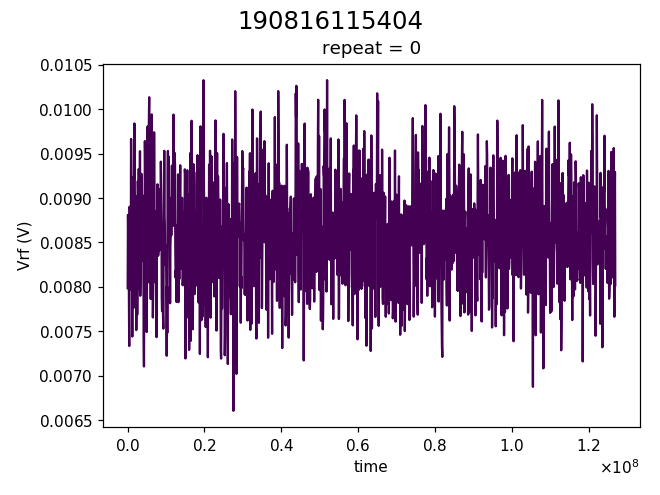

In [292]:
dw = ex.load_data(h5files()[-1])
tk.plot(dw,cmap= 'viridis')
#print dw.comment

In [75]:
#1D_time repeated recs

n_repeat = 2
#time_axis = np.arange(0, 50e+6, 8)#np.arange(0, 0.2e+9, 8)
dt = 1000
time_axis = np.arange(0, 100e6, dt)
width = int((time_axis[1]-time_axis[0])/8)

with ex.data_store(comment=w.status) as d:
    d.axis(np.arange(2), var = 'repeat')
    d.axis(time_axis, var = 'time (ns)')
    d.storage('Vrf', units = 'V', noplot = True)
    
    for _ in d.loop():
        
        with w.Vrf.start(time_average = False, dmm = False, triggered = False, record_average = False, 
                         meas_samples= len(time_axis)*width, recs_per_block = 1):
            #signal_raw = w.Vrf.val
            #signal_ave = signal_raw.reshape(-1, width).mean(axis = 1)
            #d.put(signal_ave)
            #w.AWGMA.jump(1)
            #d.put(w.Vrf.val)
            d.put(np.mean(w.Vrf.val.reshape(-1, int(dt/8.)), axis = -1))
        #w.AWGMA.jump(0)

(1, :) done.    
Closed 181024150034


In [480]:
n_repeat = 1
#time_axis = np.arange(0, 50e+6, 8)#np.arange(0, 0.2e+9, 8)
time_axis = np.arange(0, 1000, 8)
with ex.data_store(comment=w.status) as d:
    d.axis(time_axis, var = 'time')
    d.storage('Vrf', units = 'V', noplot = True)

    with w.Vrf.start(time_average = False, dmm = False, triggered = False, record_average = False, meas_samples= len(time_axis), recs_per_block=1):
        d.put(w.Vrf.val)

Closed 171208215728
(slice(None, None, None),) done.Reopened 171208215844.h5 in read-only mode


In [217]:
#1D_time for V pulse
n_repeat = 1
#time_axis = np.arange(0, 50e+6, 8)#np.arange(0, 0.2e+9, 8)
time_axis = np.arange(0, 100000, 500)
with ex.data_store(comment=w.status) as d:
    d.axis(time_axis, var = 'time')
    d.storage('Vrf', units = 'V', noplot = False)
    
    w.AWG.jump(0)
    with w.Vrf.start(time_average = False, dmm = False, triggered = True, record_average = False, meas_samples= len(time_axis)*width, recs_per_block=1):
        signal_raw = w.Vrf.val
        signal_ave = signal_raw.reshape(-1, width).mean(axis = 1)
        d.put(signal_ave)
    w.AWG.jump(-1)
    
#     with w.Vrf.start(time_average = True, dmm = False, triggered = True, record_average = False, meas_samples= len(time_axis), recs_per_block=1):
#         w.AWG.jump(0)
#         d.put(w.Vrf.val)
#         w.AWG.jump(-1)

# filename = ''
# xarr = ex.load_data(filename = filename)['Vrf']
# tarr = xarr['time'].values
# dt   = (tarr[1]-tarr[0])*1e-9
# freq = np.fft.rfftfreq(len(tarr), d = dt)[1:]

# ffted = np.fft.rfft(xarr, norm = None)[1:]
# spectrum = dt*np.abs(ffted)**2

# fig, ax = plt.subplots(figsize = (5.5,4))
# width = 1
# spectrum_ave = spectrum.reshape(-1, width).mean(axis = -1)
# freq_ave     = freq.reshape(-1, width).mean(axis = -1)
# plt.plot(freq_ave, spectrum_ave, '-')

# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.ylabel(r'$S(f) ({\rm V}^2/{\rm Hz})$'); plt.xlabel('frequency (Hz)')
# #plt.xlim(1e0,1e+5); plt.ylim(1e-3,1e-1)
# plt.title(ex.load_data(filename = filename).attrs['filename'])
# fig.patch.set_alpha(1.0);fig.patch.set_facecolor('w');plt.tight_layout()

Closed 170621194046
(slice(None, None, None),) done.Reopened 170621194052.h5 in read-only mode


In [121]:
w.rf.power = 14.5
w.rf.frequency.val = 245.5 + 4.5

In [32]:
#tunneling event
#w.PC, w.PR = -0.128, 0.39
gate = w.PR
rng = np.linspace(-0.002,0.002, 41)+gate.val
#time_axis = np.arange(0, 2e+8, 40e+3)
time_axis = np.arange(0, 20000000, 10000)

width = int((time_axis[1]-time_axis[0])/8)
original_value = gate.val

with ex.data_store(comment=w.status) as d:
    d.axis(rng, var = gate)
    d.axis(time_axis, var = 'time (ns)')
    d.storage('Vrf', units = 'V')
    
    for gate.val in d.loop():
        with w.Vrf.start(time_average = False, dmm = False, triggered = False, record_average = False, meas_samples= len(time_axis)*width, recs_per_block=1):
            signal_raw = w.Vrf.val
            signal_ave = signal_raw.reshape(-1, width).mean(axis = 1)
            d.put(signal_ave)
gate.val = original_value

Closed 170420113407
(40, slice(None, None, None)) done.Reopened 170420113521.h5 in read-only mode


### tunneling event

In [502]:
w.SC = -0.3348

In [685]:
w.PR, w.PL = (-0.306, -0.825)#(-0.9697, -0.1961)
w.check()

'L = -0.38 V, PL = -0.825 V, T = -0.35 V, PR = -0.306 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.343 V, SR = -0.74 V, G1 = 0. V, G2 = 0. V, SMU(SMU.voltage=0.000000), rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=0.100000'

In [687]:
# tunneling event
#w.PC, w.PR = -0.128, 0.39
gate = w.PR
rng = np.linspace(0.001,-0.001,21) + gate.val
#time_axis = np.arange(0, 2e+8, 40e+3)

time_axis = np.arange(0,100e6, 2000)
#time_axis = np.arange(0,500e3, 1e3)
#reduced_time = np.arange(0, 200, 1)

width = int((time_axis[1]-time_axis[0])/8)
original_value = gate.val

with ex.data_store(comment=w.status) as d:
    d.axis(rng, var = gate)
    d.axis(time_axis, var = 'time (ns)')
    d.storage('Vrf', units = 'V')
    
    for gate.val in d.loop(): #gate.val
        with w.Vrf.start(time_average = False, dmm = True, triggered = False, record_average = False, meas_samples= len(time_axis)*width, recs_per_block=1):
            signal_raw = w.Vrf.val
            signal_ave = signal_raw.reshape(-1, width).mean(axis = 1)
            d.put(signal_ave)
gate.val = original_value

(20, :) done.
Closed 190729215040


In [26]:
time_axis = np.arange(0, 2000, 10)
width = int((time_axis[1]-time_axis[0])/8)
print width

1


In [178]:
width

1250

In [259]:
#cycle, record average
n_repeat = 10000

gate= w.PC
rng  = np.linspace(-0.001, 0.001, 11) + gate.val
meas_length = cycle_time
time_window = 400 # in ns. has to be dividable by 8.
time_axis = np.arange(0, meas_length, time_window)

original_value = gate.val
try:
    with ex.data_store(comment=w.status) as d:
        d.axis(rng, var = gate)
        d.axis(time_axis, var = 'time (ns)')
        d.storage('Vrf', units = 'V')

        for gate.val in d.loop():
            with w.Vrf.start(time_average = False, dmm = False, triggered = True, record_average = True,
                             meas_samples= (time_window/8)*len(time_axis), recs_per_block=n_repeat,):
                Vrf_ave = w.Vrf.val.reshape(-1, time_window/8).mean(axis = -1)
                d.put(Vrf_ave)

finally:
    gate.val = original_value

Closed 170129013835
(0, slice(None, None, None)) done.

C:\Users\taruchalab\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(20, slice(None, None, None)) done.Reopened 170129014106.h5 in read-only mode


In [136]:
#time trace repeated
w.AWG.jump(0)
n_repeat = 1000

#cacth whether variables exists
ini_time   = ini_time if 'ini_time' in locals() else 0.
duty_ratio = duty_ratio if 'duty_ratio' in locals() else 0.
ramp_time  = ramp_time if 'ramp_time' in locals() else 0.
evol_time  = evol_time if 'evol_time' in locals() else 0.

meas_length = {'two_step': cycle_time/2, 
               'ramp':    (cycle_time-ramp_time)/2,
               'ramp_ini':(cycle_time-ramp_time-ini_time)/2,
               'swap':    (cycle_time-2*ramp_time-evol_time)/2}[pulse_type]
ref_offset = (meas_length - cycle_time)/8
        
time_axis = np.arange(0, meas_length, 8)

print 'pulse_type: %s, measure for %.1f us with ref offset at %.1f us' % (pulse_type, meas_length*1e-3, 8*ref_offset*1e-3)
with ex.data_store(comment=w.status) as d:
    d.axis(np.arange(n_repeat), var = 'repeat')
    d.axis(time_axis, var = 'time (ns)')
    d.storage('Vrf', units = 'V')

    with w.Vrf.start(time_average = False, dmm = False, triggered = True, record_average = False, meas_samples= len(time_axis), recs_per_block=n_repeat,
                    meas_offset = 2000/8, ref_offset = ref_offset, ref_samples = meas_length/8):
        sleep(0.2)
        d.put(w.Vrf.val)

pulse_type: ramp, measure for 475.0 us with ref offset at -525.0 us
Closed 170208184601


C:\pyinstr\expdata.py:436: UserWarning: Live plotting is disabled because a dataset of size > 20Mpts is created. It is recommended to call data_store() with diskless=False to prevent on-memory caching.
  warnings.warn("Live plotting is disabled because a dataset of size > 20Mpts is created. It is recommended to call data_store() with diskless=False to prevent on-memory caching.")


(slice(None, None, None), slice(None, None, None)) done.Reopened 170208185838.h5 in read-only mode


In [260]:
#simple time trace repeated
n_average   = 1
n_indeces   = 1000
meas_length = 100e3
time_axis = np.arange(0, meas_length, 160)

with ex.data_store() as d:
    d.axis(np.arange(n_indeces), var = 'repeat')
    d.axis(time_axis, var = 'time (ns)')
    d.storage('Vrf', units = 'V')

    with w.Vrf.start(time_average = False, dmm = False, triggered = True, record_average = False,
                     recs_per_block=n_average*n_indeces,
                     meas_offset = 101*us_pnts, meas_samples= len(time_axis),
                     ref_offset  = (101-80*1.234567)*us_pnts, ref_samples = 40*1.234567*us_pnts):
        sleep(0.5)
        w.AWG.jump(0)
        d.put(w.Vrf.val.reshape(n_average, n_indeces, -1).mean(axis = 0))
        w.AWG.jump(-1)

Closed 171101170437
(slice(None, None, None), slice(None, None, None)) done.Reopened 171101170617.h5 in read-only mode


### time trace repeat&average

In [535]:
cycle_time

4000.0

In [122]:
(w.PR.val,w.PL.val) = np.array([-0.8300,-0.5394]) #+ np.array([1.0,-1.9])*0.035

In [145]:
pulsed = True     # Average over many records

if pulsed:
    num_average = 1000
#     AWG_load_steps(t_us = [2e3, 2e3], v = [(0.00, -0.003), (0.0, 0.003)])
#     AWG_load_steps(t_us = [0.25e3, 0.5e3, 0.25e3, 0.5e3], vL = 0., vR = [0.01, 0.00, -0.01, 0.])
# w.L = 0.22
# tuneQLL()
# w.QLL = -0.76

# dt = 1. #resolution in us
# time_axis    = np.arange(0, 10e3, dt) #us
# time_axis    = np.arange(0, c.seq.t_cycle if pulsed else 2000, dt) #us
# QDgate, rng  = w.R, np.linspace(-0.005,  0.00, 41) + 0.1748
#QDgate, rng  = w.L, np.linspace(0.260,  0.256, 21)

#dt = 0.08 #resolution in us
dt = 0.2 #0.04   #(cycle_time/1000) / 100       # resolution in us 
time_axis    = np.arange(0, cycle_time/1000, dt) # in us, dt = 0.04 ,  cycle_time/1000
#time_axis    = np.arange(0, 6000, dt) #us

#QDgate, rng  = w.PC, np.arange(10)
#dummy.name = 'repeat'

with ex.data_store() as d:
    #d.axis(rng, var = QDgate)
    d.axis(time_axis, var = 'time', units = 'us')
    d.storage('Vrf', units = 'V')
    
    with w.Vrf.start(time_average = False, record_average = True, triggered = pulsed, dmm = True,
                     meas_samples = len(time_axis)*dt*w.Vrf.sample_rate_hz/1e6,
                     recs_per_block = num_average if pulsed else 1):
        if pulsed:
            w.AWG.jump(1)
            w.AWGMA.jump(1)
        d.put(np.mean(w.Vrf.val.reshape(-1, int(dt*w.Vrf.sample_rate_hz/1e6)), axis = -1))  #make sure dt*125 is integer
        #d.put(w.Vrf.val.reshape(-1, dt*w.Vrf.sample_rate_hz/1e6))
        w.AWG.jump(0)
        w.AWGMA.jump(0)

(:) done.   
Closed 181206171426


In [144]:
## no rec_average, keeps every original rec 

pulsed = True

if pulsed:
    num_average = 200
#     AWG_load_steps(t_us = [2e3, 2e3], v = [(0.00, -0.003), (0.0, 0.003)])
#     AWG_load_steps(t_us = [0.25e3, 0.5e3, 0.25e3, 0.5e3], vL = 0., vR = [0.01, 0.00, -0.01, 0.])
# w.L = 0.22
# tuneQLL()
# w.QLL = -0.76

# dt = 1. #resolution in us
# time_axis    = np.arange(0, 10e3, dt) #us
# time_axis    = np.arange(0, c.seq.t_cycle if pulsed else 2000, dt) #us
# QDgate, rng  = w.R, np.linspace(-0.005,  0.00, 41) + 0.1748
#QDgate, rng  = w.L, np.linspace(0.260,  0.256, 21)

#dt = 0.08 #resolution in us
dt = 0.2  #(cycle_time/1000) / 100 #resolution in us 
time_axis    = np.arange(0, cycle_time/1000, dt) # in us, dt = 0.04
#time_axis    = np.arange(0, 6000, dt) #us

#QDgate, rng  = w.PC, np.arange(10)
#dummy.name = 'repeat'

with ex.data_store() as d:
    #d.axis(rng, var = QDgate)
    d.axis(np.arange(num_average), var="rec")    
    d.axis(time_axis, var = 'time', units = 'us')
    d.storage('Vrf', units = 'V',chunksizes=(num_average, len(time_axis)))
    
    with w.Vrf.start(time_average = False, record_average = False, triggered = pulsed, dmm = True,
                     meas_samples = len(time_axis)*dt*w.Vrf.sample_rate_hz/1e6,
                     recs_per_block = num_average if pulsed else 1):
        if pulsed:
            w.AWG.jump(1)
            w.AWGMA.jump(1)
        #d.put(np.mean(w.Vrf.val.reshape(-1, dt*w.Vrf.sample_rate_hz/1e6), axis = -1))  #make sure dt*125 is integer
        d.put((np.mean(w.Vrf.val.reshape(-1, int(dt*w.Vrf.sample_rate_hz/1e6)), axis = -1)).reshape(-1,len(time_axis)))
        w.AWG.jump(0)
        w.AWGMA.jump(0)

(:, :) done.
Closed 181206171340


Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 109] The pipe has been ended
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed


In [315]:
dt*w.Vrf.sample_rate_hz/1e6

100.0

In [314]:
w.Vrf.sample_rate_hz

125000000.0

In [56]:
np.arange(num_average)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [55]:
aaa = np.array([[2,4,10],[3,7,20]])
np.mean(aaa, axis = 0)

array([  2.5,   5.5,  15. ])

# Pulses 

In [8]:
w.AWG.jump(0)
w.AWGMA.jump(0)

In [8]:
evol_times = np.linspace(200, 400, 2)
evol_times

array([ 200.,  400.])

## test 2 AWGs

In [95]:
w.AWGMA.errors

[u'0,"No error"']

In [5]:
w.AWG.safe_write("OUTPUT1:STATE 0")
w.AWG.safe_write("OUTPUT2:STATE 0")#
w.AWGMA.safe_write("OUTPUT1:STATE 0")
w.AWGMA.safe_write("OUTPUT2:STATE 0")#

(17L, <StatusCode.success: 0>)

In [5]:
w.AWG.safe_write("TRIGGER:SEQUENCE:SOURCE EXTERNAL")
w.AWG.safe_write("TRIGGER:SEQUENCE:LEVEL 200MV")
w.AWG.safe_write("TRIGGER:SEQUENCE:POLARITY POSITIVE")

(36L, <StatusCode.success: 0>)

{'repeat': 1, 'end': 422400.0, 'name': 'seq0_001', 'repeat_0': 1, 'repeat_1': 1, 'start': 38400.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': None}
{'repeat': 1, 'end': 806400.0, 'name': 'seq0_002', 'repeat_0': 1, 'repeat_1': 1, 'start': 422400.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': 1}
Loading the sequence into AWG (GPIB0::14)
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.27 seconds


<IPython.core.display.Javascript object>


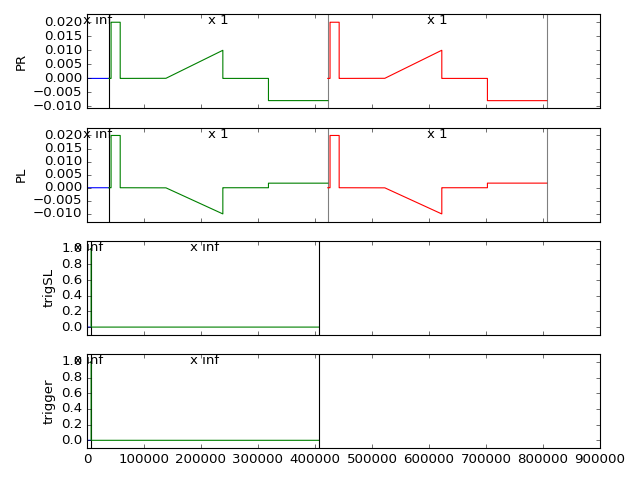

In [180]:
# detuning shorter than cycle, to properly trigger, 400us  long cycle time

detuning = waveform([w.AWG.ch1, w.AWG.ch2])
triggers = waveform([w.AWGMA.ch1, w.AWGMA.ch2])

w.AWG.t_sample = 16.
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample
        
    #AWGMA
    triggers.refresh()
    triggers.dwell(w.AWGMA.t_sample*800, at=(0.,0.))
    triggers.section(repeat=np.inf)
    
    t_delay =  0.  #1600 ,
    triggers.dwell(t_delay,      at = (0.,1.))   # trig1 for digitizer, trigch2 for AWG7122.
    triggers.dwell(1000, at = (1., 1.))  # trig1 is delayed to wait for output delay of trig2
    triggers.dwell(cycle_time - 1000 - t_delay, at =(0., 0.))
    triggers.section(repeat=np.inf)

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    detuning.section(wait = False, repeat=np.inf)    
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.04*cycle_time, at = Eject)
        detuning.dwell(0.04*cycle_time, at = Meas)
        detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
        
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.20*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        detuning.compensate(0.30*cycle_time - 16000)  # ramp_time + 0.1*cycle_time
        #5% margin for a trigger

        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)
#        all_ch.sync(go_to = 1, )#None if evol_time < max(evol_times) else 1)
        print w.AWG.ch1.seq.data[-1]    

    triggers.compose()
    triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations
    
#w.AWG.t_sample = 10 #500./64. #5.
evol_times = np.linspace(160, 320, 2)
send_ramp_pulses(evol_times = evol_times, cycle_time = 400e3, ramp_time = 100e3, Init = (0.010, -0.010),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(0.02, 0.02))   # Eject =(-0.008, 0.001)
all_ch.show()
time_label = 'dwell'

In [181]:
#w.AWG.jump(0)
w.AWGMA.jump(1)
w.AWG.jump(1)

In [42]:
w.AWG.jump(0)
w.AWGMA.jump(0)

In [49]:
w.AWGMA.t_sample = 8.

You may want to increase the AWG sampling time from 1.000000e+00 ns
{'repeat': 1, 'end': 80000.0, 'name': 'seq0_001', 'repeat_0': 1, 'repeat_1': 1, 'end_gtime': 80000.0, 'start': 1000.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': 1}
Loading the sequence into AWG (GPIB0::14::INSTR)
Sending seq0_000_ch1...
Sending seq0_001_ch1...
Waveforms generated in 0.00 and sent in 0.13
Sending seq0_000_ch2...
Sending seq0_001_ch2...
Waveforms generated in 0.02 and sent in 0.11
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 0.15 seconds


<IPython.core.display.Javascript object>


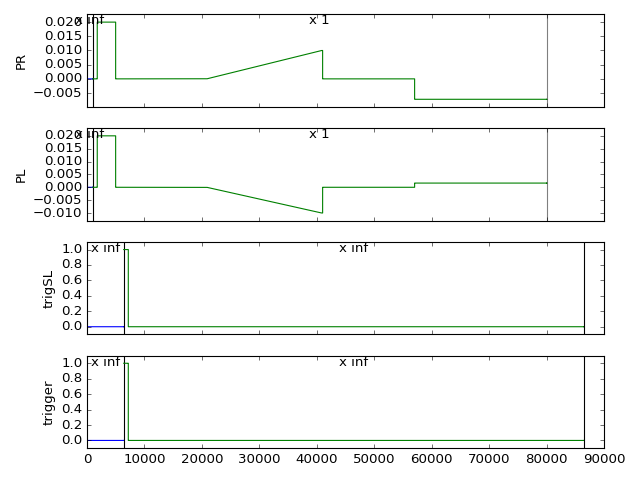

In [5]:
# detuning shorter than cycle, to properly trigger, 40us  short cycle

#detuning = waveform([w.AWG.ch1, w.AWG.ch2])
#triggers = waveform([w.AWGMA.ch1, w.AWGMA.ch2])

w.AWG.t_sample = 1.#500./64. #5.

def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample
        
    #AWGMA
    triggers.refresh()
    triggers.dwell(6400, at=(0.,0.)) # w.AWGMA.t_sample*800
    triggers.section(repeat=np.inf)
    
    t_delay =  0. #250 + 128 * w.AWG.t_sample  #  200 + 128 * w.AWG.t_sample, 
    triggers.dwell(t_delay,      at = (0.,1.))
    triggers.dwell(800, at = (1., 1.))
    triggers.dwell(cycle_time - 800 - t_delay, at =(0., 0.))
    triggers.section(repeat=np.inf)

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)    
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.04*cycle_time, at = Eject)
        detuning.dwell(0.04*cycle_time, at = Meas)
        detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
        
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.20*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        detuning.compensate(0.30*cycle_time - (840 * w.AWG.t_sample + 160.))  # ramp_time + 0.1*cycle_time
        #5% margin for a trigger

        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)
#        all_ch.sync(go_to = 1, )#None if evol_time < max(evol_times) else 1)
        print w.AWG.ch1.seq.data[-1]    

    triggers.compose()
    triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations
    
#w.AWG.t_sample = 2 #500./64. #5.
evol_times = np.linspace(160, 400, 1)
send_ramp_pulses(evol_times = evol_times, cycle_time = 80e3, ramp_time = 20e3, Init = (0.010, -0.010),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(0.02, 0.02))   # Eject =(-0.008, 0.001)
all_ch.show()
time_label = 'dwell'

{'repeat': 1, 'end': 80200.0, 'name': 'seq0_001', 'repeat_0': 1, 'repeat_1': 1, 'start': 200.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': None}
{'repeat': 1, 'end': 160200.0, 'name': 'seq0_002', 'repeat_0': 1, 'repeat_1': 1, 'start': 80200.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': 1}
Loading the sequence into AWG (GPIB0::14)
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.23 seconds


<IPython.core.display.Javascript object>


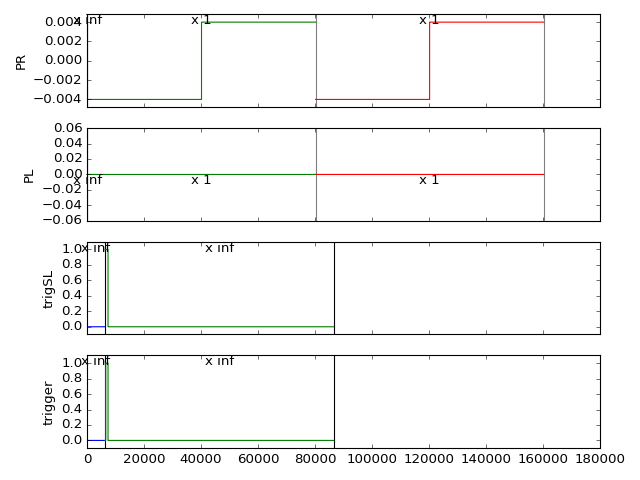

In [27]:
# AWG520 trigs 7122 and digitizer, rectangle pulse ?

# detuning = waveform([w.AWG.ch1, w.AWG.ch2])
# triggers = waveform([w.AWGMA.ch1, w.AWGMA.ch2])



def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample
        
    #AWGMA
    triggers.refresh()
    triggers.dwell(6400, at=(0.,0.)) # w.AWGMA.t_sample*800
    triggers.section(repeat=np.inf)
    
    t_delay =  220 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  180 + 128 * w.AWG.t_sample
    triggers.dwell(t_delay,      at = (0.,1.))
    triggers.dwell(800, at = (1., 1.))
    triggers.dwell(cycle_time - 800 - t_delay + (840 * w.AWG.t_sample + 160.)-8., at =(0., 0.))
    triggers.section(repeat=np.inf)

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)    
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time
        
        if [True,False][1]:
            detuning.dwell(0.1*cycle_time, at = Meas)
            detuning.dwell(0.2*cycle_time, at = Eject)
            detuning.dwell(0.2*cycle_time, at = Init)
            detuning.dwell(0.2*cycle_time, at = Eject)
            detuning.dwell(0.2*cycle_time, at = Init)
            detuning.dwell(0.1*cycle_time, at = Meas)
        else:
            detuning.dwell(0.5*cycle_time, at = Eject)
            detuning.dwell(0.5*cycle_time, at = Init)
            #detuning.dwell(0.1*cycle_time, at = Meas)
        
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
#         detuning.ramp(ramp_time, _from = Meas, to = Init)     
#         detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
#         detuning.dwell(0.20*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
#         detuning.compensate(0.30*cycle_time - (840 * w.AWG.t_sample + 160.))  # ramp_time + 0.1*cycle_time
        #5% margin for a trigger

        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)
#        all_ch.sync(go_to = 1, )#None if evol_time < max(evol_times) else 1)
        print w.AWG.ch1.seq.data[-1]    

    triggers.compose()
    triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations

w.AWGMA.t_sample = 8. #500./64. #5.
w.AWG.t_sample = 0.2 #500./64. #5.
evol_times = np.linspace(160, 400, 2)
send_ramp_pulses(evol_times = evol_times, cycle_time = 80e3, ramp_time = 20e3, Init = (0.004, -0.0),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(-0.004, 0))   # Eject =(-0.008, 0.001)
all_ch.show()
time_label = 'dwell'

In [28]:
w.AWGMA.jump(1)
w.AWG.jump(1)

{'repeat': 1, 'end': 168000.0, 'name': 'seq0_001', 'repeat_0': 1, 'repeat_1': 1, 'start': 8000.0, 'seq?': False, 'target': 0, 'wait': False, 'go_to': None}
{'repeat': 1, 'end': 328000.0, 'name': 'seq0_002', 'repeat_0': 1, 'repeat_1': 1, 'start': 168000.0, 'seq?': False, 'target': 0, 'wait': False, 'go_to': 1}
Loading the sequence into AWG (GPIB0::14)
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.27 seconds


<IPython.core.display.Javascript object>


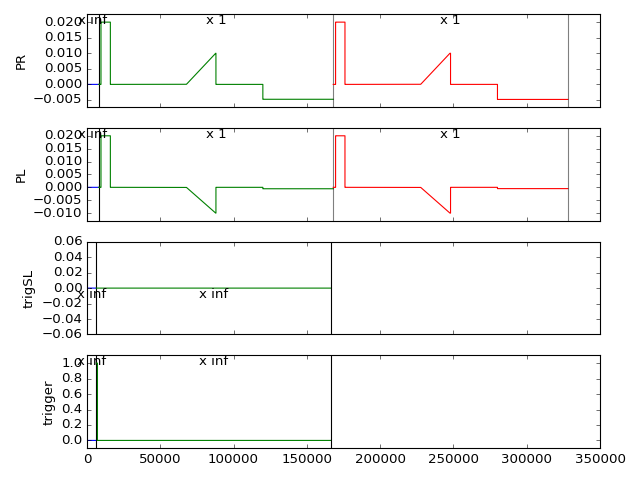

In [8]:
#  AWG520 trig only digitizer, no trigger to 7122,
#  Synchronized by compensating intrinsic delay between AWGs, if this delay is not varying.

#detuning = waveform([w.AWG.ch1, w.AWG.ch2])
#triggers = waveform([w.AWGMA.ch1,w.AWGMA.ch2])

#w.AWG.t_sample = 1. #500./64. #5.

def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample
        
    #AWGMA
    triggers.refresh()
    triggers.dwell(6400, at= (0., 0.)) # w.AWGMA.t_sample*800
    triggers.section(repeat=np.inf)
    
    #t_delay =  0. #250 + 128 * w.AWG.t_sample  #  200 + 128 * w.AWG.t_sample, 
    #triggers.dwell(t_delay,      at = 0.)
    triggers.dwell(800, at = (1., 0.))
    triggers.dwell(cycle_time - 800 , at = (0., 0.)) #  -t_delay
    triggers.section(repeat=np.inf)

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)    
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.04*cycle_time, at = Eject)
        detuning.dwell(0.04*cycle_time, at = Meas)
        detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
        
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.20*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        detuning.compensate(0.30*cycle_time)  #  - (840 * w.AWG.t_sample + 160.)
        #5% margin for a trigger

        detuning.section(wait = False, go_to = None if evol_time < max(evol_times) else 1)
#        all_ch.sync(go_to = 1, )#None if evol_time < max(evol_times) else 1)
        print w.AWG.ch1.seq.data[-1]    

    triggers.compose()
    triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations

w.AWGMA.t_sample = 8.
w.AWG.t_sample = 8. #500./64. #5.
evol_times = np.linspace(160, 400, 2)
send_ramp_pulses(evol_times = evol_times, cycle_time = 160e3, ramp_time = 20e3, Init = (0.010, -0.010),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(0.02, 0.02))   # Eject =(-0.008, 0.001)
all_ch.show()
time_label = 'dwell'

In [9]:
w.AWGMA.jump(1)
w.AWG.jump(1)

Loading the sequence into AWG (GPIB0::14::INSTR)


<IPython.core.display.Javascript object>


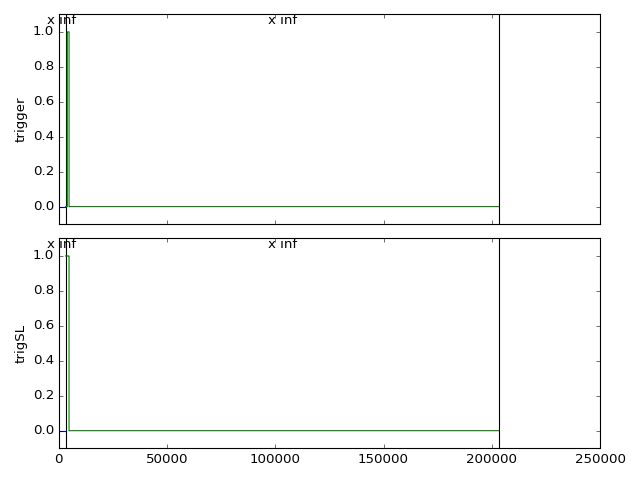

In [4]:
## temp  for testing AWG520 analog out


#detuning = waveform([w.AWG.ch1, w.AWG.ch2])
#triggers = waveform([w.AWGMA.ch1, w.AWGMA.ch2])

def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample
        
    #AWGMA
    triggers.refresh()
    triggers.dwell(3200, at=(0.,0.)) # w.AWGMA.t_sample*800
    triggers.section(repeat=np.inf)
    
    t_delay =  800.  #1600 ,
    triggers.dwell(t_delay,      at = (0.,1.))
    triggers.dwell(800, at = (1., 1.))
    triggers.dwell(cycle_time - 800 - t_delay, at =(0., 0.))
    triggers.section(repeat=np.inf)

    #AWGSL
#     detuning.refresh()
#     detuning.dwell(2*4800, at=(0., 0.))  # w.AWG.t_sample*2400
#     detuning.section(wait = False, repeat=np.inf)    
    
#     for evol_time in evol_times:
#         duty_time = ramp_time + evol_time

#         detuning.dwell(0.01*cycle_time, at = Meas)
#         detuning.dwell(0.04*cycle_time, at = Eject)
#         detuning.dwell(0.04*cycle_time, at = Meas)
#         detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
        
# #        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
#         detuning.ramp(ramp_time, _from = Meas, to = Init)     
#         detuning.dwell(evol_time, at = Init)
# #        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
#         detuning.dwell(0.20*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
#         detuning.compensate(0.30*cycle_time - 1200)  # ramp_time + 0.1*cycle_time
#         #5% margin for a trigger

#         detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)
# #        all_ch.sync(go_to = 1, )#None if evol_time < max(evol_times) else 1)
#         print w.AWG.ch1.seq.data[-1]    

    triggers.compose()
    triggers.load_seq()
#     detuning.compose()
#     detuning.load_seq()    
    
#     w.AWG.jump(0)
#     w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations

w.AWGMA.t_sample =8. #500./64. #5.
evol_times = np.linspace(200, 600, 2)
send_ramp_pulses(evol_times = evol_times, cycle_time = 200e3, ramp_time = 10e3, Init = (0.010, -0.010),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(0.02, 0.02))   # Eject =(-0.008, 0.001)
triggers.show()
time_label = 'dwell'

In [138]:
w.AWGMA.jump(1)

{'repeat': 1, 'end': 424000.0, 'name': 'seq0_001', 'repeat_0': 1, 'repeat_1': 1, 'start': 24000.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': None}
{'repeat': 1, 'end': 824000.0, 'name': 'seq0_002', 'repeat_0': 1, 'repeat_1': 1, 'start': 424000.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': 1}
Loading the sequence into AWG (GPIB0::14)
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.23 seconds


<IPython.core.display.Javascript object>


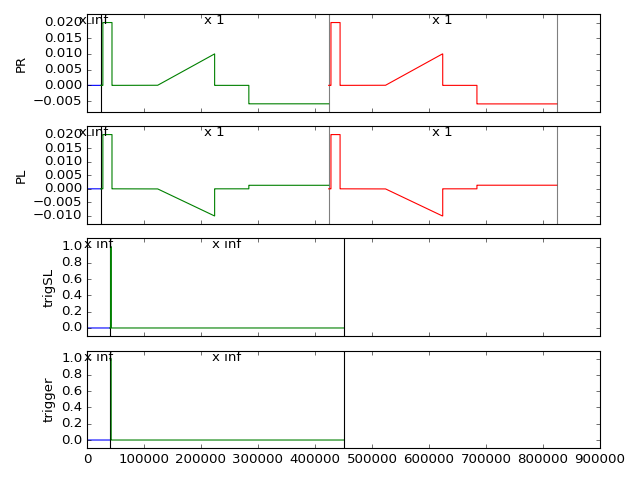

In [4]:
# trigger longer than cycle, to properly trigger


detuning = waveform([w.AWG.ch1, w.AWG.ch2])
triggers = waveform([w.AWGMA.ch1, w.AWGMA.ch2])

def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample
        
    #AWGMA
    triggers.refresh()
    triggers.dwell(w.AWGMA.t_sample*800, at=0.)
    triggers.section(repeat=np.inf)
    
    t_delay = 1600
    triggers.dwell(t_delay,      at = (0,1))
    triggers.dwell(1000, at = (1,1))
    triggers.dwell(cycle_time+8000, at =0)
    triggers.section(repeat=np.inf)

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    detuning.section(wait = False, repeat=np.inf)    
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.04*cycle_time, at = Eject)
        detuning.dwell(0.04*cycle_time, at = Meas)
        detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
        
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.15*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        detuning.compensate(0.35*cycle_time)  # ramp_time + 0.1*cycle_time
        #5% margin for a trigger

        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)
#        all_ch.sync(go_to = 1, )#None if evol_time < max(evol_times) else 1)
        print w.AWG.ch1.seq.data[-1]    

    triggers.compose()
    triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations
    
w.AWG.t_sample = 10 #500./64. #5.
evol_times = np.linspace(200, 600, 2)
send_ramp_pulses(evol_times = evol_times, cycle_time = 400e3, ramp_time = 100e3, Init = (0.010, -0.010),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(0.02, 0.02))   # Eject =(-0.008, 0.001)
all_ch.show()
time_label = 'dwell'

In [5]:
#w.AWG.jump(0)
w.AWGMA.jump(1)
w.AWG.jump(1)

In [111]:
#n = 2
w.AWG.jump(1)
sleep(1)
w.AWGMA.jump(1)
sleep(1)
#w.AWGMA.jump(0)
#sleep(1)
# print w.AWG.safe_query('*OPC?')
#w.AWG.jump(0)
#sleep(1)


In [99]:
#w.AWG.safe_query('*ESR?')
w.AWG.safe_query('SYSTem:ERRor[:NEXT]?')

u'128'

{'repeat': 1, 'end': 994000.0, 'name': 'seq0_002', 'repeat_0': 1, 'repeat_1': 1, 'start': 974000.0, 'seq?': False, 'target': 0, 'wait': False, 'go_to': None}
{'repeat': 1, 'end': 1964000.0, 'name': 'seq0_004', 'repeat_0': 1, 'repeat_1': 1, 'start': 1944000.0, 'seq?': False, 'target': 0, 'wait': False, 'go_to': 0}
Loading the sequence into AWG (GPIB0::14)
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.42 seconds


<IPython.core.display.Javascript object>


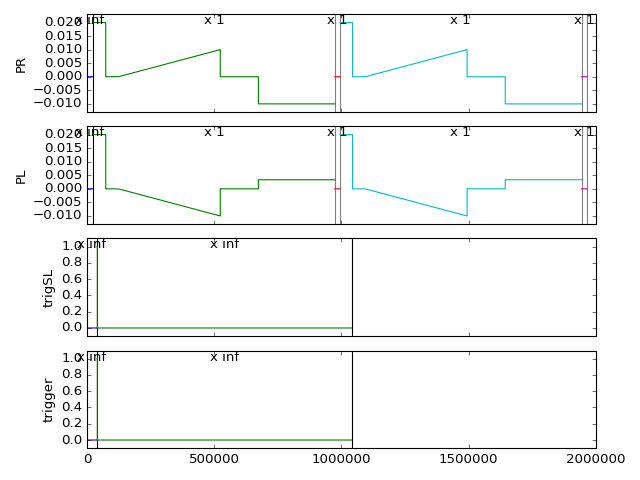

In [103]:
# seperated sections of detuning, with margin

detuning = waveform([w.AWG.ch1, w.AWG.ch2])
triggers = waveform([w.AWGMA.ch1, w.AWGMA.ch2])

def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample
        
    #AWGMA
    triggers.refresh()
    triggers.dwell(w.AWGMA.t_sample*800, at=0.)
    triggers.section(repeat=np.inf)

    triggers.dwell(1000, at = (1,1))
    triggers.dwell(cycle_time - 1000, at =0)
    triggers.section(repeat=np.inf)

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    detuning.section(wait = False, repeat=np.inf)    
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        detuning.dwell(0.05*cycle_time, at = Eject)
        detuning.dwell(0.04*cycle_time, at = Meas)
        detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
        
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.15*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        detuning.compensate(0.30*cycle_time)  # ramp_time + 0.1*cycle_time
        detuning.section(wait = True)

        detuning.dwell(0.02*cycle_time, at = 0)     #3% margin for the trigger

        detuning.section(go_to = None if evol_time < max(evol_times) else 0)
#        all_ch.sync(go_to = 1, )#None if evol_time < max(evol_times) else 1)
        print w.AWG.ch1.seq.data[-1]    

    triggers.compose()
    triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations
    
w.AWG.t_sample = 10 #500./64. #5.
evol_times = np.linspace(200, 600, 2)
send_ramp_pulses(evol_times = evol_times, cycle_time = 1000e3, ramp_time = 400e3, Init = (0.010, -0.010),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(0.02, 0.02))   # Eject =(-0.008, 0.001)
all_ch.show()
time_label = 'dwell'

In [107]:
#n = 2
w.AWG.jump(1)
sleep(1)
w.AWGMA.jump(1)
sleep(1)
#w.AWGMA.jump(0)
#sleep(1)
# print w.AWG.safe_query('*OPC?')
#w.AWG.jump(0)
#sleep(1)


In [109]:
w.AWG.jump(2)
#w.AWGMA.jump(0)

{'repeat': 1, 'end': 1032000.0, 'name': 'seq0_001', 'repeat_0': 1, 'repeat_1': 1, 'start': 32000.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': None}
{'repeat': 1, 'end': 2032000.0, 'name': 'seq0_002', 'repeat_0': 1, 'repeat_1': 1, 'start': 1032000.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': None}
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.29 seconds
Loading the sequence into AWG (GPIB0::14)


<IPython.core.display.Javascript object>


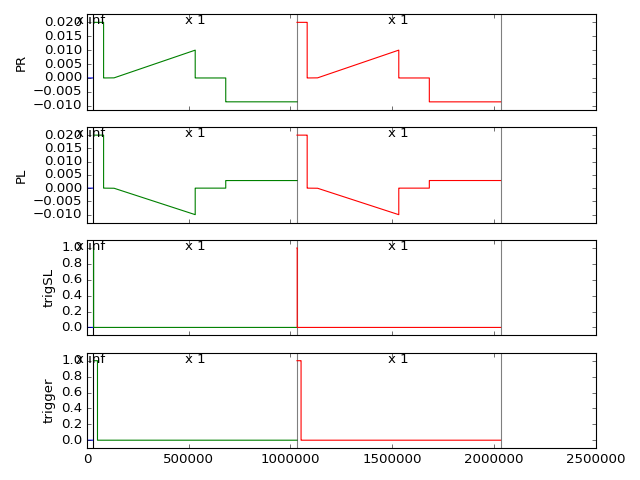

In [74]:
# test 2 AWGs
#adiabatic ramp for T+ initialization  200us or 50us, 10mV
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    
    detuning.dwell(w.AWG.t_sample*3200, at=0.)
#    trigSL.excurse(100, to = 1.)
    all_ch.section(wait = False, repeat=np.inf)

    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        trigSL.excurse(1000, to = 1.)
        trigger.excurse(20000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Eject)
        detuning.dwell(0.04*cycle_time, at = Meas)
        detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
        
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.15*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        detuning.compensate(0.35*cycle_time)  # ramp_time + 0.1*cycle_time
        #detuning.dwell(ramp_time, at = [-0.5*i for i in Init])
        #detuning.dwell(0.1*cycle_time, at = [-0.5*e for e in Eject])
        detuning.section(wait = True)
        all_ch.section(go_to = 1, )#None if evol_time < max(evol_times) else 1)
        print w.AWG.ch1.seq.data[-1]


    all_ch.compose()

    all_ch.load_seq()
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 10 #500./64. #5.
evol_times = np.linspace(200, 600, 2)
send_ramp_pulses(evol_times = evol_times, cycle_time = 1000e3, ramp_time = 400e3, Init = (0.010, -0.010),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(0.02, 0.02))   # Eject =(-0.008, 0.001)
all_ch.show()
time_label = 'dwell'

In [73]:
w.AWG.ch1.seq.data

[{'end': 32000.0,
  'go_to': None,
  'name': 'seq0_000',
  'repeat': inf,
  'repeat_0': 0,
  'repeat_1': 1,
  'seq?': False,
  'start': 0.0,
  'target': 0,
  'wait': False},
 {'end': 1032000.0,
  'go_to': None,
  'name': 'seq0_001',
  'repeat': 1,
  'repeat_0': 1,
  'repeat_1': 1,
  'seq?': False,
  'start': 32000.0,
  'target': 0,
  'wait': True},
 {'end': 2032000.0,
  'go_to': None,
  'name': 'seq0_002',
  'repeat': 1,
  'repeat_0': 1,
  'repeat_1': 1,
  'seq?': False,
  'start': 1032000.0,
  'target': 0,
  'wait': True}]

In [70]:
n = 2
w.AWG.jump(n)
w.AWGMA.jump(n)

w.AWGMA.jump(0)


Exception: Cannot jump while the AWG is waiting for trigger or stopped.

You may want to increase the AWG sampling time from 1.000000e+01 ns
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.14 seconds
Loading the sequence into AWG (GPIB0::14)


<IPython.core.display.Javascript object>


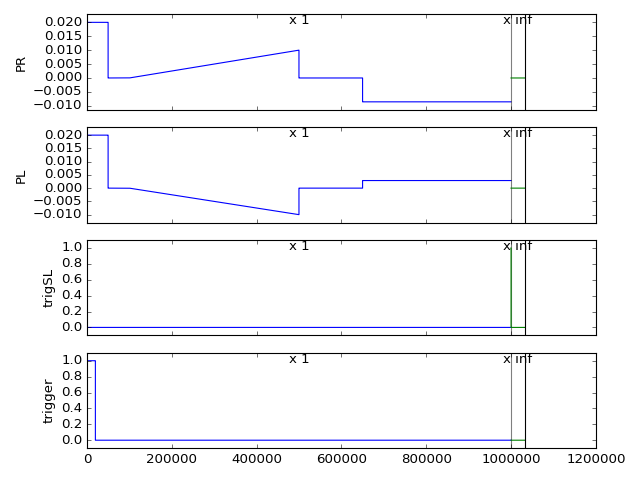

In [6]:
# test 2 AWGs
#adiabatic ramp for T+ initialization  200us or 50us, 10mV
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        trigSL.excurse(1000, to = 1.)
        trigger.excurse(20000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Eject)
        detuning.dwell(0.04*cycle_time, at = Meas)
        detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
        
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.15*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        detuning.compensate(0.35*cycle_time)  # ramp_time + 0.1*cycle_time
        #detuning.dwell(ramp_time, at = [-0.5*i for i in Init])
        #detuning.dwell(0.1*cycle_time, at = [-0.5*e for e in Eject])
        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 0)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    trigSL.excurse(100, to = 1.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    #w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 10 #500./64. #5.
evol_times = np.linspace(200, 2000, 1)
send_ramp_pulses(evol_times = evol_times, cycle_time = 1000e3, ramp_time = 400e3, Init = (0.010, -0.010),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(0.02, 0.02))   # Eject =(-0.008, 0.001)
all_ch.show()
time_label = 'dwell'

### T +

You may want to increase the AWG sampling time from 1.000000e+01 ns
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.20 seconds


<IPython.core.display.Javascript object>


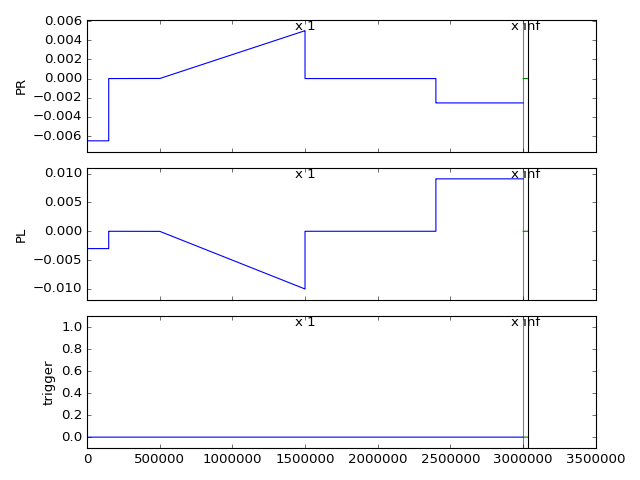

In [18]:
#adiabatic ramp for T+ initialization  200us or 50us 15mV
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 1*ramp_time + evol_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Eject)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.40*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)   

        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.3*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        detuning.compensate(0.2*cycle_time)  # ramp_time + 0.1*cycle_time
        #detuning.dwell(ramp_time, at = [-0.5*i for i in Init])
        #detuning.dwell(0.1*cycle_time, at = [-0.5*e for e in Eject])
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 10 #500./64. #5.
evol_times = np.linspace(100,200, 1)
send_ramp_pulses(evol_times = evol_times, cycle_time = 3000e3, ramp_time = 1000e3, Init = (0.005, -0.010), Eject = (-0.0065, -0.003))
all_ch.show()
#sleep(2.0)
time_label = 'dwell'

# - - - - - - - - - - - - Measure - - - - - -  - - - - - - 


### T faster

In [8]:
cmd = "*ESR?" # "*ESR?", "SYSTem:ERRor[:NEXT]?"
res = w.AWG.safe_query(cmd)
print res

32


In [8]:
w.AWG.errors

[]

Loading the sequence into AWG (TCPIP::192.168.1.7::4000::SOCKET)
Waveforms generated in 1.61 and sent in 0.60
Waveforms generated in 1.76 and sent in 0.51
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 0.29 seconds


<IPython.core.display.Javascript object>


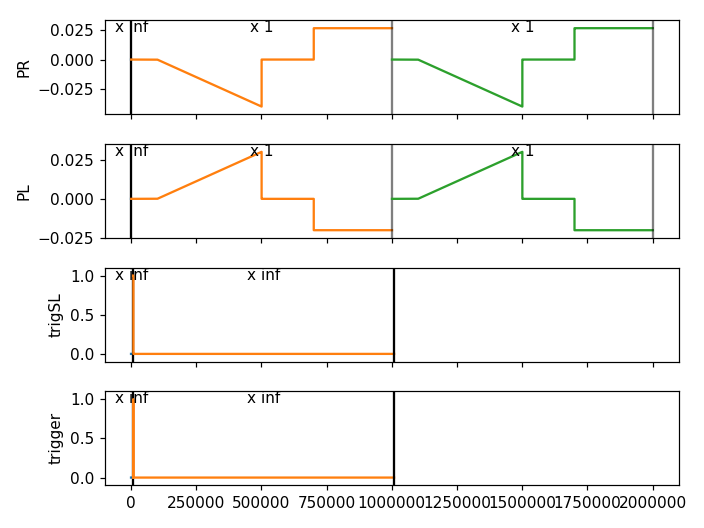

In [73]:
#adiabatic ramp for T+ initialization  200us or 50us, 10mV
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    #AWGMA
    triggers.refresh()
    triggers.dwell(w.AWGMA.t_sample*800, at=(0.,0.)) # w.AWGMA.t_sample*800
    triggers.section(repeat=np.inf)

    t_delay =  220 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  160 + 128 * w.AWG.t_sample
    triggers.dwell(t_delay, at = (0.,1.))
    triggers.dwell(800., at = (1., 1.))     #( w.AWGMA.t_sample*400.)
    #triggers.section() 
    triggers.dwell(cycle_time -t_delay - 800. + (840 * w.AWG.t_sample + 170.), at =(0., 0.)) # + (840 * w.AWG.t_sample + 160.)-8.
    #triggers.section(division = True,go_to = 1)   
    triggers.section(repeat=np.inf)  

#     triggers.compose()
#     triggers.load_seq()

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)    
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.04*cycle_time, at = Eject)
        detuning.dwell(0.04*cycle_time, at = Meas)
        detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.20*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        #detuning.section()
        detuning.compensate(0.30*cycle_time - 0.)  #  - (840 * w.AWG.t_sample + 160.)
        #cval = detuning.compensate(0.30*cycle_time - 0.).cval  #  - (840 * w.AWG.t_sample + 160.)
        #print cval
        #detuning.dwell(0.30*cycle_time, at = -0.5 * Init)  
        #detuning.section(division = True) 
        #5% margin for a trigger
        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1) # None if evol_time < max(evol_times) else 1

    triggers.compose()
    triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations 

w.AWGMA.t_sample = 10.
w.AWG.t_sample = 0.8 #500./64. #5.
evol_times = np.linspace(200., 300., 2) # 200, 300
send_ramp_pulses(evol_times = evol_times, cycle_time = 1000e3, ramp_time = 400e3, Init = (-0.040, 0.030),  # (-0.020, 0.018)
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(-0.00, 0.00))   # Eject =(-0.008, 0.001), Init = (0.016, -0.016),
all_ch.show()
time_label = 'dwell'

In [7]:
w.AWG.errors

[u'-110,"Command header error; Illegal character in header - SYSTem:ERRor["']

In [4]:
#adiabatic ramp for T+ initialization  200us or 50us, 10mV
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    #AWGMA
    triggers.refresh()
    triggers.dwell(w.AWGMA.t_sample*800, at=(0.,0.)) # w.AWGMA.t_sample*800
    triggers.section(repeat=np.inf)

    t_delay =  220 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  160 + 128 * w.AWG.t_sample
    triggers.dwell(t_delay, at = (0.,1.))
    triggers.dwell(800., at = (1., 1.))     #( w.AWGMA.t_sample*400.)
    #triggers.section() 
    triggers.dwell(cycle_time -t_delay - 800. + (840 * w.AWG.t_sample + 180.), at =(0., 0.)) # + (840 * w.AWG.t_sample + 160.)-8.
    #triggers.section(division = True,go_to = 1)   
    triggers.section(repeat=np.inf)  

    triggers.compose()
    triggers.load_seq()

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)    
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        detuning.dwell(0.05*cycle_time, at = Eject)
        detuning.dwell(0.04*cycle_time, at = Meas)
        detuning.section(wait = True) 
        detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
        detuning.section(division = True,wait = False)
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.20*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        #detuning.section()
        detuning.compensate(0.30*cycle_time - 0.)  #  - (840 * w.AWG.t_sample + 160.)
        #cval = detuning.compensate(0.30*cycle_time - 0.).cval  #  - (840 * w.AWG.t_sample + 160.)
        #print cval
        #detuning.dwell(0.30*cycle_time, at = -0.5 * Init)  
        #detuning.section(division = True) 
        #5% margin for a trigger
        detuning.section(wait = False, go_to = None if evol_time < max(evol_times) else 1) # None if evol_time < max(evol_times) else 1

#     triggers.compose()
#     triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations 

w.AWGMA.t_sample = 10.
w.AWG.t_sample = 0.4 #500./64. #5.
evol_times = np.linspace(200., 2000., 1)
send_ramp_pulses(evol_times = evol_times, cycle_time = 400e3, ramp_time = 100e3, Init = (0.015, -0.030),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(-0.00, 0.00))   # Eject =(-0.008, 0.001)
all_ch.show()
time_label = 'dwell'

You may want to increase the AWG sampling time from 4.000000e-01 ns
Loading the sequence into AWG (GPIB0::14::INSTR)


Exception: Error occurred in AWG7000 (@ TCPIP::192.168.1.3::INSTR):
1
5000,"Sequence/Waveform loading error; E11209 - :OUTP1:STAT ON"
5000,"Sequence/Waveform loading error; E11209 - :OUTP2:STAT ON"


<IPython.core.display.Javascript object>


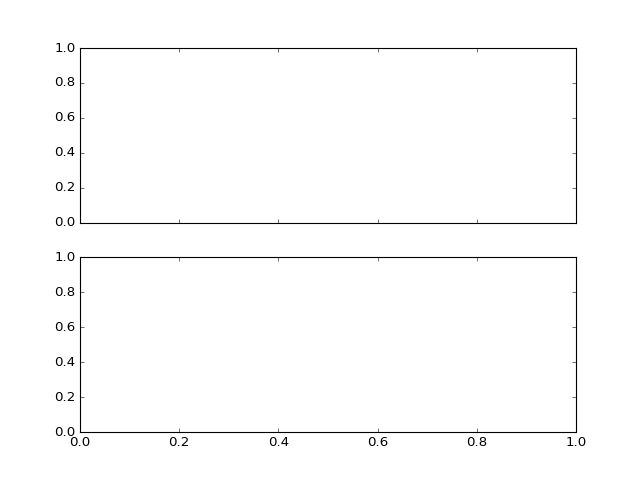

ValueError: max() arg is an empty sequence

In [11]:
detuning.show(-1)

In [3]:
print w.AWGMA.errors

[u'-102,"Syntax error; unexpected EOI encountered - :MMEM:DATA ""seq0_001_ch1."', u'0,"No error"']


In [6]:
# detuning shorter than cycle, to properly trigger, 40us  short cycle

#detuning = waveform([w.AWG.ch1, w.AWG.ch2])
#triggers = waveform([w.AWGMA.ch1, w.AWGMA.ch2])

w.AWGMA.t_sample = 8.#500./64. #5.
w.AWG.t_sample = 1.#500./64. #5.

def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Medi = ( 0.01, -0.01),
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample
        
    #AWGMA
    triggers.refresh()
    triggers.dwell(w.AWGMA.t_sample*800, at=(0.,0.)) # w.AWGMA.t_sample*800
    triggers.section(repeat=np.inf)
    
    t_delay =  0. #250 + 128 * w.AWG.t_sample  #  200 + 128 * w.AWG.t_sample, 
    triggers.dwell(t_delay,      at = (0.,1.))
    triggers.dwell(800, at = (1., 1.))
    triggers.dwell(cycle_time - 800 - t_delay, at =(0., 0.))
    triggers.section(repeat=np.inf)
    
    triggers.compose()
    triggers.load_seq()

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)    

    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.04*cycle_time, at = Eject)
        detuning.dwell(0.04*cycle_time, at = Meas)
        detuning.dwell(0.41*cycle_time - duty_time, at = Meas)
        
#        detuning.ramp(20*ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
#        detuning.ramp(ramp_time, _from = Init, to = Meas)   
        
        detuning.dwell(0.20*cycle_time, at = Meas)      # 0.4*cycle_time - ramp_time
        detuning.compensate(0.30*cycle_time - (840 * w.AWG.t_sample + 160.))  # ramp_time + 0.1*cycle_time
        #5% margin for a trigger

        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)
#        all_ch.sync(go_to = 1, )#None if evol_time < max(evol_times) else 1)
        print w.AWG.ch1.seq.data[-1]    

#     triggers.compose()
#     triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations
    
#w.AWG.t_sample = 2 #500./64. #5.
evol_times = np.linspace(160, 400, 1)
send_ramp_pulses(evol_times = evol_times, cycle_time = 80e3, ramp_time = 20e3, Init = (0.010, -0.010),
                 Meas  = (0.00,  0.00), Medi = (0.0012, -0.0012), Eject =(0.02, 0.02))   # Eject =(-0.008, 0.001)
all_ch.show()
time_label = 'dwell'

You may want to increase the AWG sampling time from 1.000000e+00 ns
Loading the sequence into AWG (GPIB0::14::INSTR)
{'repeat': 1, 'end': 80000.0, 'name': 'seq0_001', 'repeat_0': 1, 'repeat_1': 1, 'start': 1000.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': 1}


Exception: Error occurred in AWG7000 (@ TCPIP::192.168.1.3::INSTR):
1
5000,"Sequence/Waveform loading error; E11204 - OUTPUT1:STATE 1"
5000,"Sequence/Waveform loading error; E11204 - OUTPUT2:STATE 1"


You may want to increase the AWG sampling time from 5.000000e+00 ns
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.15 seconds


<IPython.core.display.Javascript object>


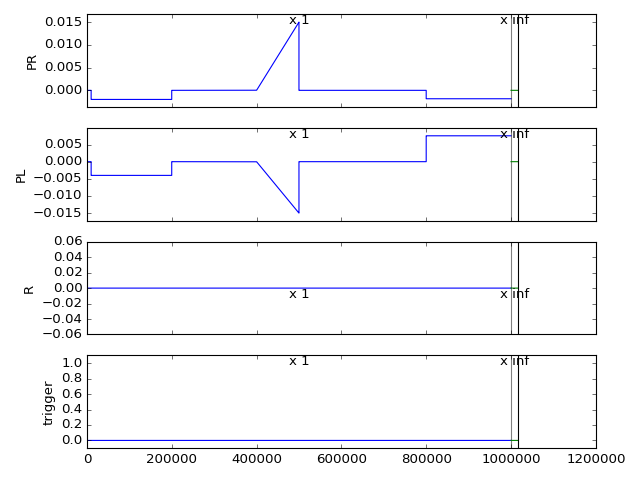

In [73]:
#adiabatic ramp for T+ initialization , with Ejection
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.19*cycle_time, at = Eject)
        detuning.dwell(0.30*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)

        detuning.dwell(0.4*cycle_time - ramp_time, at = Meas)
        detuning.compensate(ramp_time+0.1*cycle_time)
        #detuning.dwell(ramp_time, at = [-0.5*i for i in Init])
        #detuning.dwell(0.1*cycle_time, at = [-0.5*e for e in Eject])
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 5 #500./64. #5.
evol_times = np.linspace(0, 10, 1)
send_ramp_pulses(evol_times = evol_times, cycle_time = 1000e3, ramp_time = 100e3, Init = (0.015, -0.015), Eject = (-0.002, -0.004))
all_ch.show()
time_label = 'dwell'

In [318]:
# ev = zip(np.linspace(0,10,11),np.linspace(0,10,11))
# for evv in ev:
#     print evv
delta_P = np.linspace(0,0.015,31)
Evols = zip(delta_P, -delta_P) 
print Evols

[(0.0, -0.0), (0.00050000000000000001, -0.00050000000000000001), (0.001, -0.001), (0.0015, -0.0015), (0.002, -0.002), (0.0025000000000000001, -0.0025000000000000001), (0.0030000000000000001, -0.0030000000000000001), (0.0035000000000000001, -0.0035000000000000001), (0.0040000000000000001, -0.0040000000000000001), (0.0045000000000000005, -0.0045000000000000005), (0.0050000000000000001, -0.0050000000000000001), (0.0054999999999999997, -0.0054999999999999997), (0.0060000000000000001, -0.0060000000000000001), (0.0065000000000000006, -0.0065000000000000006), (0.0070000000000000001, -0.0070000000000000001), (0.0074999999999999997, -0.0074999999999999997), (0.0080000000000000002, -0.0080000000000000002), (0.0085000000000000006, -0.0085000000000000006), (0.0090000000000000011, -0.0090000000000000011), (0.0094999999999999998, -0.0094999999999999998), (0.01, -0.01), (0.010500000000000001, -0.010500000000000001), (0.010999999999999999, -0.010999999999999999), (0.0115, -0.0115), (0.012, -0.012), (0

### map ST+ crossing

In [16]:
np.array([1, -2.25])*np.linspace(0,0.012,4).reshape(4,1)

array([[ 0.   , -0.   ],
       [ 0.004, -0.009],
       [ 0.008, -0.018],
       [ 0.012, -0.027]])

In [6]:
Cent_po = np.array([-0.3467,-0.9694])
Me_po   = Cent_po + np.array([0.0045,-0.0025])
print Me_po

[-0.3422 -0.9719]


Loading the sequence into AWG (TCPIP::192.168.1.7::4000::SOCKET)
Waveforms generated in 2.83 and sent in 4.03
Waveforms generated in 2.79 and sent in 3.92
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.87 seconds


<IPython.core.display.Javascript object>


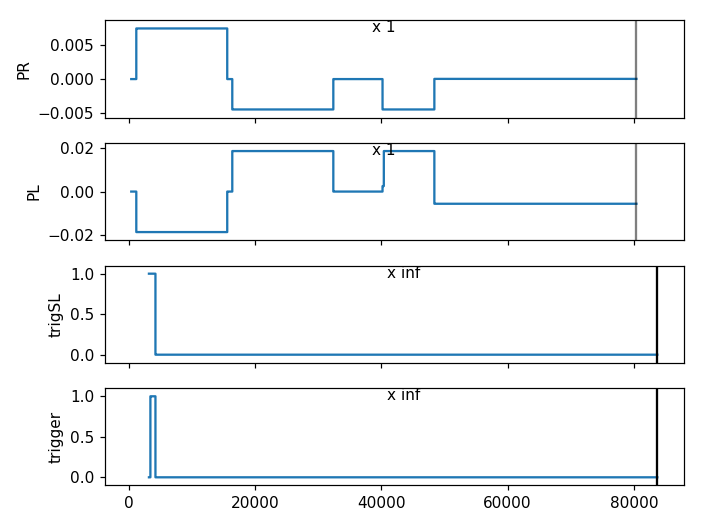

In [296]:
# for T+, Modified in 2018_06_128, with Function

# Mes = np.array([-0.8784, -0.3985])
# Met = np.array([-0.8858, -0.4004])#([-0.8841, -0.4025])
# Ej =  np.array([-0.8866, -0.3971])

# In = np.array([-0.7448, -0.2742])
def STplus_pulses(Evols,
                  evol_time = 100, #ns
                  cycle_time = 1000e+3,
                  ramp_time =  100,
                  Eject = (-0.001, 0.005),
                  Read = (-0.001, 0.001),
                  Meas = (0.00,  0.00)):
#     if w.AWG.t_sample > evol_times[1]-evol_times[0]:
#         print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf) 
    
    for Evol in Evols:
        duty_time = ramp_time + evol_time + ramp_time

        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.18*cycle_time, at = Eject)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.20*cycle_time, at = Read)
        detuning.dwell(0.10*cycle_time - duty_time, at = Meas)

        detuning.ramp(ramp_time, _from = Meas, to = Evol)
    #    detuning.ramp(ramp_time, _from = Evol, to = Meta)
        detuning.dwell(evol_time, at = Evol)
        detuning.ramp(ramp_time,  _from = Evol, to = Read)
    #    detuning.ramp(ramp_time, _from = Evol, to = Meas)

        detuning.dwell(0.1*cycle_time, at = Read)
        detuning.compensate(0.4*cycle_time)
        detuning.section(wait = True, go_to = 1 if np.array_equal(Evol, Evols[-1]) else None)

    detuning.compose()
    detuning.load_seq()  
#     all_ch.compose()
#     all_ch.load_seq()
    
    w.AWG.jump(0)
    w.AWG._OPC()



#Init = 
Cent_po = np.array([-0.5958,-0.8985])
Me_po   = Cent_po + np.array([0.0045,-0.0025]) #([-0.3475,-0.9680]) #Cent_po + np.array([0.0010,0.0051]) # np.array([-0.0011,0.0101])
Re_po   = Cent_po + np.array([0.00,  0.016]) #np.array([-0.3520,-0.9555])   # Me_po # np.array([-0.1820, -0.8846]) #np.array([-0.8010,-0.1923])

PR_array = np.linspace(0,0.020,51)
Evol_vec = np.array([-1.0, 1.0])*PR_array.reshape(len(PR_array),1)  ## relative to center position cent_po

Evols = Cent_po - Me_po + Evol_vec
Ej_po = Cent_po + np.array([0.012, -0.021]) #  + np.array([0.023, -0.023])   #np.array([-0.3490, -0.9779])
Eject = Ej_po - Me_po #np.array([-0.007, -0.004])  # [-0.009, 0.002]
#delta_P = np.linspace(0., 0.015, 51)
#Evols = Init                            #zip(delta_P, -delta_P)    #np.array(0.,1.,21)*0.015 # 15mV 

Meas = (0.00,  0.00)
Read = Re_po - Me_po

ramp_time =  4.
evol_time =  200. #ns , 150ns
cycle_time = 80e+3

w.AWGMA.t_sample = 8.
w.AWG.t_sample = 0.4

# triggers
triggers.refresh()
triggers.dwell(w.AWGMA.t_sample*400, at=(0.,0.)) # w.AWGMA.t_sample*800
triggers.section(repeat=np.inf)

t_delay =  216 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  180 + 128 * w.AWG.t_sample
triggers.dwell(t_delay,      at = (0.,1.))
triggers.dwell(800, at = (1., 1.))
triggers.dwell(cycle_time - 800 - t_delay + (840 * w.AWG.t_sample + 176.), at =(0., 0.)) #  - 8.
triggers.section(repeat=np.inf)

triggers.compose()
triggers.load_seq()
w.AWGMA.jump(0)
w.AWGMA._OPC()

STplus_pulses(evol_time = evol_time, cycle_time = cycle_time, ramp_time = ramp_time, Eject = Eject, Meas = Meas, Read =Read, Evols = Evols)

all_ch.show(1)
time_label = 'dwell'

In [12]:
STplus_pulses(evol_time = evol_time, cycle_time = cycle_time, ramp_time = 12., Eject = Eject, Meas = Meas, Read =Read, Evols = Evols)


'L = -0.35 V, PL = -0.9772 V, T = -0.26 V, PR = -0.3425 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.226 V, SR = -0.725 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=0.200000'

In [10]:
w.AWG.clear_buffer()

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 3.85 seconds


<IPython.core.display.Javascript object>


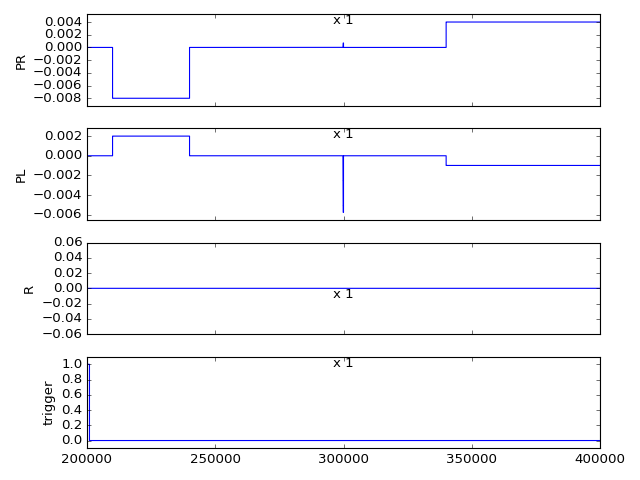

In [131]:
# for T+, Modified in 2018_03_16, with np.array

# Mes = np.array([-0.8784, -0.3985])
# Met = np.array([-0.8858, -0.4004])#([-0.8841, -0.4025])
# Ej =  np.array([-0.8866, -0.3971])

# In = np.array([-0.7448, -0.2742])

evol_time = 400 #ns
cycle_time = 200e+3
ramp_time =  100
#Init = 
Cent_po = np.array([-1.0954,-0.5571])
Me_po   = np.array([-1.0957,-0.5519])
PR_array = np.linspace(0,0.020,51)
Init_vec = np.array([1, -1.4])*PR_array.reshape(51,1)  ## relative to center position cent_po

Init = Cent_po - Me_po + Init_vec
Eject = np.array([-0.008, 0.002])
#delta_P = np.linspace(0., 0.015, 51)
Evols = Init                            #zip(delta_P, -delta_P)    #np.array(0.,1.,21)*0.015 # 15mV 
                
Meas = (0.00,  0.00)

w.AWG.t_sample = 1

# if w.AWG.t_sample > evol_times[1]-evol_times[0]:
#     print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

all_ch.refresh()
for Evol in Evols:
    duty_time = ramp_time + evol_time

    trigger.excurse(1000, to = 1.)
    detuning.dwell(0.05*cycle_time, at = Meas)
    detuning.dwell(0.15*cycle_time, at = Eject)
    detuning.dwell(0.3*cycle_time - duty_time, at = Meas)

    detuning.ramp(ramp_time, _from = Meas, to = Evol)
#    detuning.ramp(ramp_time, _from = Evol, to = Meta)
    detuning.dwell(evol_time, at = Evol)
#    detuning.ramp(ramp_time, _from = Evol, to = Meas)

    detuning.dwell(0.2*cycle_time, at = Meas)
    detuning.compensate(0.3*cycle_time)
    all_ch.section(go_to = 0 if np.array_equal(Evol, Evols[len(Evols)-1]) else None)

detuning.dwell(w.AWG.t_sample*2400, at=0.)
all_ch.section(repeat=np.inf)
all_ch.compose()

all_ch.load_seq()
w.AWG.jump(-1)
w.AWG._OPC()

#w.AWG.t_sample = 0.5
#evol_times = np.arange(0, 40, 2)
#send_ST0_pulses(evol_times, ramp_time = 100,  Init = (0.01, -0.01), Evol = (0.050, -0.050))
# evol_times = np.linspace(0, 40, 41)
# send_ST0_pulses(evol_times = evol_times, cycle_time = 20e+3, ramp_time = 50, Eject = (0.0036, 0.0024),
#                 Meas = (0.00,  0.00), Init = (0.007, -0.007), Evol = (0.060, -0.060))
all_ch.show(1)
time_label = 'dwell'

In [297]:
## Measurement - detuning depth dependence
(w.PR, w.PL) = Me_po  # Me_po
sleep(1.)

num_blocks = 3
num_recs   = 400

if time_label == 'evolution' or time_label == 'dwell':
    config_CDS = {'meas_offset':40.2*us_pnts, 'meas_samples': 4.0*us_pnts,  #7.6
                  'ref_offset': 16.2*us_pnts, 'ref_samples': 7.6*us_pnts}

with ex.data_store(diskless=False) as d:
    d.axis(np.arange(num_blocks), var="block")
    d.axis(np.arange(num_recs), var="rec")
    d.axis(PR_array*1000, var="det_PR", units="mV")
    d.storage('Vrf', noplot = True, chunksizes=(1, num_recs, len(PR_array)))
    #d.setup_plot(live_plot=False)

    with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                     num_blocks=num_blocks+1, recs_per_block=len(PR_array)*num_recs,
                     **config_CDS):
        sleep(0.2)
        w.AWG.jump(1)
        w.AWGMA.jump(1)
#         for _ in range(1):
#             w.Vrf.val #wait for capacitor charge up
        for _ in d.loop(): #real measurement
            d.put(w.Vrf.val.reshape(num_recs,len(PR_array)))
        w.AWG.jump(0)
        w.AWGMA.jump(0)


In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
(2, :, :) done.
Closed 190816120904


In [9]:
#w.AWG.jump(0)
#w.AWGMA.jump(1)

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

#### 2D mapping 

In [362]:
w.check()

'L = -0.38 V, PL = -0.9279 V, T = -0.35 V, PR = -0.359 V, R = -0.69 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.3376 V, SR = -0.74 V, G1 = 0. V, G2 = 0. V, SMU(SMU.voltage=0.000000), rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=0.100000'

In [298]:
### Evol_time dependence  .... SWAP 2D -  detuning(evol position) and evol_time
num_blocks = 3
num_recs   = 400  # in this measu, calc Ps along recs

if time_label == 'evolution' or time_label == 'dwell':
    config_CDS = {'meas_offset':40.2*us_pnts, 'meas_samples': 4.0*us_pnts,
                  'ref_offset': 16.2*us_pnts, 'ref_samples': 7.6*us_pnts}

ramp_time =  4.
evol_time =  200. #ns
cycle_time = 80e+3

#dvec = np.array([1,-1.3])
Barr = np.linspace(0.2, -0.2, 81)
#evol_position = np.linspace(1.2,9.2, 21)*0.001
PR_array = np.linspace(0,0.020, 51)
Evol_vec = np.array([-1.0, 1.0])*PR_array.reshape(len(PR_array),1)  ## relative to center position cent_po
Evols = Cent_po - Me_po + Evol_vec

#evol_time = 200
n_blocks = np.arange(num_blocks)
n_recs = np.arange(num_recs) 

with ex.data_store(diskless=False) as d:
    d.axis(Barr, var="B",units="T")     # at each det_PR, store 1 bocck of len(recs)*len(evol_times)
    d.axis(n_blocks, var="block")    
    d.axis(n_recs, var="rec")
    #d.axis(evol_position, var="det_PR")   
    d.axis(PR_array*1000, var="det_PR", units="mV")
    d.storage('Vrf', chunksizes=(1,1,len(n_recs), len(PR_array)), noplot =True)
    #d.storage('Vrf', chunksizes=(num_recs, len(evol_times)))
    #d.setup_plot(live_plot=False)

    for B_val in d.loop():
        #sleep(0.5)
        w.Bext.val = B_val
        print w.Bext.check()
        sleep(2.)
        
        STplus_pulses(evol_time = evol_time, cycle_time = cycle_time, ramp_time = ramp_time, Eject = Eject, Meas = Meas, Read=Read, Evols = Evols)
        #sleep(2.)

        with w.Vrf.start(time_average=True, record_average=False, triggered = True, num_blocks = num_blocks+1,
                          recs_per_block=len(PR_array)*len(n_recs),
                         **config_CDS):
            sleep(0.2)
            w.AWG.jump(1)
            w.AWGMA.jump(1)
            #for _ in range(1):
            #    w.Vrf.val #wait for capacitor charge up
            for _ in d.loop(): #real measurement   
                d.put(w.Vrf.val.reshape(len(n_recs),len(PR_array)))
            w.AWG.jump(0)
            w.AWGMA.jump(0)
            #sleep(0.5)

In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
0.2
Waveforms generated in 2.37 and sent in 4.32
Waveforms generated in 2.68 and sent in 4.14
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.86 seconds
(0, 2, :, :) done.0.1951
Waveforms generated in 2.60 and sent in 4.09
Waveforms generated in 2.69 and sent in 3.95
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.86 seconds
(1, 2, :, :) done.0.1901
Waveforms generated in 2.70 and sent in 4.00
Waveforms generated in 2.75 and sent in 4.22
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.86 seconds
(2, 2, :, :) done.0.1851
Waveforms generated in 2.76 and sent in 3.93
Waveforms generated in 2.71 and sent in 3.99
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.87 seconds
(3, 2, :, :) done.0.1801
Waveforms generated in 2.27 and sent in 4.75
Waveforms generated in 2.89 and sent in 3.77
Loading the sequence

Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.95 seconds
(42, 2, :, :) done.-0.0149
Waveforms generated in 2.74 and sent in 4.06
Waveforms generated in 2.67 and sent in 4.18
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.87 seconds
(43, 2, :, :) done.-0.0199
Waveforms generated in 2.92 and sent in 3.86
Waveforms generated in 3.04 and sent in 3.77
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.86 seconds
(44, 2, :, :) done.-0.0249
Waveforms generated in 2.87 and sent in 3.98
Waveforms generated in 2.98 and sent in 3.83
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.87 seconds
(45, 2, :, :) done.-0.0299
Waveforms generated in 2.15 and sent in 4.76
Waveforms generated in 2.89 and sent in 3.89
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.86 seconds
(46, 2, :, :) done.-0.035
Waveforms generated in 2.39 and sent in 4.43
Waveforms generated in 2.96 and sent in 3.85
Loading the sequence into AWG (TCPIP::192

### Empty

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.64 seconds


<IPython.core.display.Javascript object>


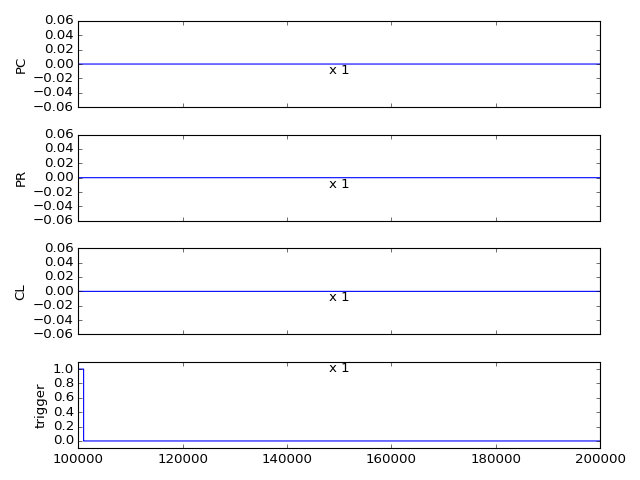

In [11]:
#  Empty pulses
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(cycle_time, at = Eject)
        
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 5      #500./64.
evol_times = np.linspace(0, 1000, 6)
send_ramp_pulses(evol_times = evol_times, cycle_time = 100e3, ramp_time = 20e3, Init = (0.015, -0.020), Eject = (0.00, 0.00))
all_ch.show(1)
time_label = 'dwell'

### Test AWG resolu

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.14 seconds


<IPython.core.display.Javascript object>


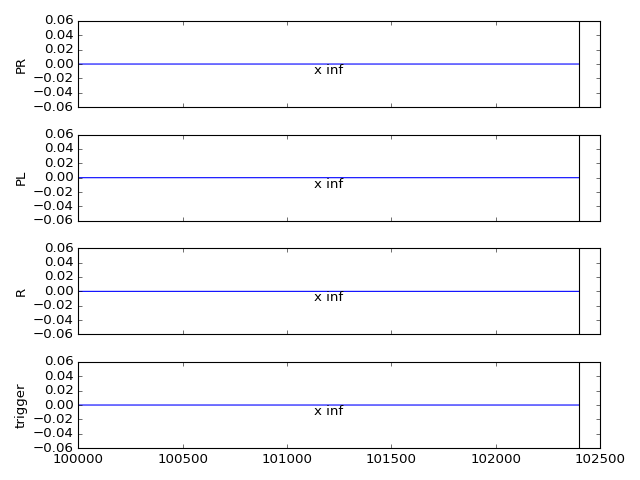

In [212]:
# for T+, Modified in 2018_06_128, with Function

# Mes = np.array([-0.8784, -0.3985])
# Met = np.array([-0.8858, -0.4004])#([-0.8841, -0.4025])
# Ej =  np.array([-0.8866, -0.3971])

# In = np.array([-0.7448, -0.2742])
def STplus_pulses(Evols,
                  evol_time = 100, #ns
                  cycle_time = 1000e+3,
                  ramp_time =  100,
                  Eject = (-0.001, 0.005),
                  Meas = (0.00,  0.00)):
#     if w.AWG.t_sample > evol_times[1]-evol_times[0]:
#         print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for Evol in Evols:
        duty_time = 5*ramp_time + 5*evol_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.15*cycle_time, at = Eject)
        detuning.dwell(0.3*cycle_time - duty_time, at = Meas)

        detuning.ramp(ramp_time, _from = Meas, to = Evol)
        detuning.dwell(evol_time, at = Evol)
        detuning.ramp(ramp_time, _from = Meas, to = Evol+0.0004)
        detuning.dwell(evol_time, at = Evol+0.0004)
        detuning.ramp(ramp_time, _from = Meas, to = Evol+0.0008)
        detuning.dwell(evol_time, at = Evol+0.0008)
        detuning.ramp(ramp_time, _from = Meas, to = Evol+0.0012)
        detuning.dwell(evol_time, at = Evol+0.0012)
        detuning.ramp(ramp_time, _from = Meas, to = Evol+0.0016)
        detuning.dwell(evol_time, at = Evol+0.0016)

        detuning.dwell(0.2*cycle_time, at = Meas)
        detuning.compensate(0.3*cycle_time)
        all_ch.section(go_to = 0 if np.array_equal(Evol, Evols[len(Evols)-1]) else None)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC()


evol_time =  50#ns
cycle_time = 200e+3
ramp_time =  100
#Init = 
# Cent_po = np.array([-1.0896,-0.5528])
# Me_po   = np.array([-1.0896,-0.5463])
# PR_array = np.linspace(0,0.016,41)
# Evol_vec = np.array([1, -1.3])*PR_array.reshape(41,1)  ## relative to center position cent_po

Evols = np.array([[0.01,0.010]])
Eject = np.array([-0.002, 0.0016])
#Evols = np.array([1, -1.0])*np.linspace(0,0.004,11).reshape(11,1)
#delta_P = np.linspace(0., 0.015, 51)
#Evols = Init                            #zip(delta_P, -delta_P)    #np.array(0.,1.,21)*0.015 # 15mV 
                
Meas = (0.00,  0.00)

w.AWG.t_sample = 1

STplus_pulses(evol_time = evol_time, cycle_time = 100e3, ramp_time = 200, Eject = Eject, Meas = Meas, Evols = Evols)

# if w.AWG.t_sample > evol_times[1]-evol_times[0]:
#     print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample



#w.AWG.t_sample = 0.5
#evol_times = np.arange(0, 40, 2)
#send_ST0_pulses(evol_times, ramp_time = 100,  Init = (0.01, -0.01), Evol = (0.050, -0.050))
# evol_times = np.linspace(0, 40, 41)
# send_ST0_pulses(evol_times = evol_times, cycle_time = 20e+3, ramp_time = 50, Eject = (0.0036, 0.0024),
#                 Meas = (0.00,  0.00), Init = (0.007, -0.007), Evol = (0.060, -0.060))
all_ch.show(1)
time_label = 'dwell'

In [222]:
w.AWG.jump(0)

In [191]:
Evols = np.array([[0.010,0.010], [0.0104,0.0104],[0.0108,0.0108]])
Evols.shape

(3L, 2L)

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.17 seconds


<IPython.core.display.Javascript object>


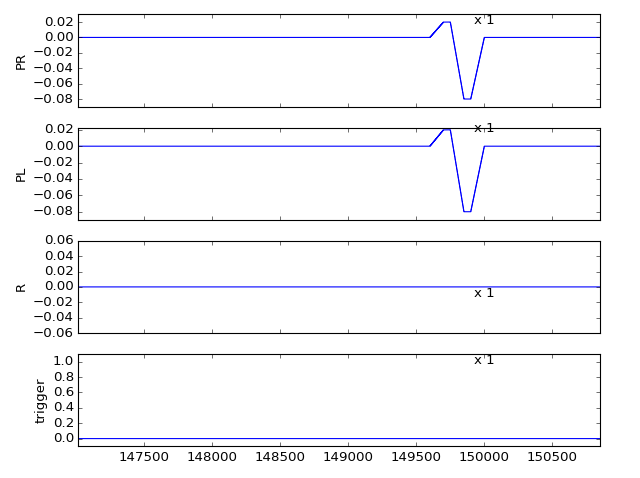

In [227]:
# for T+, Modified in 2018_06_128, with Function

# Mes = np.array([-0.8784, -0.3985])
# Met = np.array([-0.8858, -0.4004])#([-0.8841, -0.4025])
# Ej =  np.array([-0.8866, -0.3971])

# In = np.array([-0.7448, -0.2742])
def STplus_pulses(Evols,
                  evol_time = 100, #ns
                  cycle_time = 1000e+3,
                  ramp_time =  100,
                  Eject = (-0.001, 0.005),
                  low= (0.,0.),
                  Meas = (0.00,  0.00)):
#     if w.AWG.t_sample > evol_times[1]-evol_times[0]:
#         print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for Evol in Evols:
        duty_time = 3*ramp_time + 2*evol_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.15*cycle_time, at = Eject)
        detuning.dwell(0.3*cycle_time - duty_time, at = Meas)

        detuning.ramp(ramp_time, _from = Meas, to = Evol)
        detuning.dwell(evol_time, at = Evol)
        detuning.ramp(ramp_time, _from = Evol, to = low)
        detuning.dwell(evol_time, at = low)
        detuning.ramp(ramp_time, _from = low, to = Meas)

        detuning.dwell(0.2*cycle_time, at = Meas)
        detuning.compensate(0.3*cycle_time)
        all_ch.section(go_to = 0 if np.array_equal(Evol, Evols[len(Evols)-1]) else None)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC()


evol_time =  50#ns
cycle_time = 200e+3
ramp_time =  100
#Init = 
# Cent_po = np.array([-1.0896,-0.5528])
# Me_po   = np.array([-1.0896,-0.5463])
# PR_array = np.linspace(0,0.016,41)
# Evol_vec = np.array([1, -1.3])*PR_array.reshape(41,1)  ## relative to center position cent_po

Evols = np.array([[0.02,0.02],[0.02,0.02]])
low = np.array([-0.08,-0.08])
Eject = np.array([-0.002, 0.0016])
#Evols = np.array([1, -1.0])*np.linspace(0,0.004,11).reshape(11,1)
#delta_P = np.linspace(0., 0.015, 51)
#Evols = Init                            #zip(delta_P, -delta_P)    #np.array(0.,1.,21)*0.015 # 15mV 
                
Meas = (0.00,  0.00)

w.AWG.t_sample = 1

STplus_pulses(evol_time = evol_time, cycle_time = 100e3, ramp_time = 100, Eject = Eject, Meas = Meas, Evols = Evols, low = low)

# if w.AWG.t_sample > evol_times[1]-evol_times[0]:
#     print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample



#w.AWG.t_sample = 0.5
#evol_times = np.arange(0, 40, 2)
#send_ST0_pulses(evol_times, ramp_time = 100,  Init = (0.01, -0.01), Evol = (0.050, -0.050))
# evol_times = np.linspace(0, 40, 41)
# send_ST0_pulses(evol_times = evol_times, cycle_time = 20e+3, ramp_time = 50, Eject = (0.0036, 0.0024),
#                 Meas = (0.00,  0.00), Init = (0.007, -0.007), Evol = (0.060, -0.060))
all_ch.show(1)
time_label = 'dwell'
w.AWG.jump(0)

In [204]:
# for T+, Modified in 2018_06_128, with Function

# Mes = np.array([-0.8784, -0.3985])
# Met = np.array([-0.8858, -0.4004])#([-0.8841, -0.4025])
# Ej =  np.array([-0.8866, -0.3971])

# In = np.array([-0.7448, -0.2742])
def STplus_pulses(Evols,
                  evol_time = 100, #ns
                  cycle_time = 1000e+3,
                  ramp_time =  100,
                  Eject = (-0.001, 0.005),
                  low= (0.,0.),
                  Meas = (0.00,  0.00)):
#     if w.AWG.t_sample > evol_times[1]-evol_times[0]:
#         print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    detuning.refresh()
    for Evol in Evols:
        duty_time = 3*ramp_time + 2*evol_time

        #trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.15*cycle_time, at = Eject)
        detuning.dwell(0.3*cycle_time - duty_time, at = Meas)

        detuning.ramp(ramp_time, _from = Meas, to = Evol)
        detuning.dwell(evol_time, at = Evol)
        detuning.ramp(ramp_time, _from = Evol, to = low)
        detuning.dwell(evol_time, at = low)
        detuning.ramp(ramp_time, _from = low, to = Meas)

        detuning.dwell(0.2*cycle_time, at = Meas)
        detuning.compensate(0.3*cycle_time)
        detuning.section(wait = False,go_to = 0 if np.array_equal(Evol, Evols[len(Evols)-1]) else None)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    detuning.section(wait = False,repeat=np.inf)

    detuning.compose()
    detuning.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC()


evol_time =  50#ns
cycle_time = 200e+3
ramp_time =  100
#Init = 
# Cent_po = np.array([-1.0896,-0.5528])
# Me_po   = np.array([-1.0896,-0.5463])
# PR_array = np.linspace(0,0.016,41)
# Evol_vec = np.array([1, -1.3])*PR_array.reshape(41,1)  ## relative to center position cent_po

Evols = np.array([[0.0002,0.0002],[0.0002,0.0002]])*2
low = np.array([-0.0002,-0.0002])*2
Eject = np.array([-0.0004, 0.0004])
#Evols = np.array([1, -1.0])*np.linspace(0,0.004,11).reshape(11,1)
#delta_P = np.linspace(0., 0.015, 51)
#Evols = Init                            #zip(delta_P, -delta_P)    #np.array(0.,1.,21)*0.015 # 15mV 
                
Meas = (0.00,  0.00)

w.AWG.t_sample = 1.

STplus_pulses(evol_time = evol_time, cycle_time = 100e3, ramp_time = 100, Eject = Eject, Meas = Meas, Evols = Evols, low = low)

# if w.AWG.t_sample > evol_times[1]-evol_times[0]:
#     print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample



#w.AWG.t_sample = 0.5
#evol_times = np.arange(0, 40, 2)
#send_ST0_pulses(evol_times, ramp_time = 100,  Init = (0.01, -0.01), Evol = (0.050, -0.050))
# evol_times = np.linspace(0, 40, 41)
# send_ST0_pulses(evol_times = evol_times, cycle_time = 20e+3, ramp_time = 50, Eject = (0.0036, 0.0024),
#                 Meas = (0.00,  0.00), Init = (0.007, -0.007), Evol = (0.060, -0.060))
#all_ch.show(1)
time_label = 'dwell'
w.AWG.jump(0)

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.16 seconds


In [196]:
 np.array([1, -1.3])*np.ones(41).reshape(41,1)

array([[ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3],
       [ 1. , -1.3]])

### Step pulse for tunnleing

In [136]:
(w.PR.val, w.PL.val) = np.array([-0.2509, -0.8441]) + np.array([1.92,-1.0])*0.00  # np.array([1.0,-1.9])*0.00 # 
w.check()

'L = -0.46 V, PL = -0.8441 V, T = -0.6 V, PR = -0.2509 V, R = -0.85 V, C1 = -0.65 V, C2 = 0. V, SL = -1.4 V, SC = -0.658 V, SR = -0.83 V, rf(rf.frequency=207.500000, rf.power=14.500000), Vps=4.500000, AWG(), AWGMA(), Bext=-0.200000'

{'repeat': 1, 'end': 100400.0, 'name': 'seq0_001', 'repeat_0': 1, 'repeat_1': 1, 'start': 400.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': None}
{'repeat': 1, 'end': 200400.0, 'name': 'seq0_002', 'repeat_0': 1, 'repeat_1': 1, 'start': 100400.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': 1}
Loading the sequence into AWG (GPIB0::14::INSTR)
Waveforms generated in 0.17 and sent in 0.24
Waveforms generated in 0.17 and sent in 0.29
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 0.20 seconds


<IPython.core.display.Javascript object>


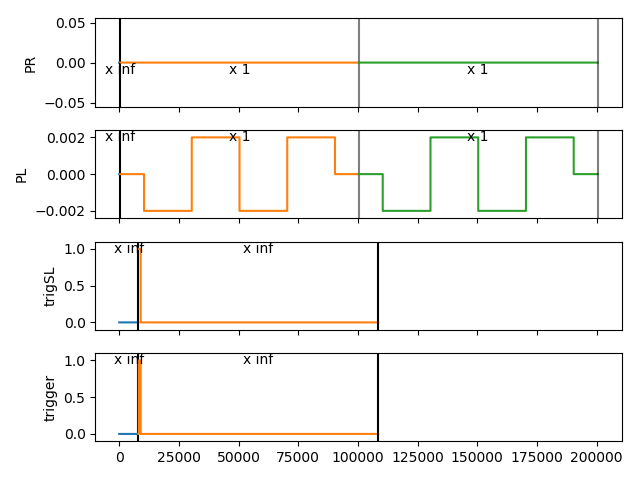

In [11]:
# Step Pulse PC or PR for Tunneling time
gate_test = ['PR','PL'][1]
def send_ramp_pulses(evol_times,
                     cycle_time = 100e3,
                     ramp_time  =  40e3,
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

        
    #AWGMA
    triggers.refresh()
    triggers.dwell(w.AWGMA.t_sample*800, at=(0.,0.)) # w.AWGMA.t_sample*800
    triggers.section(repeat=np.inf)
    
    t_delay =  210 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  160 + 128 * w.AWG.t_sample
    triggers.dwell(t_delay,      at = (0.,1.))
    triggers.dwell(800, at = (1., 1.))
    triggers.dwell(cycle_time - t_delay - 800. + (840 * w.AWG.t_sample + 184.), at =(0., 0.)) #  800. , 800 + (840 * w.AWG.t_sample + 168.) -8. 
    triggers.section(repeat=np.inf)

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)    
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time
        
        if [True,False][0]:
            detuning.dwell(0.1*cycle_time, at = Meas)
            detuning.dwell(0.2*cycle_time, at = Eject)
            detuning.dwell(0.2*cycle_time, at = Init)
            detuning.dwell(0.2*cycle_time, at = Eject)
            detuning.dwell(0.2*cycle_time, at = Init)
            detuning.dwell(0.1*cycle_time, at = Meas)
        else:
            detuning.dwell(0.1*cycle_time, at = Meas)
            detuning.dwell(0.4*cycle_time, at = Eject)
            detuning.dwell(0.4*cycle_time, at = Init)
            detuning.dwell(0.1*cycle_time, at = Meas)

        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)
#        all_ch.sync(go_to = 1, )#None if evol_time < max(evol_times) else 1)
        print w.AWG.ch1.seq.data[-1]    

    triggers.compose()
    triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations

w.AWGMA.t_sample = 10. #500./64. #5.
w.AWG.t_sample = 0.4  #500./64. #5.
evol_times = np.linspace(160, 400, 2)

cycle_time = 100e3

Eject = (-0.002, 0.00) if gate_test == 'PR' else (0.0, -0.002)
Init  = (0.002, 0.00) if gate_test == 'PR' else (0.0, 0.002)
# Eject = (-0.0025, 0.00) if gate_test == 'PR' else (0.0, -0.0025)
# Init  = (0.0025, 0.00) if gate_test == 'PR' else (0.0, 0.0025)
# Meas = (-0.005, 0.002) if gate_test == 'PR' else (0.0, -0.0025)
# Init = (0.005, -0.002) if gate_test == 'PR' else (0.0, 0.0025)
send_ramp_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = 200, Init = Init, Meas= (0., 0.), Eject = Eject)
all_ch.show()
time_label = 'dwell'

{'repeat': 1, 'end': 400800.0, 'name': 'seq0_001', 'repeat_0': 1, 'repeat_1': 1, 'start': 800.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': None}
{'repeat': 1, 'end': 800800.0, 'name': 'seq0_002', 'repeat_0': 1, 'repeat_1': 1, 'start': 400800.0, 'seq?': False, 'target': 0, 'wait': True, 'go_to': 1}
Loading the sequence into AWG (GPIB0::14::INSTR)
Waveforms generated in 0.50 and sent in 0.34
Waveforms generated in 0.50 and sent in 0.32
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 0.26 seconds


<IPython.core.display.Javascript object>


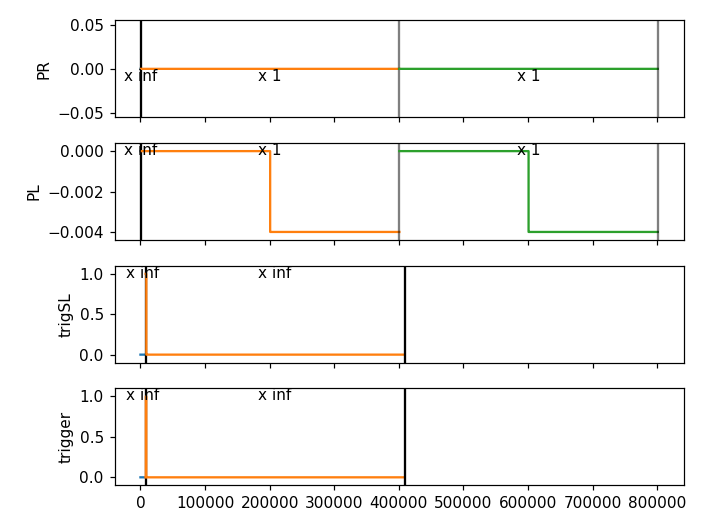

In [30]:
# two AWGs, modified, only two stage with (0.0, 0.0) on one side

# Step Pulse PC or PR for Tunneling time
gate_test = ['PR','PL'][1]
def send_ramp_pulses(evol_times,
                     cycle_time = 100e3,
                     ramp_time  =  40e3,
                     Init  = ( 0.00, -0.00),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

        
    #AWGMA
    triggers.refresh()
    triggers.dwell(w.AWGMA.t_sample*800, at=(0.,0.)) # w.AWGMA.t_sample*800
    triggers.section(repeat=np.inf)
    
    t_delay =  220 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  160 + 128 * w.AWG.t_sample
    triggers.dwell(t_delay,      at = (0.,1.))
    triggers.dwell(800, at = (1., 1.))
    triggers.dwell(cycle_time - t_delay - 800. + (840 * w.AWG.t_sample + 170.), at =(0., 0.)) #  800. , 800 + (840 * w.AWG.t_sample + 168.) -8. 
    triggers.section(repeat=np.inf)

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)    
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time
        
        if [True,False][1]:
            detuning.dwell(0.1*cycle_time, at = Meas)
            detuning.dwell(0.2*cycle_time, at = Eject)
            detuning.dwell(0.2*cycle_time, at = Init)
            detuning.dwell(0.2*cycle_time, at = Eject)
            detuning.dwell(0.2*cycle_time, at = Init)
            detuning.dwell(0.1*cycle_time, at = Meas)
        else:
            detuning.dwell(0.5*cycle_time, at = Meas)
            detuning.dwell(0.5*cycle_time, at = Eject)

        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)
#        all_ch.sync(go_to = 1, )#None if evol_time < max(evol_times) else 1)
        print w.AWG.ch1.seq.data[-1]    

    triggers.compose()
    triggers.load_seq()
    detuning.compose()
    detuning.load_seq()    
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    w.AWGMA.jump(0)
    w.AWGMA._OPC() # wait for the AWG to complete all pending operations

w.AWGMA.t_sample = 10. #500./64. #5.
w.AWG.t_sample = 0.8  #500./64. #5.
evol_times = np.linspace(160, 400, 2)

cycle_time = 400e3

Meas = (0.0, 0.0)
Eject = (-0.004, 0.00) if gate_test == 'PR' else (0.0, -0.004)
#Init = (0.004, 0.00) if gate_test == 'PR' else (0.0, 0.004)
# Meas = (-0.005, 0.002) if gate_test == 'PR' else (0.0, -0.0025)
# Init = (0.005, -0.002) if gate_test == 'PR' else (0.0, 0.0025)
send_ramp_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = 200, Init = Init, Meas= (0., 0.), Eject = Eject)
all_ch.show()
time_label = 'dwell'

You may want to increase the AWG sampling time from 1.000000e+00 ns
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.10 seconds


<IPython.core.display.Javascript object>


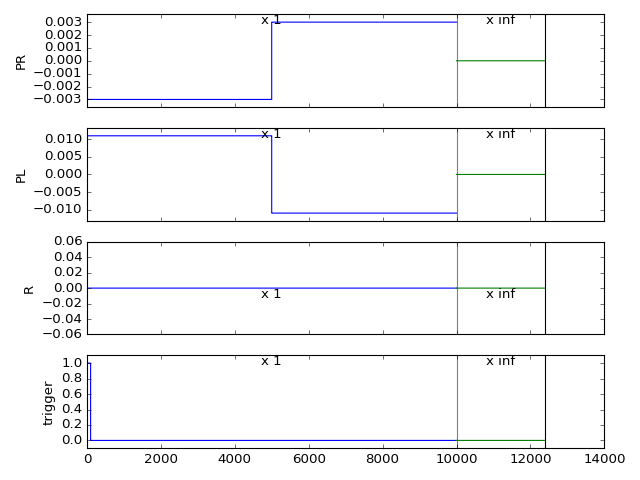

In [219]:
# Step Pulse PC or PR for Tunneling time, interdot detuning direction
gate_test = ['PR','PL'][0]
def send_ramp_pulses(evol_times,
                     cycle_time = 100e3,
                     ramp_time  =  40e3,
                     Init  = ( 0.01, -0.01),
                     #Tran = (0.0, 0.00),
                     Meas  = (0.00,  0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        trigger.excurse(100, to = 1.)
        #detuning.dwell(0.1*cycle_time, at = Meas)
        
#        detuning.dwell(0.2*cycle_time, at = Meas)
        
        detuning.dwell(0.5*cycle_time, at = Meas)
        detuning.dwell(0.5*cycle_time, at = Init)

        #detuning.dwell(0.1*cycle_time, at = Meas)

        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 1
evol_times = np.linspace(0, 100, 1)
cycle_time = 10e3

# Meas = (-0.0025, 0.00) if gate_test == 'PR' else (0.0, -0.0025)
# Init = (0.0025, 0.00) if gate_test == 'PR' else (0.0, 0.0025)
Meas = (-0.003, 0.011) #if gate_test == 'PR' else (0.0, -0.0025)
Init = (0.003, -0.011) # if gate_test == 'PR' else (0.0, 0.0025)
#Tran = (0.0062, -0.0296)

send_ramp_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = 200, Init = Init, Meas= Meas)
all_ch.show()
time_label = 'dwell'

<IPython.core.display.Javascript object>


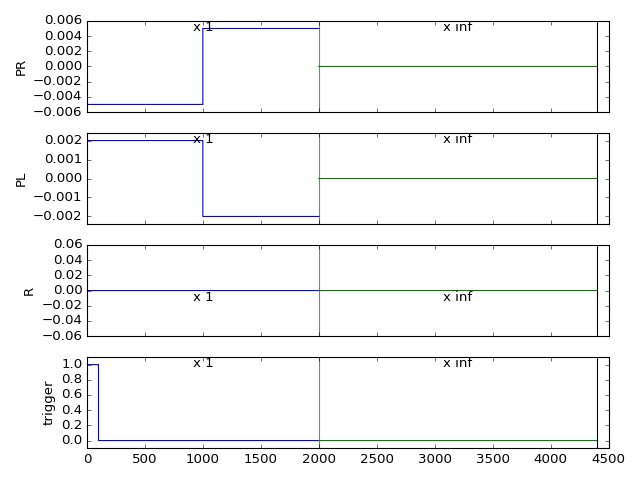

In [176]:
all_ch.show()

In [30]:
# Set the Barrier(Marker Ch) high & Low Values ------- Uncalibrated
def set_CL_high(value):
    ch_num, marker_num = 1, 1
    if value <-1.4 or value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, value)
    print cmd
    w.AWG.safe_write(cmd)
def set_CL_low(value):
    ch_num, marker_num = 1, 1
    if value <-1.4 or value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, value)
    print cmd2
    w.AWG.safe_write(cmd2)   
    
set_CL_high(0.25)
set_CL_low(-0.25)

SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.250000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.250000


In [30]:
# Set the Barrier(Marker Ch) high & Low Values ------------ Calibrated , (set actual value on device)
def set_barrier_high(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, dev_value/0.019)
    print cmd
    w.AWG.safe_write(cmd)
def set_barrier_low(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, dev_value/0.019)
    print cmd2
    w.AWG.safe_write(cmd2)   
    
set_barrier_high(0.01)
set_barrier_low(0.0)

SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.250000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.250000


SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.500000
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
Loading the sequence into AWG (TCPIP::192.168.1.11)  in 0.31 seconds


<IPython.core.display.Javascript object>


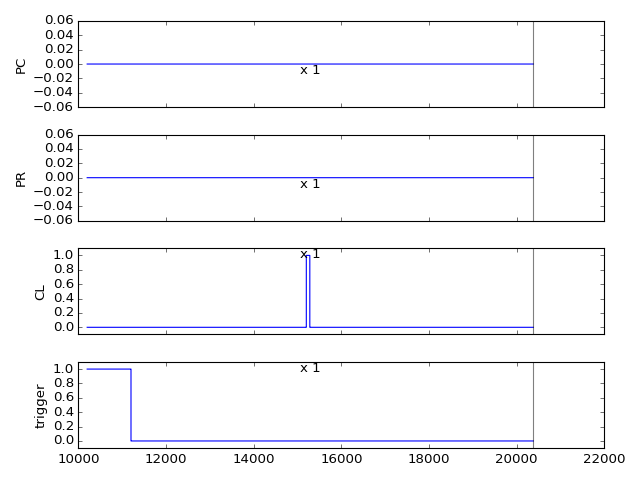

In [74]:
# Barrier pulse( with Marker channel11) test --------------------------01 with evol_time array
def set_CL_high(value):
    ch_num, marker_num = 1, 1
    if value <-1.4 or value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, value)
    print cmd
    w.AWG.safe_write(cmd)
def set_CL_low(value):
    ch_num, marker_num = 1, 1
    if value <-1.4 or value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, value)
    print cmd2
    w.AWG.safe_write(cmd2)   
    
set_CL_high(0.5)
set_CL_low(0.0)

def send_barrier_pulses(evol_times,
                        cycle_time = 200e3,
                        Close  = 0.00,
                        Open  = 0.10 ):    
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        #duty_time = ramp_time + evol_time

        trigger.excurse(1000, to = 1.)
        barrier.dwell(0.5*cycle_time - evol_time + 0.01*cycle_time, at = Close)
        #barrier.dwell(max(0, evol_time - 2*0.01*cycle_time), at = Open)
        barrier.dwell((evol_time - 2*0.001*cycle_time) if evol_time > 0 else 0., at = Open)
        barrier.dwell(0.01*cycle_time + 0.5*cycle_time, at = Close)
        
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 2
evol_times = np.linspace(0, 1000, 11)
send_barrier_pulses(evol_times = evol_times, cycle_time = 10e3, Close = 0.00, Open =  1.00)
all_ch.show(1)
time_label = 'dwell'
w.AWG.jump(0)

### Rectangle pulse

SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.500000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.500000
You may want to increase the AWG sampling time from 2.000000e+00 ns
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.57 seconds


<IPython.core.display.Javascript object>


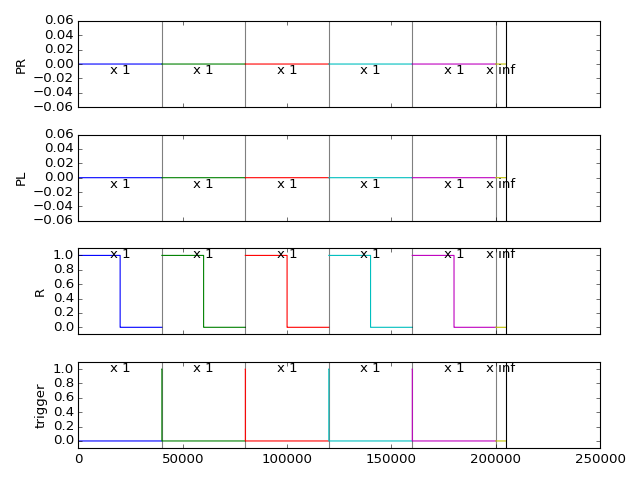

In [1509]:
# Barrier pulse( with Marker channel11) test ----------------02 with periodic Rectangle shape

def set_CL_high(value):
    ch_num, marker_num = 1, 1
    if value <-1.4 or value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, value)
    print cmd
    w.AWG.safe_write(cmd)
def set_CL_low(value):
    ch_num, marker_num = 1, 1
    if value <-1.4 or value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, value)
    print cmd2
    w.AWG.safe_write(cmd2)   
    
set_CL_high(0.5)
set_CL_low(-0.5)

def send_barrier_pulses(evol_times,
                        cycle_time = 200e3,
                        width = 0.10,
                        Close  = 0.00,
                        Open  = 0.10 ):    
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    amp = np.linspace(0.0, 0.7, 5)
    rep = np.linspace(1, 3, 3)
    for v in amp:
        #duty_time = ramp_time + evol_time

        trigger.excurse(10, to = 1.)
#        for r in rep:
        barrier.dwell(0.5*cycle_time, at = Open)
        barrier.dwell(0.5*cycle_time, at = Close)
#         barrier.dwell(0.5*cycle_time - width, at = Close)
#         barrier.dwell(width, at = Open)
#         barrier.dwell(0.5*cycle_time, at = Close)
        
        all_ch.section(go_to = None if v < max(amp) else 0)

    barrier.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 2
evol_times = np.linspace(0, 10, 1)
send_barrier_pulses(evol_times = evol_times, cycle_time = 40e3, width = 0.1, Close = 0.00, Open =  1.0)
all_ch.show()
time_label = 'dwell'
#w.AWG.jump(0)

<IPython.core.display.Javascript object>


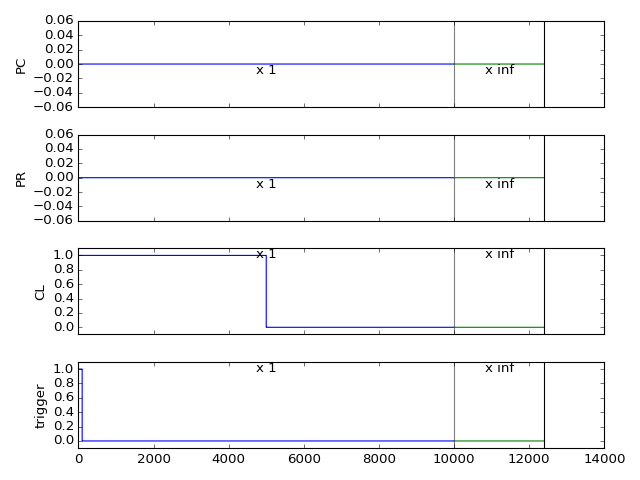

In [247]:
all_ch.show()

In [256]:
w.AWG.jump(-1)

SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.300000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.300000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.320000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.320000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.340000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.340000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.360000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.360000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.380000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.380000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.400000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.400000


<IPython.core.display.Javascript object>


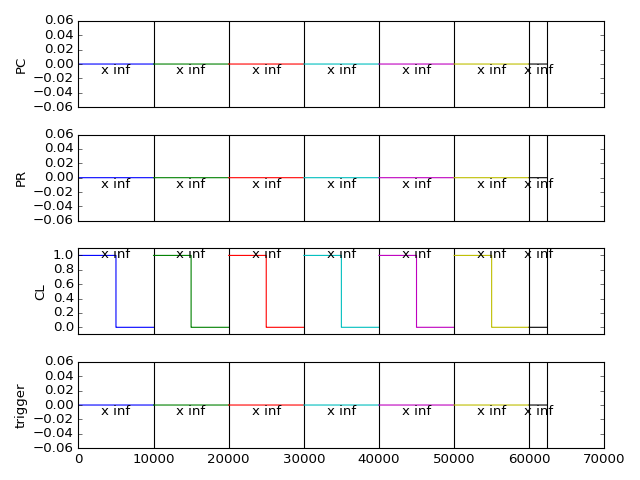

Loading the sequence into AWG (TCPIP::192.168.1.11)  in 0.27 seconds


In [73]:
# test Marker sending pulses with series of Amplitude--------03 try to do "set_high/low" in loop
all_ch.refresh()
#if [False, True][1]:
def set_CL_high(value):
    ch_num, marker_num = 1, 1
    if value <-1.4 or value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, value)
    print cmd
    w.AWG.safe_write(cmd)
def set_CL_low(value):
    ch_num, marker_num = 1, 1
    if value <-1.4 or value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, value)
    print cmd2
    w.AWG.safe_write(cmd2)
    
amp_arr = np.linspace(0.3, 0.4, 6)
cycle_length = 10000
#
#    all_ch.refresh()
for v in (amp_arr):
    barrier.dwell(cycle_length*0.5, at = 1.0)
    barrier.dwell(cycle_length*0.5, at = 0.0)
    all_ch.section(repeat=np.inf)
    set_CL_high(v)
    set_CL_low(-v)
barrier.dwell(2400, at=0.)
all_ch.section(repeat=np.inf)
all_ch.compose()

all_ch.show()
all_ch.load_seq()

#w.AWG.jump(-1)
#w.AWG.jump(0)

Loading the sequence into AWG (TCPIP::192.168.1.11)  in 0.66 seconds


<IPython.core.display.Javascript object>


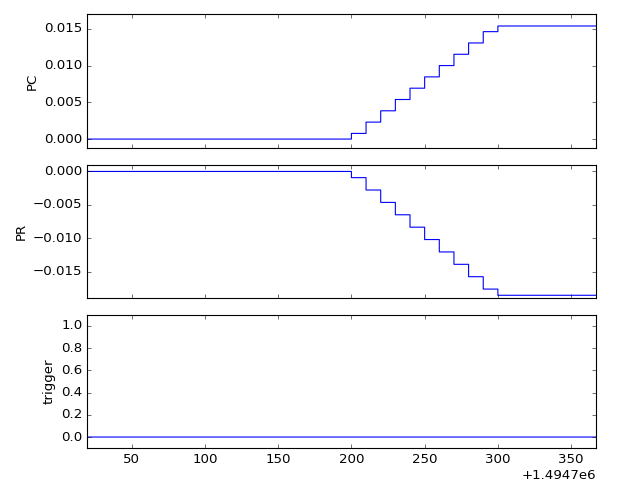

In [215]:
# Barrier pulse( with Marker channel11) + detuning pulse test
def send_all_pulses(evol_times,
                     cycle_time = 200e3,
                     Eject = (0.0, 0.0),
                     Meas =(0.0, 0.0),
                     Init = (0.0, 0.0),
                     Close = (0.0, 0.0),
                     Open  = (0.00,  0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.2*cycle_time, at = Eject)
        detuning.dwell(0.3*cycle_time - duty_time, at = Meas)
        

        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)

        detuning.dwell(0.4*cycle_time - ramp_time, at = Meas)
        detuning.dwell(ramp_time, at = [-0.5*i for i in Init])
        detuning.dwell(0.1*cycle_time, at = [-0.5*e for e in Eject])
        
        
        barrier.dwell(0.5*cycle_time - duty_time + 
        
        
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 4
evol_times = np.linspace(0, 200000, 41)
send_ramp_pulses(evol_times = evol_times, cycle_time = 1000e3, ramp_time = 100, Init = ( 0.0154, -0.0185), Eject = (-0.0099, 0.0018))
all_ch.show(1)
time_label = 'dwell'

Loading the sequence into AWG (TCPIP::192.168.1.11)  in 0.16 seconds


<IPython.core.display.Javascript object>


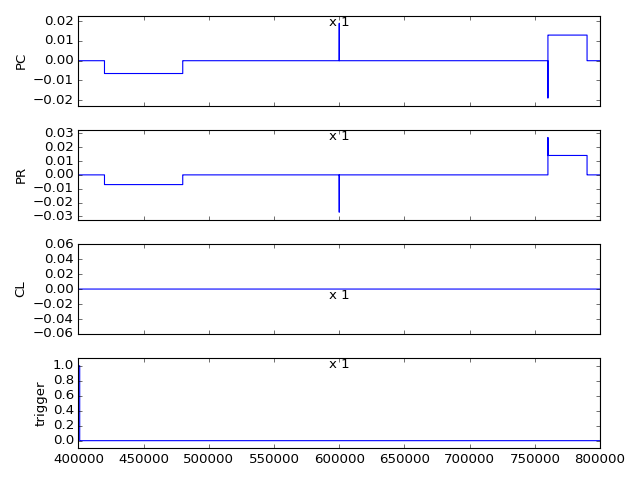

In [116]:
# One-step initialization for dynamics at Blockade regime
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.15*cycle_time, at = Eject)
        detuning.dwell(0.3*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)

        detuning.dwell(0.4*cycle_time - evol_time, at = Meas)
        detuning.dwell(evol_time, at = [-1.0*i for i in Init])       # why use a for loop?
#       detuning.dwell(0.1*cycle_time, at = Meas)
        detuning.dwell(0.075*cycle_time, at = [-2.0*e for e in Eject])  # why 0.5 Eject
        detuning.dwell(0.025*cycle_time, at = Meas)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations 

w.AWG.t_sample = 1
evol_times = np.linspace(0, 2, 2)
send_ramp_pulses(evol_times = evol_times, cycle_time = 400e3, ramp_time = 50, Meas = (0.00,  0.00), Init = (0.019, -0.027), Eject = (-0.0065, -0.007))
all_ch.show(1)
time_label = 'dwell'

### RAP

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 3.46 seconds


<IPython.core.display.Javascript object>


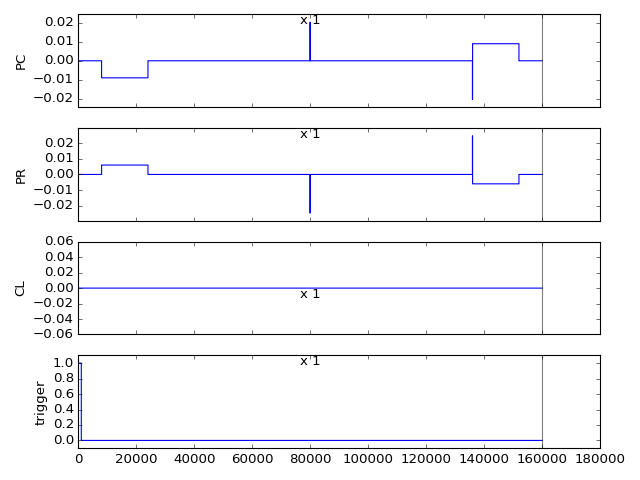

In [54]:
# One-step initialization for dynamics at Blockade regime   --------------- RAP
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     back_time  = 10,
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time + back_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.10*cycle_time, at = Eject)
        detuning.dwell(0.35*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
        detuning.ramp(back_time, _from = Init, to = Meas)
        
        detuning.dwell(0.35*cycle_time - 1.0*ramp_time -evol_time, at = Meas)
        detuning.dwell(1.0*ramp_time + evol_time, at = [-1.0*i for i in Init])       # why use a for loop?
#       detuning.dwell(0.1*cycle_time, at = Meas)
        detuning.dwell(0.10*cycle_time, at = [-1.0*e for e in Eject])  # why 0.5 Eject
        detuning.dwell(0.05*cycle_time, at = Meas)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations 

w.AWG.t_sample = 0.4
evol_times = np.linspace(0.4, 20e3, 51)
send_ramp_pulses(evol_times = evol_times, cycle_time =160e3, ramp_time = 50, back_time = 50,
                 Meas = (0.00,  0.00), Init = (0.0200, -0.0245), Eject = (-0.0075, 0.004))
all_ch.show(0)
time_label = 'dwell'

### RAP with d.compen

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 3.43 seconds


<IPython.core.display.Javascript object>


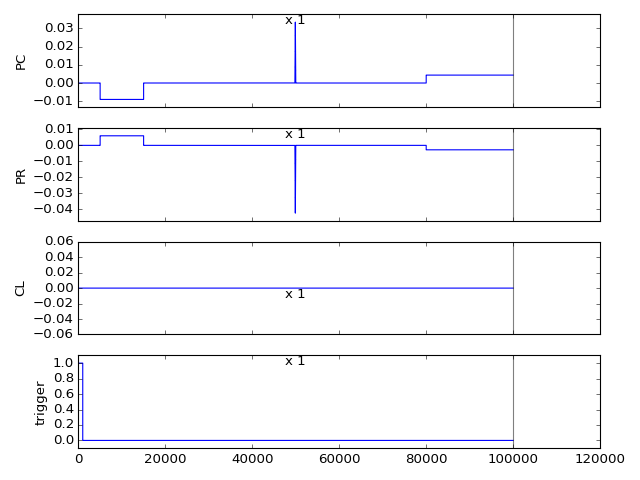

In [187]:
# One-step initialization for dynamics at Blockade regime   --------------- RAP with detuning.compensate
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     back_time  = 10,
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time + back_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.10*cycle_time, at = Eject)
        detuning.dwell(0.35*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(evol_time, at = Init)
        detuning.ramp(back_time, _from = Init, to = Meas)
        
        detuning.dwell(0.30*cycle_time, at = Meas)
        detuning.compensate(0.2*cycle_time)       # why use a for loop?
#        detuning.dwell(0.1*cycle_time, at = Meas)
#        detuning.dwell(0.10*cycle_time, at = [-1.0*e for e in Eject])  # why 0.5 Eject
#        detuning.dwell(0.05*cycle_time, at = Meas)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations 

w.AWG.t_sample = 0.2
evol_times = np.linspace(0., 20e3, 51)
send_ramp_pulses(evol_times = evol_times, cycle_time =100e3, ramp_time = 100, back_time = 100,
                 Meas = (0.00,  0.00), Init = (0.0334, -0.0425), Eject = (-0.009, 0.006))
all_ch.show(0)
time_label = 'dwell'

In [302]:
Me_po - Cent_po

array([ 0.0039, -0.0029])

### One stage to |S>

Waveforms generated in 0.98 and sent in 1.85
Waveforms generated in 1.25 and sent in 1.58
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 1.58 seconds


<IPython.core.display.Javascript object>


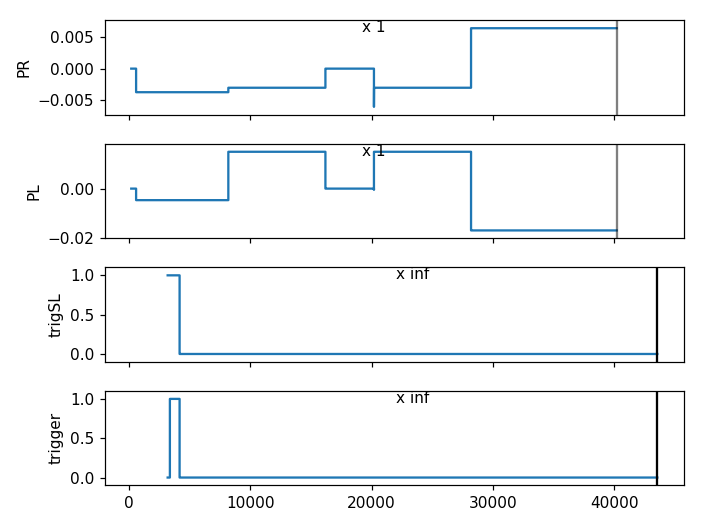

In [222]:
# Two-stage initialization for dynamics at Blockade regime   --------------- Adibatically to |1l >, np
def onestage_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Medi  = (0.00, 0.00),                   
                     Init  = (0.01, -0.01),
                     Read = (0.0, 0.0),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)  
    
    for evol_time in evol_times:
        duty_time = 2.0*ramp_time + evol_time

        #trigger.excurse(1000, to = 1.)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.19*cycle_time, at = Eject)
        #detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.20*cycle_time, at = Read)
        detuning.dwell(0.10*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)     

        detuning.dwell(evol_time, at = Init)

        detuning.ramp(ramp_time, _from = Init, to = Read)
        
#        detuning.dwell(0.30*cycle_time - 1.0*(evol_time + adia_time), at = Meas)
        detuning.dwell(0.2*cycle_time, at = Read)
        detuning.compensate(0.3*cycle_time)
        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)

    detuning.compose()
    detuning.load_seq()  
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations 

Cent_po = np.array([-0.6071, -0.8733]) # 1.1558
Me_po   = Cent_po + np.array([0.0050, -0.0030]) #  np.array([-0.1830,-0.8981])
Re_po   = Cent_po + np.array([0.002, 0.012])   # + np.array([0.0072, 0.0035] ; np.array([0.0080, 0.0025])
Init_vec = np.array([-0.004,  0.002])  + np.array([0.000, -0.006])  # np.array([1., -1.00])*(0.005)  # 0.0027, -0.004

Init = Cent_po - Me_po + Init_vec
Eject = Cent_po - Me_po+ np.array([0.0013, -0.0077])   # np.array([0.008, -0.016]),  np.array([0.025, -0.023])  #Ej - Me
#Medi = Cent_po - Me_po + np.array([0.0032, -0.0040])           #np.array([0.0018, -0.0038])#Med - Me
Meas = (0.00,  0.00)
Read = Re_po - Me_po

w.AWGMA.t_sample = 8.
w.AWG.t_sample = 0.2

evol_times = np.linspace(0., 8., 21) # np.array([400., 480.]) 
cycle_time = 40e3

#AWGMA
# triggers.refresh()
# triggers.dwell(w.AWGMA.t_sample*400, at=(0.,0.)) # w.AWGMA.t_sample*800
# triggers.section(repeat=np.inf)

# t_delay =  210 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  160 + 128 * w.AWG.t_sample
# triggers.dwell(t_delay,      at = (0.,1.))
# triggers.dwell(800, at = (1., 1.))
# triggers.dwell(cycle_time - 800 - t_delay + (840 * w.AWG.t_sample + 184.), at =(0., 0.)) #  +176.
# triggers.section(repeat=np.inf)

# triggers.compose()
# triggers.load_seq()
# w.AWGMA.jump(0)
# w.AWGMA._OPC()

onestage_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = 0.2, adia_time = 200., 
                 Meas = (0.00, 0.00), Medi = (0., 0.), Init = Init, Read = Read, Eject = Eject)
all_ch.show(1)
time_label = 'dwell'

Loading the sequence into AWG (GPIB0::14::INSTR)
You may want to increase the AWG sampling time from 1.200000e-01 ns
Waveforms generated in 5.40 and sent in 3.92
Waveforms generated in 5.55 and sent in 3.77
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.20 seconds


<IPython.core.display.Javascript object>


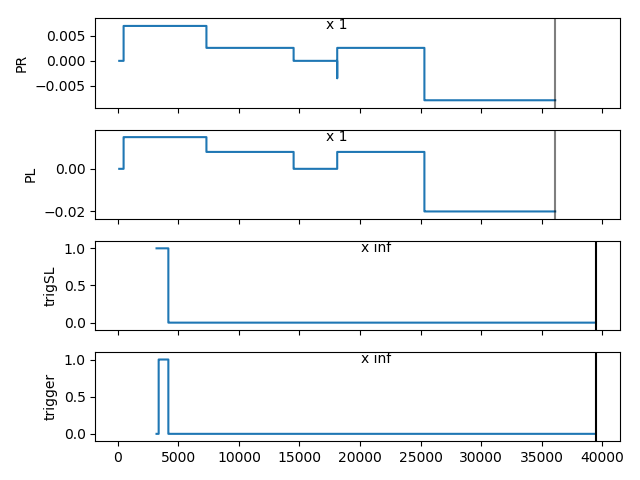

In [1333]:
# Two-stage initialization for dynamics at Blockade regime   -------  t_sample = 0.09 ns, 11.111 GHz
def onestage_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Medi  = (0.00, 0.00),                   
                     Init  = (0.01, -0.01),
                     Read = (0.0, 0.0),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)  
    
    for evol_time in evol_times:
        duty_time = 2.0*ramp_time + evol_time

        #trigger.excurse(1000, to = 1.)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.19*cycle_time, at = Eject)
        #detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.20*cycle_time, at = Read)
        detuning.dwell(0.10*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)     

        detuning.dwell(evol_time, at = Init)

        detuning.ramp(ramp_time, _from = Init, to = Read)
        
#        detuning.dwell(0.30*cycle_time - 1.0*(evol_time + adia_time), at = Meas)
        detuning.dwell(0.2*cycle_time, at = Read)
        detuning.compensate(0.3*cycle_time)
        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)

    detuning.compose()
    detuning.load_seq()  
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations 

Cent_po = np.array([-0.2668, -1.1454]) # 1.1558
Me_po   = Cent_po + np.array([0.0050, -0.0050]) #  np.array([-0.1830,-0.8981])
Re_po   = Cent_po + np.array([0.0076, 0.0030])   # + np.array([0.0072, 0.0035]  [0.0080, 0.0025]
Init_vec = np.array([-0.0020,  0.0020])  + np.array([-0.000, -0.00])  # np.array([1., -1.00])*(0.005)  # 0.0027, -0.004

Init = Cent_po - Me_po + Init_vec
Eject = Cent_po + np.array([0.012, 0.010]) - Me_po  #np.array([-0.0054, -0.0032])  #Ej - Me
#Medi = Cent_po - Me_po + np.array([0.0032, -0.0040])           #np.array([0.0018, -0.0038])#Med - Me
Meas = (0.00,  0.00)
Read = Re_po - Me_po

w.AWGMA.t_sample = 8.
w.AWG.t_sample = 0.12
t0 = w.AWG.t_sample

evol_times = np.linspace(0., t0 * 40, 41) # np.array([400., 480.]) 
cycle_time = 36e3

#AWGMA
triggers.refresh()
triggers.dwell(w.AWGMA.t_sample*400, at=(0.,0.)) # w.AWGMA.t_sample*800
triggers.section(repeat=np.inf)

t_delay =  210 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  160 + 128 * w.AWG.t_sample
triggers.dwell(t_delay,      at = (0.,1.))
triggers.dwell(800, at = (1., 1.))
triggers.dwell(cycle_time - 800 - t_delay + (840 * w.AWG.t_sample + 184.), at =(0., 0.)) #  0.1 @ +200.
triggers.section(repeat=np.inf)

triggers.compose()
triggers.load_seq()
w.AWGMA.jump(0)
w.AWGMA._OPC()

onestage_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = t0, adia_time = 200., 
                 Meas = (0.00, 0.00), Medi = (0., 0.), Init = Init, Read = Read, Eject = Eject)
all_ch.show(1)
time_label = 'dwell'

In [9]:
print w.AWG.errors

[u'1']


### two stage updown new

In [692]:
(w.PR, w.PL) = np.array([-1.1143,-0.5363])

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.73 seconds


<IPython.core.display.Javascript object>


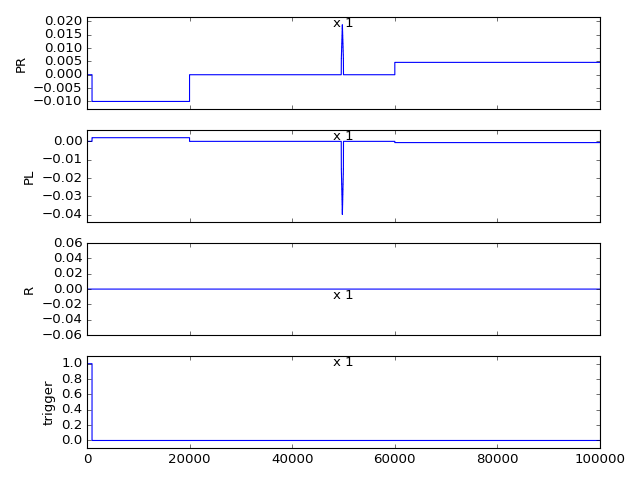

In [59]:
# Two-stage initialization for dynamics at Blockade regime   --------------- Adibatically to |1l >, np
def twostage_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Medi  = (0.00, 0.00),
                     Meta  = (0.00, 0.00),                     
                     Init  = (0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time + 2*adia_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.19*cycle_time, at = Eject)
        detuning.dwell(0.30*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(adia_time, _from = Medi, to = Init)
        detuning.dwell(evol_time, at = Init)
        detuning.ramp(adia_time, _from = Init, to = Medi)
        detuning.ramp(ramp_time, _from = Medi, to = Meas)
        
#        detuning.dwell(0.30*cycle_time - 1.0*(evol_time + adia_time), at = Meas)
        detuning.dwell(0.1*cycle_time, at = Meas)
        detuning.compensate(0.4*cycle_time) 
#        detuning.dwell(1.0*(evol_time + adia_time), at = [-1.0*i for i in Init])
##       detuning.dwell(evol_time, at = [-1.0*i for i in Init])       # why use a for loop?
##       detuning.dwell(0.1*cycle_time, at = Meas)
#        detuning.dwell(0.10*cycle_time, at = [-1.0*e for e in Eject])  # why 0.5 Eject
#        detuning.dwell(0.05*cycle_time, at = Meas)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
#     w.AWG._OPC()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations 

Cent_po = np.array([-0.9580,-0.5088])
Me_po   = np.array([-0.9608,-0.4978]) 
Init_vec = np.array([0.006, -0.010]) + np.array([1., -1.90])*(0.010)
#Init_vec = np.array([0.0108, -0.0248])

Init = Cent_po - Me_po + Init_vec
Eject = np.array([-0.010, 0.002]) #Ej - Me
Medi = Cent_po - Me_po + np.array([0.0032, -0.0040])           #np.array([0.0018, -0.0038])#Med - Me
Meas = (0.00,  0.00)

w.AWG.t_sample = 2
evol_times = np.linspace(0., 1000, 21)

twostage_pulses(evol_times = evol_times, cycle_time = 100e3, ramp_time = 20, adia_time = 200, 
                 Meas = (0.00, 0.00), Medi = Medi, Init = Init, Eject = Eject)
all_ch.show(0)
time_label = 'dwell'

In [106]:
Medi

array([ 0.0007, -0.0044])

In [109]:
w.AWG.jump(-1)

In [358]:
#Medi,Init
Cent_po + Init_vec

array([-0.9343, -0.366 ])

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 2.98 seconds


<IPython.core.display.Javascript object>


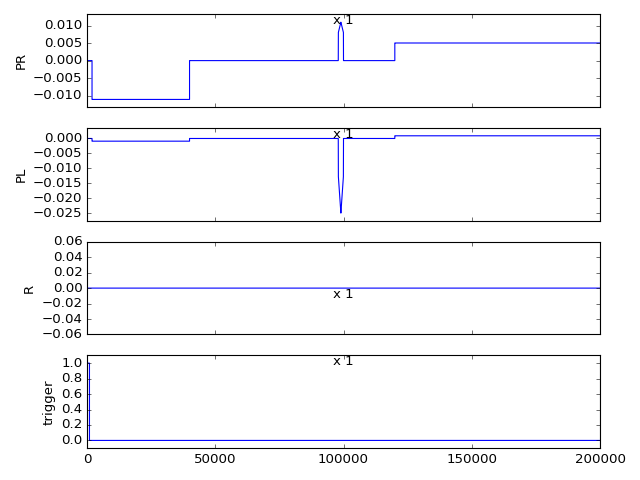

In [88]:
# Two-stage initialization for dynamics at Blockade regime   --------------- Adibatically to |1l >, readout with Meta
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Medi  = (0.00, 0.00),
                     Meta  = (0.00, 0.00),                     
                     Init  = (0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time + 2*adia_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.19*cycle_time, at = Eject)
        detuning.dwell(0.30*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(adia_time, _from = Medi, to = Init)
        detuning.dwell(evol_time, at = Init)
        detuning.ramp(adia_time, _from = Init, to = Medi)
        detuning.ramp(ramp_time, _from = Medi, to = Meta)
        
#        detuning.dwell(0.30*cycle_time - 1.0*(evol_time + adia_time), at = Meas)
        detuning.dwell(0.10*cycle_time, at = Meta)
        detuning.compensate(0.40*cycle_time) 
#        detuning.dwell(1.0*(evol_time + adia_time), at = [-1.0*i for i in Init])
##       detuning.dwell(evol_time, at = [-1.0*i for i in Init])       # why use a for loop?
##       detuning.dwell(0.1*cycle_time, at = Meas)
#        detuning.dwell(0.10*cycle_time, at = [-1.0*e for e in Eject])  # why 0.5 Eject
#        detuning.dwell(0.05*cycle_time, at = Meas)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
#     w.AWG._OPC()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations 

Me = np.array([-0.9464, -0.4453])
Ej = np.array([-0.9575, -0.4462])
Met = np.array([-0.9515, -0.4524])
Med = np.array([-0.9384, -0.4578])

#evol_times = np.linspace(0, 100, 51) #ns
cycle_time = 200e+3
ramp_time =  20
#Init = 
Init = (0.011, -0.025)
Eject = Ej - Me
Meta = Met - Me
Medi = Med - Me
Meas = (0.00,  0.00)
w.AWG.t_sample = 1
evol_times = np.linspace(0.0, 20e3 , 41)
send_ramp_pulses(evol_times = evol_times, cycle_time = 200e3, ramp_time = 20, adia_time = 1000, 
                 Meas = (0.00, 0.00), Medi = Medi, Init = Init, Eject = Eject)
all_ch.show(0)
time_label = 'dwell'

Loading the sequence into AWG (TCPIP::192.168.1.2)  in 4.99 seconds


<IPython.core.display.Javascript object>


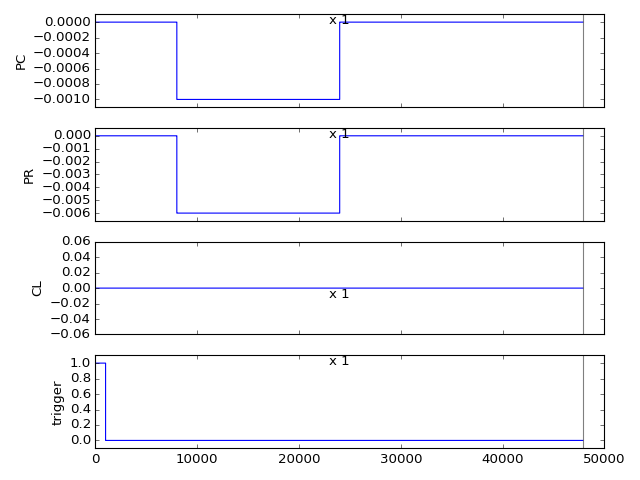

In [21]:
# Two-stage initialization for dynamics at Blockade regime   --------------- Adibatically to |1l > ,several sections
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Medi  = (0.00, 0.00),
                     Init  = (0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time + 2*adia_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.10*cycle_time, at = Eject)
        detuning.dwell(0.15*cycle_time - duty_time, at = Meas)
        
        t_ref  = 0.20*cycle_time
        t_unit = 6400*w.AWG.t_sample
        if t_ref < t_unit:
            detuning.dwell(t_ref, at = Meas)
        else:
            all_ch.section()
            detuning.dwell(t_unit, at = Meas)
            all_ch.section(repeat = int(t_ref/t_unit))
            detuning.dwell(t_ref - t_unit*int(t_ref/t_unit), at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(adia_time, _from = Medi, to = Init)
        detuning.dwell(evol_time, at = Init)
        detuning.ramp(adia_time, _from = Init, to = Medi)
        detuning.ramp(ramp_time, _from = Medi, to = Meas)
        detuning.dwell(0.15*cycle_time - 1.0*(evol_time + adia_time))
        
        t_meas = 0.20*cycle_time
        if t_meas < t_unit:
            detuning.dwell(t_meas, at = Meas)
        else:
            all_ch.section()
            detuning.dwell(t_unit, at = Meas)
            all_ch.section(repeat = int(t_meas/t_unit))
            detuning.dwell(t_meas - t_unit*int(t_meas/t_unit), at = Meas)

        detuning.dwell(1.0*(evol_time + adia_time), at = [-1.0*i for i in Init])
#       detuning.dwell(evol_time, at = [-1.0*i for i in Init])       # why use a for loop?
#       detuning.dwell(0.1*cycle_time, at = Meas)
        detuning.dwell(0.10*cycle_time, at = [-1.0*e for e in Eject])  # why 0.5 Eject
        detuning.dwell(0.05*cycle_time, at = Meas)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations 

w.AWG.t_sample = 10./64.
evol_times = np.linspace(0., 10e3, 51)
send_ramp_pulses(evol_times = evol_times, cycle_time = 160e3, ramp_time = 10, adia_time = 50, 
                 Meas = (0.00, 0.00), Medi = (0.0107, -0.0132), Init = (0.0301, -0.0394), Eject = (-0.001, -0.006))
all_ch.show(0)
time_label = 'dwell'

<IPython.core.display.Javascript object>


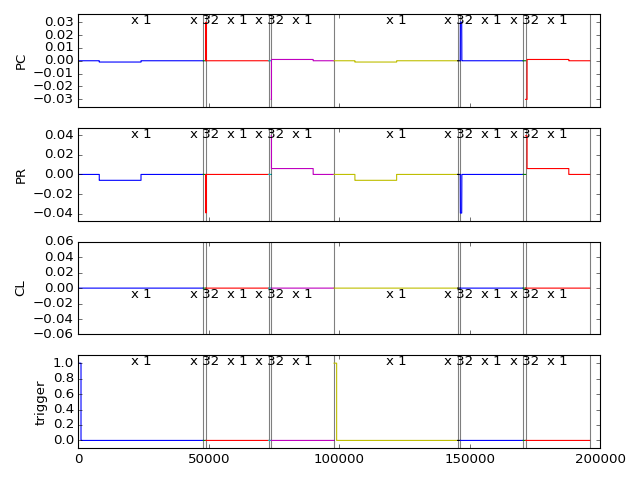

In [20]:
all_ch.show(slice(0,10))

### 1st order transition

In [63]:
delay_arr = {'0.2': 100, '0.5': 200}

In [66]:
t_ins = 0.5
delay_arr['%s' %(t_ins)]

200

Loading the sequence into AWG (TCPIP::192.168.1.7::4000::SOCKET)
Waveforms generated in 0.00 and sent in 1.62
Waveforms generated in 0.10 and sent in 1.39
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 1.64 seconds


<IPython.core.display.Javascript object>


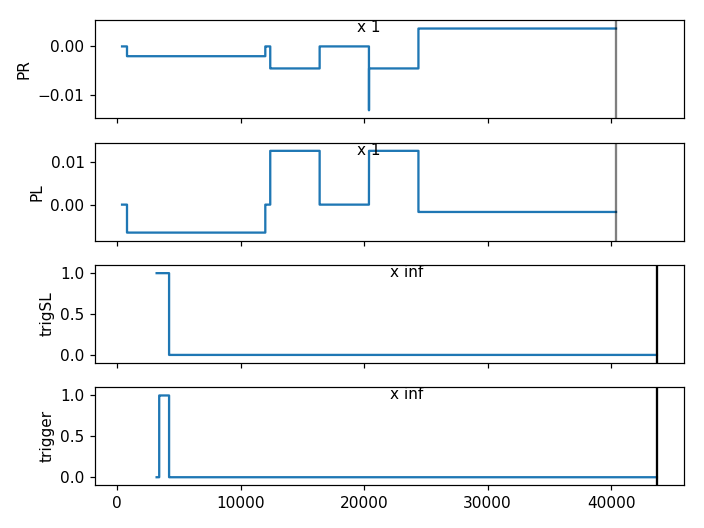

In [98]:
# two-step initialization for dynamics at transition line -----RAP  then to transition line
def send_tran_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     back_time = 10.,
                     Meas  = (0.00,  0.00),  
                     Read  = (0.00,  0.00),  
                     Init  = ( 0.01, -0.01),
                     Tran  = (0.00,  0.00),
                     Eject = (0.00, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)  
    
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time + back_time

        #trigger.excurse(1000, to = 1.)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.28*cycle_time, at = Eject)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.10*cycle_time, at = Read)
        detuning.dwell(0.10*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        #detuning.dwell(0.01*ramp_time, at = Init)
        detuning.dwell(evol_time, at = Tran)        
        #detuning.dwell(0.01*ramp_time, at = Init)
        detuning.ramp(back_time, _from = Init, to = Read)

        detuning.dwell(0.10*cycle_time, at = Read)
        detuning.compensate(0.40*cycle_time - 0. )    # -(840 * w.AWG.t_sample + 160.) 

        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)

    detuning.compose()
    detuning.load_seq()  
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations


Cent_po = np.array([-0.4046, -1.1026])
Me_po   = Cent_po + np.array([0.0045, -0.0025]) # + np.array([0.0042, -0.0028])
Re_po   = Cent_po + np.array([0.000, 0.010])  # np.array([-0.2316, -0.8430])  #np.array([-0.2320, -0.8453])    #Me_po    
#Init_vec = np.array([0.004, -0.004])   
#Init_vec = np.array([0.012, -0.0100]) + np.array([1., -1.90])*(0.00)            # relative to center position
Init_vec = np.array([-0.009,  0.009]) # np.array([-0.010,  0.0140])  , np.array([-0.0057,  0.0082]) 
#Tran_po= np.array([-0.9431, -0.3660])

Init = Cent_po - Me_po + Init_vec
Ej_po = Cent_po + np.array([0.0025, -0.009])        # + np.array([0.014, -0.012])
Eject = Ej_po - Me_po                      # Ej_po - Me_po   [-0.009, 0.002]
#Medi = Cent_po - Me_po + np.array([0.0032, -0.0040])              #np.array([0.0018, -0.0038])#Med - Me
Meas = (0.00,  0.00)
Read = Re_po - Me_po
#Tran_vec = np.array([-0.0038, -0.0040]) + np.array([1., -1.50])*0.002
#Tran = Cent_po - Me_po + Tran_vec  #Init + np.array([-0.0060,0.]) # np.array([-0.0056,0.])  # Cent_po - Me_po + np.array([0.00, -0.010]) , Init + np.array([-0.0046,0.])
Tran = Init + np.array([0.0, -0.0095]) 


w.AWGMA.t_sample = 8.
w.AWG.t_sample = 0.4
ts = w.AWG.t_sample

evol_times = np.linspace(0., 8. , 20)  # ts*20 , 21
cycle_time = 40e3  # 80e3
ramp_time = 4.
back_time = 4.

#AWGMA
triggers.refresh()
triggers.dwell(w.AWGMA.t_sample*400, at=(0.,0.)) # w.AWGMA.t_sample*800
triggers.section(repeat=np.inf)

t_delay =  216 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  160 + 128 * w.AWG.t_sample
triggers.dwell(t_delay,      at = (0.,1.))
triggers.dwell(800, at = (1., 1.))
triggers.dwell(cycle_time - 800 - t_delay + (840 * w.AWG.t_sample + 176.), at =(0., 0.)) #  176.  168.  184.
triggers.section(repeat=np.inf)

triggers.compose()
triggers.load_seq()
w.AWGMA.jump(0)
w.AWGMA._OPC()

send_tran_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = ramp_time, adia_time = 50, back_time = back_time, Meas = Meas, Read =Read,
                  Init = Init, Tran = Tran, Eject = Eject)
all_ch.show(1)
time_label = 'dwell'

In [243]:
ts = w.AWG.t_sample
print ts

0.1


<IPython.core.display.Javascript object>


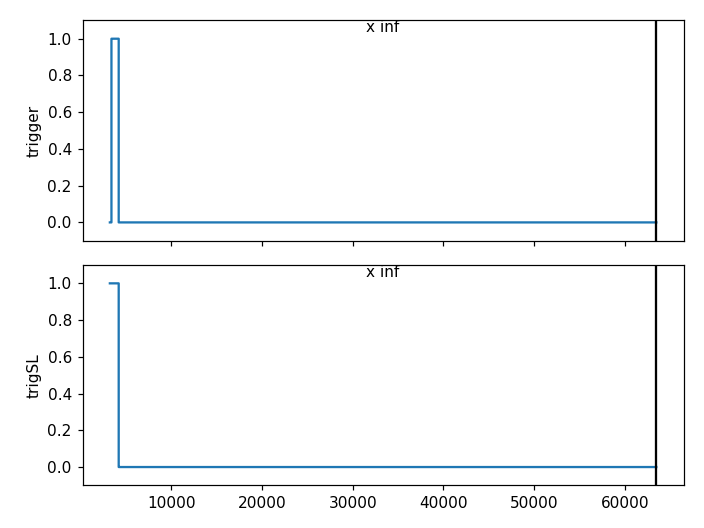

In [6]:
triggers.show(1)

In [230]:
w.AWG.jump(0)
w.AWGMA.jump(0)

### 1st order with 2 stage

In [780]:
(w.PR, w.PL) = np.array([-1.1280,-0.5264])

You may want to increase the AWG sampling time from 4.000000e-01 ns
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.99 seconds


<IPython.core.display.Javascript object>


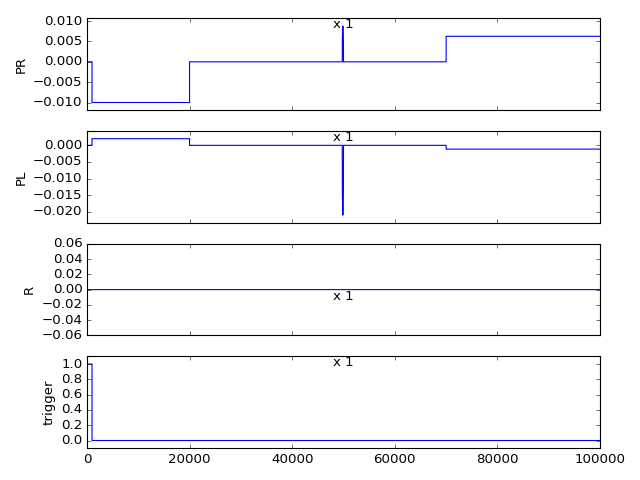

In [85]:
# two-step initialization for dynamics at transition line -----adiabatically to |1l> then to transition line
# Two-stage initialization for dynamics at Blockade regime   --------------- Adibatically to |1l >, np
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Medi  = (0.00, 0.00),
                     Tran  = (0.00, 0.00),                     
                     Init  = (0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00)):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time + 2*adia_time +4

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.19*cycle_time, at = Eject)
        detuning.dwell(0.30*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(adia_time, _from = Medi, to = Init)
        detuning.dwell(2, at = Init)
        detuning.dwell(evol_time, at = Tran)
        detuning.dwell(2, at = Init)
        detuning.ramp(adia_time, _from = Init, to = Medi)
        detuning.ramp(ramp_time, _from = Medi, to = Meas)
        
#        detuning.dwell(0.30*cycle_time - 1.0*(evol_time + adia_time), at = Meas)
        detuning.dwell(0.2*cycle_time, at = Meas)
        detuning.compensate(0.3*cycle_time) 
#        detuning.dwell(1.0*(evol_time + adia_time), at = [-1.0*i for i in Init])
##       detuning.dwell(evol_time, at = [-1.0*i for i in Init])       # why use a for loop?
##       detuning.dwell(0.1*cycle_time, at = Meas)
#        detuning.dwell(0.10*cycle_time, at = [-1.0*e for e in Eject])  # why 0.5 Eject
#        detuning.dwell(0.05*cycle_time, at = Meas)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
#     w.AWG._OPC()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations 

Cent_po = np.array([-0.9590,-0.5101])
Me_po   = np.array([-0.9618,-0.4991]) # Cent_po + np.array([-0.0028, 0.0110])
Init_vec = np.array([0.006, -0.010]) + np.array([1., -1.90])*(0.00)            # relative to center position
#Tran_po= np.array([-0.9431, -0.3660])

Init = Cent_po - Me_po + Init_vec
Eject = np.array([-0.010, 0.002]) #Ej - Me
Medi = Cent_po - Me_po + np.array([0.0032, -0.0040])              #np.array([0.0018, -0.0038])#Med - Me
Meas = (0.00,  0.00)
Tran = Init + np.array([-0.0060,0.]) # np.array([-0.0056,0.])  # Cent_po - Me_po + np.array([0.00, -0.010]) , Init + np.array([-0.0046,0.])

w.AWG.t_sample = 0.4

evol_times = np.linspace(0., 4. , 11)

send_ramp_pulses(evol_times = evol_times, cycle_time = 100e3, ramp_time = 20, adia_time = 100, 
                 Meas = (0.00, 0.00), Medi = Medi, Init = Init, Eject = Eject, Tran = Tran)
all_ch.show(0)
time_label = 'dwell'

In [32]:
print Me_po+Init+np.array([-0.004,0.]) , # Tran

[-0.9212 -0.3577]


SOURce1:MARKer1:VOLTage:LEVel:HIGH 1.368421
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
Loading the sequence into AWG (TCPIP::192.168.1.11)  in 0.37 seconds


<IPython.core.display.Javascript object>


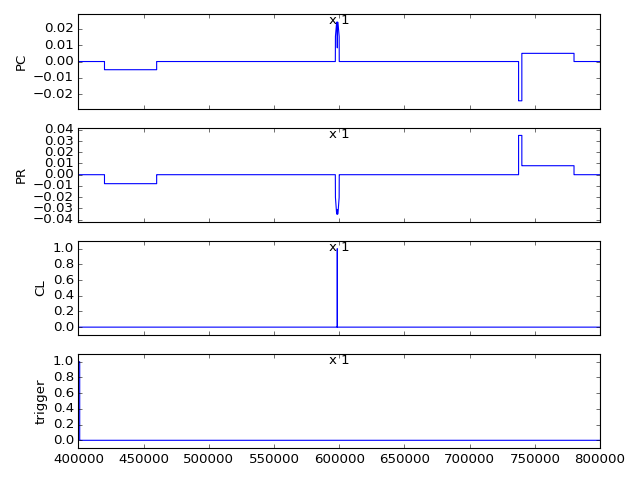

In [574]:
# Pulse Barrier with PC/PR compensation ,   ------------  With  Adiabaic Initialization

def set_barrier_high(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, dev_value/0.0095)
    print cmd
    w.AWG.safe_write(cmd)
def set_barrier_low(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, dev_value/0.0095)
    print cmd2
    w.AWG.safe_write(cmd2)  

# Positive pulse
amp = 0.006
set_barrier_high(amp)
set_barrier_low(0.0)

PC_Com = -1.203 * amp
PR_Com = 0.310 * amp
    
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Meas  = (0.00,  0.00),                     
                     Medi  = (0.01, -0.01),                     
                     Init  = ( 0.01, -0.01),
                     Comp  = (0.00,  0.00),
                     Eject = (0.0, 0.00),
                     Close = 0.00,
                     Open  = 1.00):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time + 2*adia_time + 1000

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.10*cycle_time, at = Eject)
        detuning.dwell(0.35*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(adia_time, _from = Medi, to = Init)  
        
        detuning.dwell(500, at = Init)
        detuning.dwell(evol_time, at = Comp)        
        detuning.dwell(500, at = Init)

        detuning.ramp(adia_time, _from = Init, to = Medi)
        detuning.ramp(ramp_time, _from = Medi, to = Meas)
        
        detuning.dwell(0.35*cycle_time - 1.5*adia_time - 1000 - evol_time, at = Meas)
        detuning.dwell(1.5*adia_time + 1000, at = [-1.0*i for i in Init])
        detuning.dwell(evol_time, at = [-1.0*i for i in Comp])       
        detuning.dwell(0.1*cycle_time, at = [-1.0*e for e in Eject])
        detuning.dwell(0.05*cycle_time, at = Meas)
        
        barrier.dwell(0.5*cycle_time - evol_time - 500 - ramp_time - adia_time - 2, at = Close)
        barrier.dwell(evol_time if evol_time > 0 else 0, at = Open)
        barrier.dwell(0.5*cycle_time + 500 + ramp_time + adia_time + 2, at = Close)
        
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 1
evol_times = np.linspace(0, 10, 10)
send_ramp_pulses(evol_times = evol_times, cycle_time = 400e3, ramp_time = 2, adia_time = 1000, Meas = (0.00,  0.00), 
                 Medi = (0.0146, -0.0190), Init = (0.024, -0.035), Comp = (0.024 + PC_Com, -0.035 + PR_Com), Eject = (-0.005, -0.008), Close = 0.00, Open  = 1.00)
all_ch.show(1)
time_label = 'dwell'

### Pulse barri with RAP

SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.821918
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 3.58 seconds


<IPython.core.display.Javascript object>


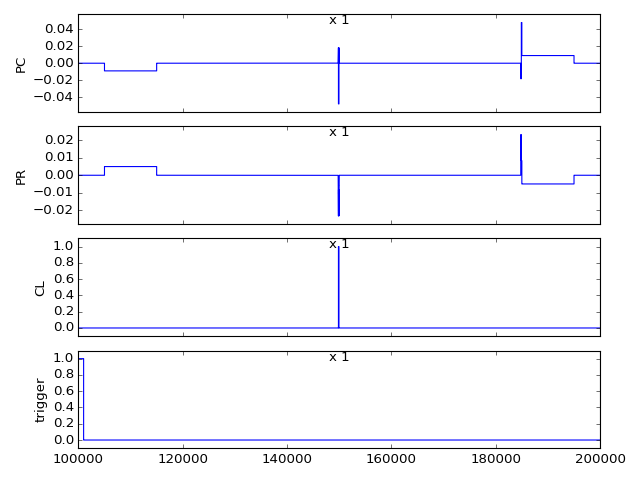

In [36]:
# Pulse Barrier with PC/PR compensation ,   ------------  one step RAP then Comp

def set_barrier_high(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, dev_value/0.073)  #0.092for 1+6+1,0.0095 for 1+6+20, 0.0316used for 10dB, 0.092 used for 1dB(+1+6)
    print cmd
    w.AWG.safe_write(cmd)
def set_barrier_low(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, dev_value/0.073)  #0.0095
    print cmd2
    w.AWG.safe_write(cmd2)  

# Positive pulse
amp = 0.060
set_barrier_high(amp)
set_barrier_low(0.0)

PC_Com = -1.10 * amp
PR_Com = 0.250 * amp

def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Meas  = (0.00,  0.00),                                         
                     Init  = ( 0.01, -0.01),
                     Comp  = (0.00,  0.00),
                     Eject = (0.0, 0.00),
                     Close = 0.00,
                     Open  = 1.00):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time + 0.2*ramp_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.10*cycle_time, at = Eject)
        detuning.dwell(0.35*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        
        detuning.dwell(0.1*ramp_time, at = Init)
        detuning.dwell(evol_time, at = Comp)        
        detuning.dwell(0.1*ramp_time, at = Init)

        detuning.ramp(ramp_time, _from = Init, to = Meas)
        
        detuning.dwell(0.35*cycle_time - 2.2*ramp_time - evol_time, at = Meas)
        detuning.dwell(2.2*ramp_time, at = [-1.0*i for i in Init])
        detuning.dwell(evol_time, at = [-1.0*i for i in Comp])       
        detuning.dwell(0.1*cycle_time, at = [-1.0*e for e in Eject])
        detuning.dwell(0.05*cycle_time, at = Meas)
        
        barrier.dwell(0.5*cycle_time - evol_time -  1.1* ramp_time -0.0 if evol_time > 0 else 0.5*cycle_time - evol_time -  1.1* ramp_time, at = Close)
        barrier.dwell(evol_time + 0.6 if evol_time > 0 else 0, at = Open)
        barrier.dwell(0.5*cycle_time + 1.1* ramp_time - 0.6 if evol_time > 0 else 0.5*cycle_time + 1.1* ramp_time, at = Close)
        
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 0.2
evol_times = np.linspace(0., 5e3, 51)
send_ramp_pulses(evol_times = evol_times, cycle_time = 100e3, ramp_time = 50, adia_time = 1000, Meas = (0.00,  0.00), 
                 Init = (0.0204, -0.0247), Comp = (0.0204 + PC_Com, -0.0247 + PR_Com), Eject = (-0.009, 0.006), Close = 0.00, Open  = 1.00)
all_ch.show(1)
time_label = 'dwell'

### Pulse barrier with RAP, d.compensate

In [106]:
# Pulse Barrier with PC/PR compensation ,   ------------  one step RAP then Comp, use detuning.compensate

def set_barrier_high(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, dev_value/0.0517)  #0.073 for 1+6+3,0.0095 for 1+6+20, 0.0316used for 10dB, 0.092 used for 1dB(+1+6)
    print cmd
    w.AWG.safe_write(cmd)
def set_barrier_low(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, dev_value/0.0517)  #0.0095
    print cmd2
    w.AWG.safe_write(cmd2)  

# Positive pulse
amp = 0.060
set_barrier_high(amp)
set_barrier_low(0.0)

PC_Com = -1.13 * amp
PR_Com = 0.29 * amp

def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Meas  = (0.00,  0.00),                                         
                     Init  = ( 0.01, -0.01),
                     Comp  = (0.00,  0.00),
                     Eject = (0.0, 0.00),
                     Close = 0.00,
                     Open  = 1.00):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time + 0.2*ramp_time

        barrier.dwell(0.5*cycle_time - evol_time -  1.1* ramp_time -0.0 if evol_time > 0 else 0.5*cycle_time - evol_time -  1.1* ramp_time, at = Close)
        barrier.dwell(evol_time + 0.0 if evol_time > 0 else 0, at = Open)
        barrier.dwell(0.5*cycle_time + 1.1* ramp_time - 0.0 if evol_time > 0 else 0.5*cycle_time + 1.1* ramp_time, at = Close)
        
        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.10*cycle_time, at = Eject)
        detuning.dwell(0.35*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        
        detuning.dwell(0.1*ramp_time, at = Init)
        detuning.dwell(evol_time, at = Comp)        
        detuning.dwell(0.1*ramp_time, at = Init)

        detuning.ramp(ramp_time, _from = Init, to = Meas)
        
        detuning.dwell(0.3*cycle_time, at = Meas)
        detuning.compensate(0.2*cycle_time)
                
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 0.2
evol_times = np.linspace(0., 5e3, 51)
send_ramp_pulses(evol_times = evol_times, cycle_time = 100e3, ramp_time = 100, adia_time = 1000, Meas = (0.00,  0.00), 
                 Init = (0.0334, -0.0425), Comp = (0.0334 + PC_Com, -0.0425 + PR_Com), Eject = (-0.009, 0.007), Close = 0.00, Open  = 1.00)
all_ch.show(1)
time_label = 'dwell'

SOURce1:MARKer1:VOLTage:LEVel:HIGH 1.160542
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000


KeyboardInterrupt: 

### Pulse barri with 2 stage

SOURce1:MARKer1:VOLTage:LEVel:HIGH 1.333333
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.98 seconds
Comp = [-0.0264 -0.0282]


<IPython.core.display.Javascript object>


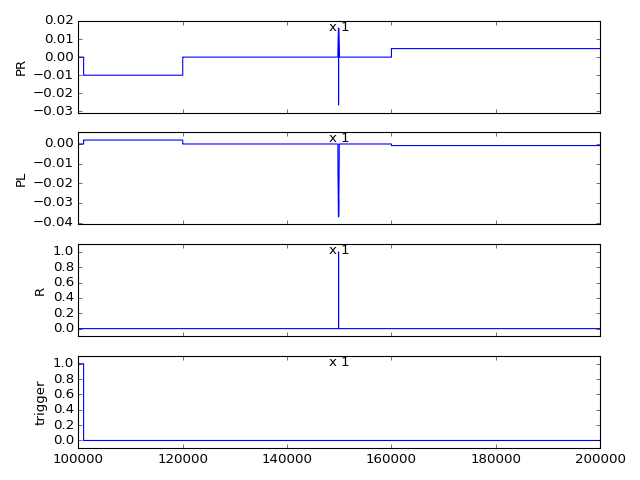

In [151]:
# Pulse Barrier with PC/PR compensation ,   ------------  two stage to updown then Comp

def set_barrier_high(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, dev_value/0.06)  # 1+6dB+6dB
    print cmd
    w.AWG.safe_write(cmd)
def set_barrier_low(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, dev_value/0.06)
    print cmd2
    w.AWG.safe_write(cmd2)  

# Positive pulse
amp = 0.08
set_barrier_high(amp)
set_barrier_low(0.0)

PR_Com = -0.53 * amp   # -1.13 * amp
PL_Com = 0.11 * amp   # 0.29 * amp

def send_barrier_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Medi  = (0.00, 0.00),
                     Init  = (0.01, -0.01),
                     Comp  = (0.00,  0.00),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00),
                     Close = 0.0,
                     Open  = 1.0):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 2.2*ramp_time + evol_time + 2.0*adia_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.19*cycle_time, at = Eject)
        detuning.dwell(0.30*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Medi)     
        detuning.ramp(adia_time, _from = Medi, to = Init)
        detuning.dwell(0.1*ramp_time, at = Init)
        detuning.dwell(evol_time, at = Comp)
        detuning.dwell(0.1*ramp_time, at = Init)        
        detuning.ramp(adia_time, _from = Init, to = Medi)
        detuning.ramp(ramp_time, _from = Medi, to = Meas)

        detuning.dwell(0.1*cycle_time, at = Meas)
        detuning.compensate(0.4*cycle_time)
#         detuning.dwell(0.35*cycle_time - 1.0*evol_time - 1.5 * adia_time, at = Meas)
#         detuning.dwell(1.0 * evol_time, at = [-1.0*i for i in Comp])
#         detuning.dwell(1.5 * adia_time, at = [-1.0*i for i in Init])
#       detuning.dwell(evol_time, at = [-1.0*i for i in Init])       # why use a for loop?
#       detuning.dwell(0.1*cycle_time, at = Meas)
#         detuning.dwell(0.10*cycle_time, at = [-1.0*e for e in Eject])  # why 0.5 Eject
#         detuning.dwell(0.05*cycle_time, at = Meas)
        
        barrier.dwell(0.5*cycle_time - evol_time - 1.1* ramp_time - adia_time - 0. if evol_time > 0 else 0.5*cycle_time - evol_time - 1.0* ramp_time - adia_time, at = Close)
        barrier.dwell(evol_time + 0. if evol_time > 0 else 0 , at = Open)
        barrier.dwell(0.5*cycle_time + 1.1* ramp_time + adia_time - 0. if evol_time > 0 else 0.5*cycle_time + 1.0* ramp_time + adia_time, at = Close)
        
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    print "Comp =",Comp

Cent_po = np.array([-0.8432,-0.5367])
Me_po   = np.array([-0.8432,-0.5287])
Init_vec = np.array([0.006, -0.010]) + np.array([1., -1.90])*(0.010)      # relative to center position cent_po

Init = Cent_po - Me_po + Init_vec
Eject = np.array([-0.010, 0.002]) #Ej - Me
Medi = Cent_po - Me_po + np.array([0.004, -0.006])             #np.array([0.0018, -0.0038])#Med - Me
Meas = (0.00,  0.00)

Comp = Init  + np.array([PR_Com, PL_Com])

w.AWG.t_sample = 1.
evol_times = np.linspace(0., 200, 11)

send_barrier_pulses(evol_times = evol_times, cycle_time = 100e3, ramp_time = 20, adia_time = 100, 
                 Meas = Meas, Medi = Medi, Init = Init, Comp = Comp, Eject = Eject, Close = 0.0, Open = 1.0)
all_ch.show(1)
time_label = 'dwell'
#print Comp

In [147]:
 w.AWG.jump(-1)

In [412]:
#np.asarray([PR_Com, PL_Com])
np.array([PR_Com, PL_Com])

array([-0.0195,  0.0033])

### Test delays of AWG channels

SOURce2:MARKer2:VOLTage:LEVel:HIGH 1.000000
SOURce2:MARKer2:VOLTage:LEVel:Low 0.000000
You may want to increase the AWG sampling time from 1.000000e+00 ns
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.17 seconds


<IPython.core.display.Javascript object>


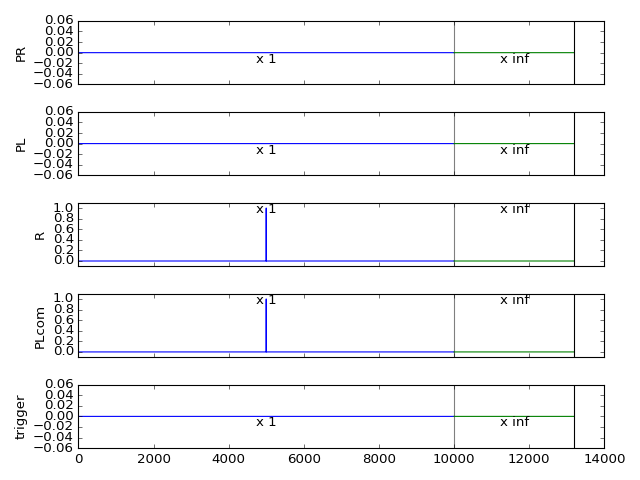

In [3]:
# Pulse Barrier with PC/PR compensation ,   ------------  Test sychronizition of AWG.Ch1 (PC) and Marker 11 (CL)

def set_barrier_high(dev_value):
    ch_num, marker_num = 2, 2
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, dev_value/1.0)
    print cmd
    w.AWG.safe_write(cmd)
def set_barrier_low(dev_value):
    ch_num, marker_num = 2, 2
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, dev_value/1.0)
    print cmd2
    w.AWG.safe_write(cmd2)  

# Positive pulse
amp = 1.0
set_barrier_high(amp)
set_barrier_low(0.0)

#PC_Com = -1.203 * amp
#PR_Com = 0.310 * amp

def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Meas  = (0.00,  0.00),                                         
                     Init  = ( 0.01, -0.01),
                     Init2 = (-0.01, -0.01),
                     Eject = (0.0, 0.00),
                     Close = 0.00,
                     Open  = 1.00):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        #duty_time = 2*ramp_time + evol_time + 2*ramp_time

        #trigger.excurse(1000, to = 1.)

        detuning.dwell(0.5*cycle_time - evol_time, at = Meas)  
        
        detuning.dwell(evol_time, at = Init)
        #detuning.dwell(evol_time, at = Init2)
        #detuning.dwell(0.5*evol_time, at = Init)
        #detuning.ramp(ramp_time, _from = Init, to = Meas)
        
        detuning.dwell(0.3*cycle_time, at = Meas)
        detuning.compensate(0.2*cycle_time)
        
        barrier.dwell(0.5*cycle_time - evol_time , at = Close)
        barrier.dwell(evol_time, at = Open)
        barrier.dwell(0.5*cycle_time, at = Close)
        
        PLcom.dwell(0.5*cycle_time-evol_time, at = Close)
        PLcom.dwell(evol_time, at = Open)
        PLcom.dwell(0.5*cycle_time, at = Close)

#         trigger.dwell(0.5*cycle_time - evol_time , at = Close)
#         trigger.dwell(evol_time, at = Open)
#         trigger.dwell(0.5*cycle_time, at = Close)
        
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 1  #10./64.
evol_times = np.linspace(1., 20.0, 1)
send_ramp_pulses(evol_times = evol_times, cycle_time = 10e3, ramp_time = 10, Meas = (0.00,  0.00), 
                 Init = (0.0, 0.00), Init2 = (-0.5, -0.5),  Eject = (0.0, 0.0), Close = 0., Open  = 1.0)
all_ch.show()
time_label = 'dwell'
w.AWG.jump(0)

In [17]:
from struct import pack,unpack
mk1, mk2 = 1,0
p = np.clip((0.12345+1.)*(2**13)-1., 0, 2**14-1)+ (mk1+2*mk2)*(2**14)
pack('<H', p), pack('<h', p)

C:\Users\taruchalab\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: integer argument expected, got float


('\xf2c', '\xf2c')

In [7]:
2**15-1

32767

In [3]:
from struct import pack,unpack
unpack('<B',pack('<b', 64))

(64,)

<IPython.core.display.Javascript object>


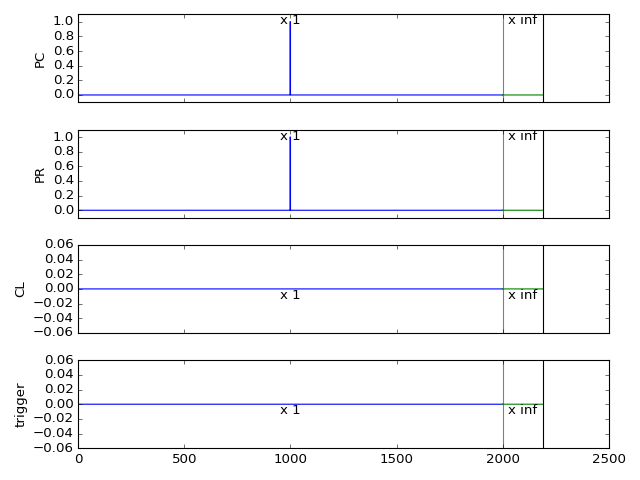

In [95]:
all_ch.show(scaled = False)

In [4]:
w.AWG.jump(0)

In [4]:
w.AWG.jump(-1)

SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.000000
SOURce1:MARKer1:VOLTage:LEVel:Low -1.052632
Loading the sequence into AWG (TCPIP::192.168.1.11)  in 0.84 seconds


<IPython.core.display.Javascript object>


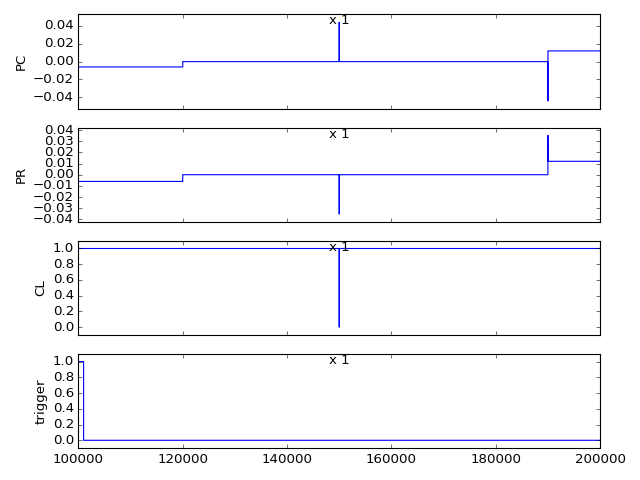

In [151]:
# Pulse Barrier with PC/PR compensation ,  Negative

def set_barrier_high(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, dev_value/0.019)
    print cmd
    w.AWG.safe_write(cmd)
def set_barrier_low(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, dev_value/0.019)
    print cmd2
    w.AWG.safe_write(cmd2)  

# Negative pulse
amp = - 0.02
set_barrier_high(0.0)
set_barrier_low(amp)

PC_Com = -1.203 * amp
PR_Com = 0.310 * amp
    
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     Init  = ( 0.01, -0.01),
                     Meas  = (0.00,  0.00),
                     Comp  = (0.00,  0.00),
                     Eject = (0.0, 0.00),
                     Close = 0.00,
                     Open  = 1.00):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = ramp_time + 2 + evol_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.2*cycle_time, at = Eject)
        detuning.dwell(0.3*cycle_time - duty_time, at = Meas)

        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        detuning.dwell(1, at = Init)

        detuning.dwell(evol_time, at = Comp)        
        detuning.dwell(1, at = Init)     
        
        detuning.dwell(0.4*cycle_time - ramp_time, at = Meas)
        detuning.dwell(evol_time, at = [-1.0*i for i in Comp])
        detuning.dwell(0.1*cycle_time, at = [-2.0*e for e in Eject])
        
        barrier.dwell(0.5*cycle_time - evol_time - 1, at = Open)
        barrier.dwell(evol_time, at = Close)
        barrier.dwell(0.5*cycle_time + 1, at = Open)
        
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 1
evol_times = np.linspace(0, 200, 51)
send_ramp_pulses(evol_times = evol_times, cycle_time = 100e3, ramp_time = 5, Meas = (0.00,  0.00), Init = (0.0200, -0.029), Comp = (0.02 + PC_Com, -0.029 + PR_Com), Eject = (-0.006, -0.006))
all_ch.show(1)
time_label = 'dwell'

Loading the sequence into AWG (TCPIP::192.168.1.11)  in 0.39 seconds


<IPython.core.display.Javascript object>


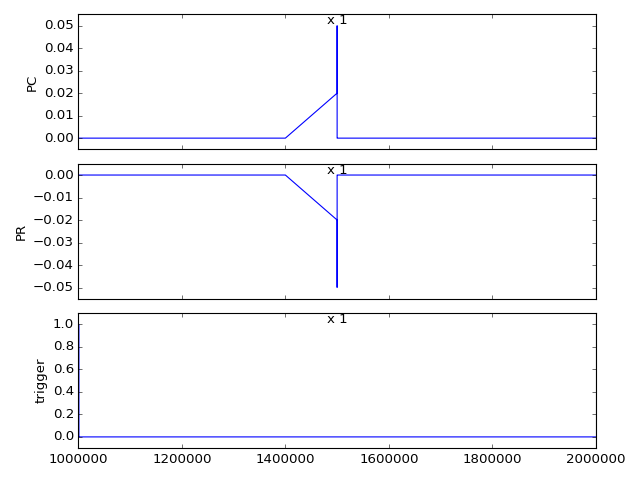

In [2]:
#for ST0 oscillation
def send_ST0_pulses(evol_times, #ns
                    cycle_time = 1000e+3,
                    ramp_time =  100,
                    Init = (0.010, -0.010),
                    Evol = (0.050, -0.050),
                    Meas = (0.00,  0.00)):
    if w.AWG.t_sample > evol_times[1]-evol_times[0]:
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = ramp_time + evol_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.5*cycle_time - duty_time, at = Meas)

        detuning.ramp(ramp_time, _from = Meas, to = Init)
        detuning.dwell(evol_time, at = Evol)
        detuning.ramp(0, _from = Init, to = Meas)

        detuning.dwell(0.5*cycle_time, at = Meas)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC()
w.AWG.t_sample = 1
#evol_times = np.arange(0, 40, 2)
#send_ST0_pulses(evol_times, ramp_time = 100,  Init = (0.01, -0.01), Evol = (0.050, -0.050))
evol_times = np.linspace(5, 20, 4)
send_ST0_pulses(evol_times, ramp_time = 100000,  Init = (0.02, -0.02), Evol = (0.050, -0.050))
all_ch.show(1)
time_label = 'evolution'

### T0

In [343]:
np.array([-0.3573, -0.9292]) -np.array([-0.3642, -0.9226])

array([ 0.0069, -0.0066])

Loading the sequence into AWG (TCPIP::192.168.1.7::4000::SOCKET)
Waveforms generated in 0.07 and sent in 3.69
Waveforms generated in 0.09 and sent in 3.53
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.89 seconds


<IPython.core.display.Javascript object>


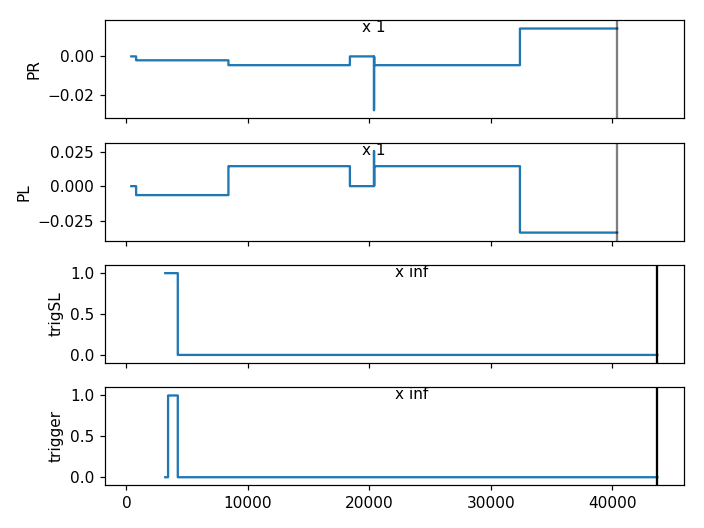

[-0.007  0.005] [-0.0345  0.0325]


In [40]:
#for ST0 oscillation, Modified in 2018_09_27   with AWG520 triggers and latched read-out in (2,1)


def send_ST0_pulses(evol_times, #ns
                    cycle_time = 1000e+3,
                    ramp_time =  100,
                    Init = (0.010, -0.010),
                    Evol = (0.050, -0.050),
                    Eject = (-0.001, 0.005),
                    Medi = (0.0, 0.0),
                    RAP = 0.,
                    Meas = (0.00,  0.00)):
    if w.AWG.t_sample > evol_times[1]-evol_times[0]:
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)

    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time + 2*RAP

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.19*cycle_time, at = Eject)
        detuning.dwell(0.25*cycle_time, at = Read) 
        detuning.dwell(0.05*cycle_time - duty_time, at = Meas)

        detuning.ramp(ramp_time, _from = Meas, to = Medi)
        detuning.ramp(RAP, _from = Medi, to = Evol)
        detuning.dwell(evol_time, at = Evol)
        detuning.ramp(RAP, _from = Evol, to = Medi)
        detuning.ramp(ramp_time, _from = Medi, to = Meas)

        detuning.dwell(0.3*cycle_time, at = Read)
        detuning.compensate(0.2*cycle_time)
        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)

    detuning.compose()
    detuning.load_seq()  

    w.AWG.jump(0)
    w.AWG._OPC()


Cent_po = np.array([-0.3412, -0.9702])
Me_po   = Cent_po + np.array([ 0.0045, -0.0025])# np.array([0.0040, -0.0040])
Re_po   = Cent_po + np.array([0.00, 0.012])    #np.array([-0.3528, -0.9538])   

Init_vec = np.array([-0.030, 0.030])          # relative to center position cent_po

Init = Cent_po - Me_po + Init_vec
Eject = Cent_po - Me_po + np.array([0.0025, -0.009]) #  + np.array([0.010, -0.019]) 
Medi = Cent_po - Me_po + np.array([-0.0025, 0.0025])             #np.array([0.0018, -0.0038]) #Med - Me
Meas = (0.00,  0.00)
Read = Re_po - Me_po
Evol = Init

w.AWG.t_sample = 0.4
evol_times = np.linspace(0, 100., 51)
cycle_time = 40e3

# triggers
w.AWGMA.t_sample = 8.
triggers.refresh()
triggers.dwell(w.AWGMA.t_sample*400, at=(0.,0.)) # w.AWGMA.t_sample*800
triggers.section(repeat=np.inf)

t_delay =  216 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  180 + 128 * w.AWG.t_sample
triggers.dwell(t_delay,      at = (0.,1.))
triggers.dwell(800, at = (1., 1.))
triggers.dwell(cycle_time - 800 - t_delay + (840 * w.AWG.t_sample + 176.), at =(0., 0.)) #  - 8.
triggers.section(repeat=np.inf)

triggers.compose()
triggers.load_seq()
w.AWGMA.jump(0)
w.AWGMA._OPC()

# send_ST0_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = 16, Eject = Eject, RAP = 8,
#                 Meas = Meas, Init = Init, Evol = Evol, Medi = Medi)
send_ST0_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = 12., Eject = Eject, RAP = 0.8,
                Meas = Meas, Init = Init, Evol = Evol, Medi = Medi)

all_ch.show(1)
time_label = 'dwell'
print Medi, Init

Waveforms generated in 0.90 and sent in 3.38
Waveforms generated in 1.13 and sent in 3.16
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 4.12 seconds


<IPython.core.display.Javascript object>


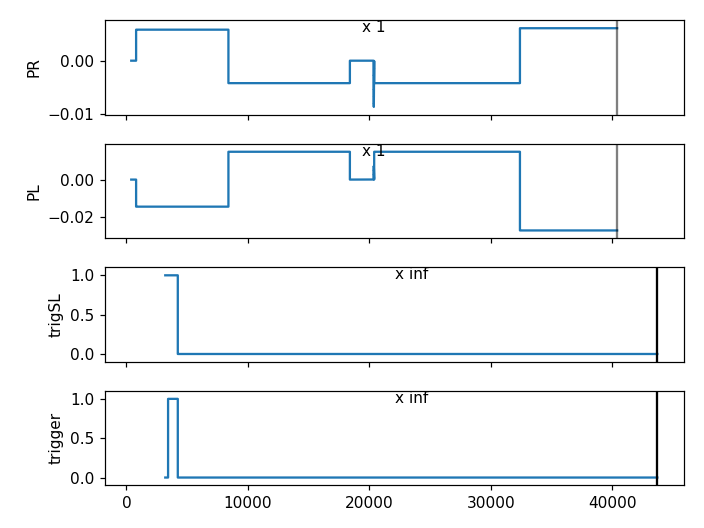

In [31]:
send_ST0_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = 30., Eject = Eject, RAP = 0.0,
                Meas = Meas, Init = Init, Evol = Evol, Medi = Medi)
all_ch.show(1)

### T0 with meta

In [85]:
w.PR.val, w.PL.val = (-0.9464, -0.4453)

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 3.80 seconds


<IPython.core.display.Javascript object>


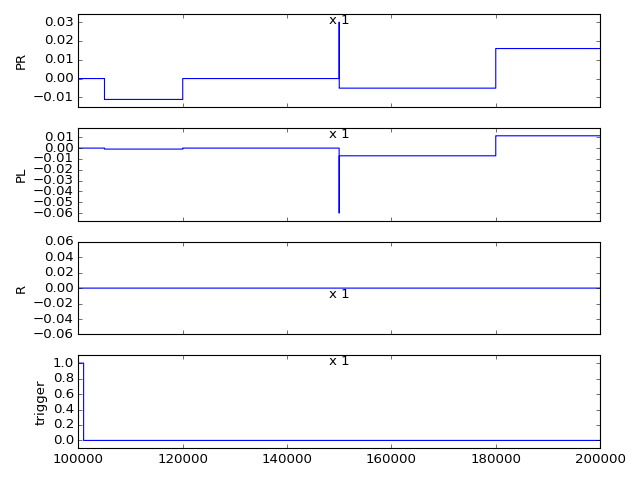

In [83]:
#for ST0 oscillation, Modified in 2018_93_16, with np.array

Me = np.array([-0.9464, -0.4453])
In = np.array([-0.9575, -0.4462])
Met = np.array([-0.9515, -0.4524])

evol_times = np.linspace(0, 100, 51) #ns
cycle_time = 100e+3
ramp_time =  10
#Init = 
Evol = (0.030, -0.060)
Eject = In - Me
Meta = Met - Me
Meas = (0.00,  0.00)

w.AWG.t_sample = 0.5

if w.AWG.t_sample > evol_times[1]-evol_times[0]:
    print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

all_ch.refresh()
for evol_time in evol_times:
    duty_time = 2*ramp_time + evol_time

    trigger.excurse(1000, to = 1.)
    detuning.dwell(0.05*cycle_time, at = Meas)
    detuning.dwell(0.15*cycle_time, at = Eject)
    detuning.dwell(0.3*cycle_time - duty_time, at = Meas)

    detuning.ramp(ramp_time, _from = Meas, to = Evol)
    detuning.dwell(evol_time, at = Evol)
    detuning.ramp(ramp_time, _from = Evol, to = Meta)

    detuning.dwell(0.3*cycle_time, at = Meta)
    detuning.compensate(0.2*cycle_time)
    all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

detuning.dwell(w.AWG.t_sample*2400, at=0.)
all_ch.section(repeat=np.inf)
all_ch.compose()

all_ch.load_seq()
w.AWG.jump(-1)
w.AWG._OPC()

#w.AWG.t_sample = 0.5
#evol_times = np.arange(0, 40, 2)
#send_ST0_pulses(evol_times, ramp_time = 100,  Init = (0.01, -0.01), Evol = (0.050, -0.050))
# evol_times = np.linspace(0, 40, 41)
# send_ST0_pulses(evol_times = evol_times, cycle_time = 20e+3, ramp_time = 50, Eject = (0.0036, 0.0024),
#                 Meas = (0.00,  0.00), Init = (0.007, -0.007), Evol = (0.060, -0.060))
all_ch.show(1)
time_label = 'evolution'

In [292]:

Me = np.array([-0.6927, -0.3279])
In = np.array([-0.6965, -0.3171])

eee = In - Me
print eee

[-0.0038  0.0108]


### Meas T+ in Meta

In [94]:
w.PR.val, w.PL.val = (-0.8784, -0.3985)

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 0.26 seconds


<IPython.core.display.Javascript object>


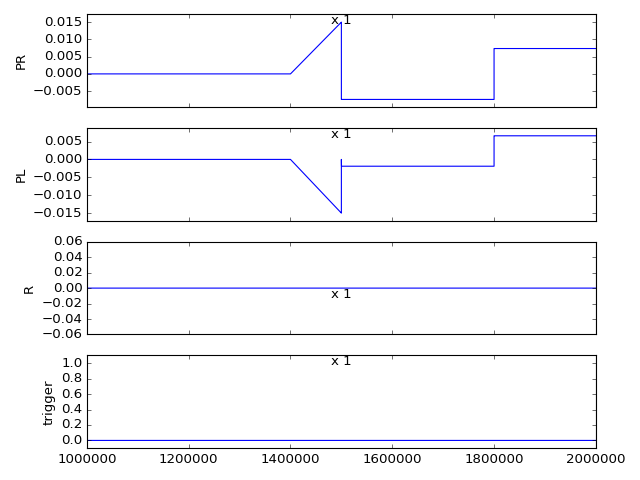

In [147]:
# for T+, Modified in 2018_93_16, with np.array

Mes = np.array([-0.8784, -0.3985])
Met = np.array([-0.8858, -0.4004])#([-0.8841, -0.4025])
Ej =  np.array([-0.8866, -0.3971])

In = np.array([-0.7448, -0.2742])

evol_times = np.linspace(0, 10, 2) #ns
cycle_time = 1000e+3
ramp_time =  100e3
#Init = 
Evol = (0.015, -0.015)
Eject =(0.,0.) #Ej - Mes                  #(0., 0.) #In - Me
Meas = (0.00,  0.00)

Meta = Met - Mes

w.AWG.t_sample = 5

if w.AWG.t_sample > evol_times[1]-evol_times[0]:
    print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

all_ch.refresh()
for evol_time in evol_times:
    duty_time = ramp_time + evol_time

    trigger.excurse(1000, to = 1.)
    detuning.dwell(0.05*cycle_time, at = Meas)
    detuning.dwell(0.15*cycle_time, at = Eject)
    detuning.dwell(0.3*cycle_time - ramp_time, at = Meas)

    detuning.ramp(ramp_time, _from = Meas, to = Evol)
#    detuning.ramp(ramp_time, _from = Evol, to = Meta)
#    detuning.dwell(evol_time, at = Evol)
#    detuning.ramp(ramp_time, _from = Evol, to = Meas)
    detuning.dwell(10, at = Meas)
    detuning.dwell(0.3*cycle_time-10, at = Meta)
    detuning.compensate(0.2*cycle_time)
    all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

detuning.dwell(w.AWG.t_sample*2400, at=0.)
all_ch.section(repeat=np.inf)
all_ch.compose()

all_ch.load_seq()
w.AWG.jump(-1)
w.AWG._OPC()

#w.AWG.t_sample = 0.5
#evol_times = np.arange(0, 40, 2)
#send_ST0_pulses(evol_times, ramp_time = 100,  Init = (0.01, -0.01), Evol = (0.050, -0.050))
# evol_times = np.linspace(0, 40, 41)
# send_ST0_pulses(evol_times = evol_times, cycle_time = 20e+3, ramp_time = 50, Eject = (0.0036, 0.0024),
#                 Meas = (0.00,  0.00), Init = (0.007, -0.007), Evol = (0.060, -0.060))
all_ch.show(1)
time_label = 'dwell'

<IPython.core.display.Javascript object>


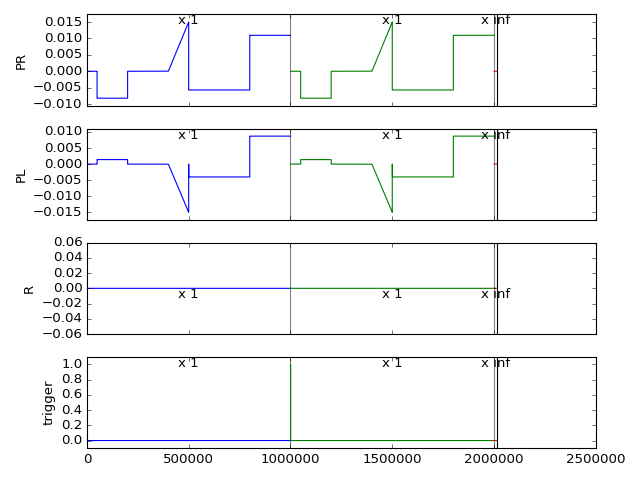

In [139]:
all_ch.show()

###  SWAP

In [356]:
(w.PR,w.PL) = np.array([-0.3590,-0.9279])
Me_po = np.array([-0.3590,-0.9279])

In [358]:
Cent_po = np.array([-0.3646,-0.9226])
Me_po - Cent_po

array([ 0.0056, -0.0053])

In [357]:
Me_po

array([-0.359 , -0.9279])

Loading the sequence into AWG (TCPIP::192.168.1.7::4000::SOCKET)
Waveforms generated in 0.07 and sent in 7.05
Waveforms generated in 0.09 and sent in 7.00
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 7.80 seconds


<IPython.core.display.Javascript object>


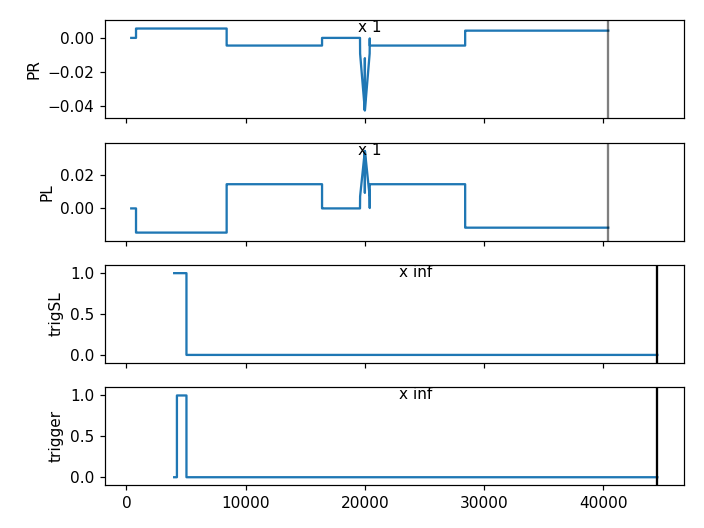

In [13]:
#for SWAP oscillation, Modified from ST0, in 2018_05_10

# triggers


def send_SWAP_pulses(evol_times, #ns
                    cycle_time = 1000e+3,
                    ramp_time =  100,
                    Init = (0.010, -0.010),
                    Evol = (0.030, -0.030),
                    Eject = (-0.001, 0.005),
                    Medi = (0.0, 0.0),
                    Read = (0.0, 0.0),
                    SAP = 0.,
                    wait =0.,
                    RAP = 0.,
                    Meas = (0.00,  0.00)):
    if w.AWG.t_sample > evol_times[1]-evol_times[0]:
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    #AWGMA
#     triggers.refresh()
#     triggers.dwell(w.AWGMA.t_sample*400, at=(0.,0.)) # w.AWGMA.t_sample*800
#     triggers.section(repeat=np.inf)
    
#     t_delay =  216 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  180 + 128 * w.AWG.t_sample
#     triggers.dwell(t_delay,      at = (0.,1.))
#     triggers.dwell(800, at = (1., 1.))
#     triggers.dwell(cycle_time - 800 - t_delay + (840 * w.AWG.t_sample + 190.), at =(0., 0.)) #  - 8.
#     triggers.section(repeat=np.inf)

    #AWGSL
    detuning.refresh()
    detuning.dwell(w.AWG.t_sample*1000, at=(0., 0.))  # w.AWG.t_sample*2400
    detuning.section(wait = False, repeat=np.inf)  
    
    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time + 2*RAP + 2*SAP + 2*wait

        #detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.01*cycle_time, at = Meas)
        detuning.dwell(0.19*cycle_time, at = Eject)
        detuning.dwell(0.2*cycle_time, at = Read)        
        detuning.dwell(0.1*cycle_time - duty_time, at = Meas)

        detuning.ramp(ramp_time, _from = Meas, to = Medi)
        detuning.ramp(SAP, _from = Medi, to = Init)
        detuning.dwell(wait, at = Init)
        detuning.ramp(RAP, _from = Init, to = Evol)
        detuning.dwell(evol_time, at = Evol)
        detuning.ramp(RAP, _from = Evol, to = Init)
        detuning.dwell(wait, at = Init)
        detuning.ramp(SAP, _from = Init, to = Medi)
        detuning.ramp(ramp_time, _from = Medi, to = Meas)

        detuning.dwell(0.2*cycle_time, at = Read)
        detuning.compensate(0.3*cycle_time)

        detuning.section(wait = True, go_to = None if evol_time < max(evol_times) else 1)

#     triggers.compose()
#     triggers.load_seq()
    detuning.compose()
    detuning.load_seq()  
#     all_ch.compose()
#     all_ch.load_seq()
    
    w.AWG.jump(0)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
#     w.AWGMA.jump(0)
#     w.AWGMA._OPC() 


Cent_po = np.array([-0.3522,-0.9671])
Me_po   = Cent_po+ np.array([0.0045,-0.0025]) #Cent_po + np.array([0.0010,0.0051]) # np.array([-0.0011,0.0101])
Re_po   = Cent_po+ np.array([0.00, 0.0120]) #np.array([-0.3519,-0.9544])  # Me_po    #Cent_po + np.array([ 0.0033, 0.0057]) # np.array([ 0.0015,0.0120])

Init_vec = np.array([-0.038, 0.032])  # ([-0.038, 0.030])                # relative to center position cent_po

Init = Cent_po - Me_po + Init_vec
Ej_po = Cent_po + np.array([0.010, -0.017])    # np.array([-0.3430, -0.9818]) 
Eject = Ej_po - Me_po #Cent_po - Me_po + np.array([0.006, -0.016]) # 0.017, -0.005, [-0.0104, -0.0002], 
Medi = Cent_po - Me_po + np.array([-0.0045, 0.0045])  #np.array([0.0043, -0.004])             #np.array([0.0018, -0.0038]) #Med - Me
Meas = (0.00,  0.00)
Read = Re_po - Me_po
Evol = Cent_po - Me_po + np.array([-1.0, 1.0])*0.004

w.AWGMA.t_sample = 10.
w.AWG.t_sample = 0.4
evol_times = np.linspace(0, 40., 101)
cycle_time = 40e3

# triggers
triggers.refresh()
triggers.dwell(w.AWGMA.t_sample*400, at=(0.,0.)) # w.AWGMA.t_sample*800
triggers.section(repeat=np.inf)

t_delay =  216 + 128 * w.AWG.t_sample if w.AWG.t_sample > 0.5 else  180 + 128 * w.AWG.t_sample
triggers.dwell(t_delay,      at = (0.,1.))
triggers.dwell(800, at = (1., 1.))
triggers.dwell(cycle_time - 800 - t_delay + (840 * w.AWG.t_sample + 180.), at =(0., 0.)) #  - 8.
triggers.section(repeat=np.inf)

triggers.compose()
triggers.load_seq()
w.AWGMA.jump(0)
w.AWGMA._OPC()

send_SWAP_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = 6., Eject = Eject, RAP = 2.0, SAP = 400., wait = 0.8,
                 Meas = Meas, Init = Init, Read = Read, Evol = Evol, Medi = Medi) # ramp 8, rap 2.0, sap 400

all_ch.show(1)
time_label = 'dwell'

In [3]:
print w.AWG.errors

[u'1']


In [6]:
cmd = "SYSTem:ERRor?"
res = w.AWG.safe_query(cmd)
print res

0,"No error"


<IPython.core.display.Javascript object>


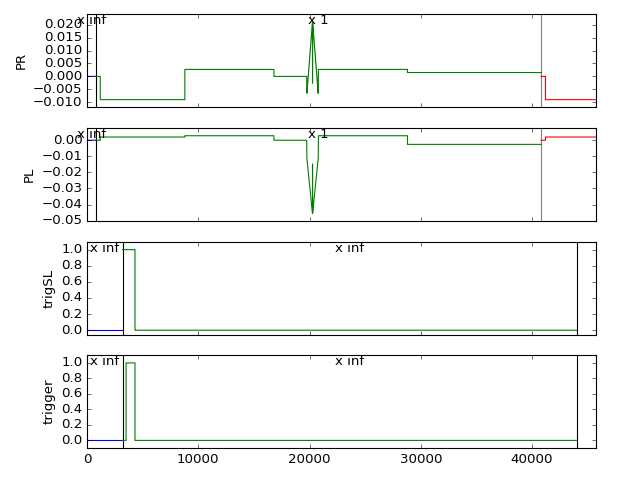

In [31]:
all_ch.show()

In [31]:
np.array([1,-1.3])*np.linspace(0,10,11).reshape(11,1)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
#for SWAP
def send_SWAP_pulses(evol_times, #ns
                     cycle_time = 200e+3,
                     ramp_time =  100,
                     Init = (0.050, -0.050),
                     Evol = (0.010, -0.010),
                     Meas = (0.00,  0.00)):
    if w.AWG.t_sample > evol_times[1]-evol_times[0]:
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.5*cycle_time - duty_time, at = Meas)

        detuning.ramp(ramp_time, _from = Meas, to = Init)
        detuning.dwell(evol_time, at = Evol)
        detuning.ramp(ramp_time, _from = Init, to = Meas)

        detuning.dwell(0.5*cycle_time, at = Meas)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC()

w.AWG.t_sample = 0.5
evol_times = np.arange(0, 50, 0.5)
send_SWAP_pulses(evol_times)
all_ch.show(1)
time_label = 'exchange'

SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.500000
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.000000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.500000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.500000
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.000000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.500000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.500000
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.000000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.500000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.500000
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.000000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.500000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.500000
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.000000
SOURce1:MARKer1:VOLTage:LEVel:Low -0.500000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.500000
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.0

<IPython.core.display.Javascript object>


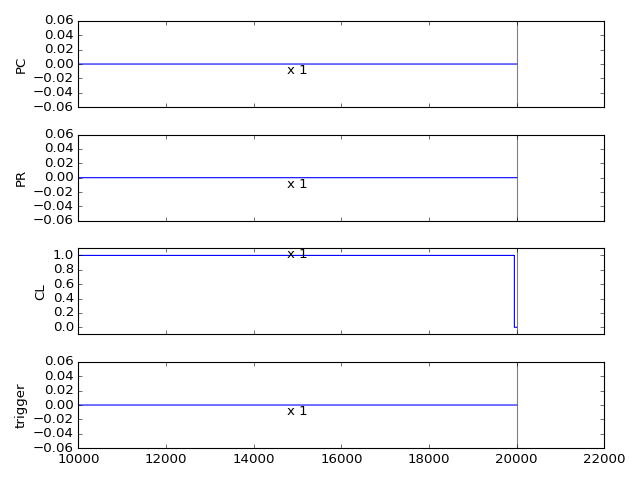

In [477]:

def set_barrier_high(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, dev_value/1.)
    print cmd
    w.AWG.safe_write(cmd)
def set_barrier_low(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, dev_value/1.)
    print cmd2
    w.AWG.safe_write(cmd2)  

# Positive pulse


def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Medi  = (0.00, 0.00),
                     Init  = (0.01, -0.01),
                     Comp  = (0.00,  0.00),
                     Meas  = (0.00,  0.00),
                     Eject = (0.0, 0.00),
                     Close = 0.0,
                     Open  = 1.0):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for n,evol_time in enumerate(evol_times):
        if n%2 == 0:
            set_barrier_high(0.5)
            set_barrier_low(0.0)
            barrier.dwell(0.5*cycle_time - evol_time, at = Close)
            barrier.dwell(evol_time, at = Open)
        else:
            set_barrier_high(0.0)
            set_barrier_low(-0.5)
            barrier.dwell(0.5*cycle_time - evol_time, at = Open)
            barrier.dwell(evol_time, at = Close)            
#         detuning.dwell(0.35*cycle_time - 1.0*evol_time - 1.5 * adia_time, at = Meas)
#         detuning.dwell(1.0 * evol_time, at = [-1.0*i for i in Comp])
#         detuning.dwell(1.5 * adia_time, at = [-1.0*i for i in Init])
#       detuning.dwell(evol_time, at = [-1.0*i for i in Init])       # why use a for loop?
#       detuning.dwell(0.1*cycle_time, at = Meas)
#         detuning.dwell(0.10*cycle_time, at = [-1.0*e for e in Eject])  # why 0.5 Eject
#         detuning.dwell(0.05*cycle_time, at = Meas)
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*3200, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations
    print "Comp =",Comp

w.AWG.t_sample = 1
evol_times = np.linspace(0., 1e3, 20)
send_ramp_pulses(evol_times = evol_times, cycle_time = 20e3, ramp_time = 20, adia_time = 1000, 
                 Meas = (0.00, 0.00), Medi = (0.0070, -0.0079), Init = (0.0430, -0.0439), 
                 Comp = (0.0, -0.04), Eject = (0.0030, 0.0015), Close = 0.0, Open = 1.0)
all_ch.show(1)
time_label = 'dwell'
#print Comp

<IPython.core.display.Javascript object>


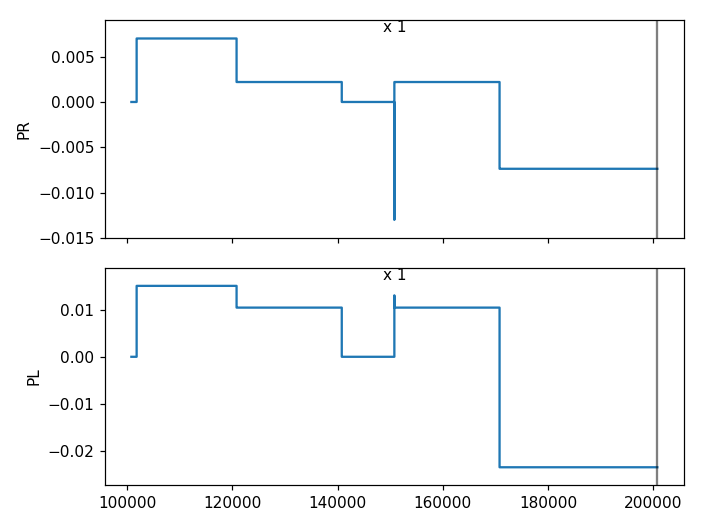

In [1184]:
detuning.show(2)

In [385]:
w.AWG.jump(-1)

# Measurements

In [3]:
print w.check()
# w.PR.val, w.PC.val = (0.2823, -0.0549)
# #w.PR.val, w.PC.val = (0.032, -0.05)
# #w.CL.val = -1.25
# #w.SC = -0.450
# print w.check()
# print time_label

READ:DEV:GRPZ:PSU:SIG:SWHT STAT:SET:DEV:GRPZ:PSU:ACTN:HOLD:VALID


Exception: Communication error

In [88]:
w.Bext.val = 0.0  #.check()#val = 0.2 #pipipupipo
w.Bext.check()

-0.0001

In [160]:
w.SMU.voltage.val = 0.0

In [74]:
w.PR.val, w.PL.val = (-0.540, -0.715)
w.check()

'L = -0.21 V, PL = -0.715 V, T = -0.19 V, PR = -0.54 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.225 V, SR = -0.728 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=-0.200000'

In [75]:
for t_meas in [0.,10.]:
    
    config_CDS = {'meas_offset': 501*us_pnts, 'meas_samples': 4.*us_pnts,   #4.*us_pnts,
                    'ref_offset': 11*us_pnts,  'ref_samples': t_meas*us_pnts}  #10.*us_pnts
    #config_CDS = {'meas_offset': 501*us_pnts, 'meas_samples': 100*us_pnts,}
    #config_CDS = {'meas_offset': 50*us_pnts, 'meas_samples': 30*us_pnts,}

    def scan(var_rng_list, num_recs = 1, relative = False, triggered = False):
        max_dim = 4
        if len(var_rng_list) > max_dim:
            raise Exception('Not implemented')

        callback_funcs = [lambda:None,]*(max_dim - len(var_rng_list))
        for ax, var_rng in enumerate(var_rng_list):
            var_rng_list[ax] = (var_rng[0], var_rng[1] + (var_rng[0].val if relative else 0.),)
            if len(var_rng) > 2:
                callback_funcs.append(var_rng[2])
            else:
                callback_funcs.append(lambda: None)

        original_values = [var.val for var, rng in var_rng_list]
        def change_var(dim, value):
            if dim <= len(var_rng_list):
                var, rng = var_rng_list[-dim]
                var.val = value 

        try:
            with ex.data_store(comment=w.status) as d:
                for var, rng in var_rng_list:
                    d.axis(rng, var = var)
                d.storage('Vrf', units = 'V', noplot = True)
                d.storage('dVrf', units = 'V')

                for var4 in d.loop() if len(var_rng_list) >= 4 else range(1):
                    change_var(4, var4)
                    callback_funcs[-4]()
                    for var3 in d.loop() if len(var_rng_list) >= 3 else range(1):
                        change_var(3, var3)
                        callback_funcs[-3]()
                        for var2 in d.loop() if len(var_rng_list) >= 2 else range(1):
                            change_var(2, var2)
                            callback_funcs[-2]()
                            vrf_arr = np.ones(numpnts(d, -1))*np.nan
                            with w.Vrf.start(time_average=True, record_average = True, triggered=triggered, dmm = True,
                                             recs_per_block = num_recs, **config_CDS):
                                try:
                                    for var1_index, var1 in enumerate(d.loop()):
                                        change_var(1, var1)
                                        callback_funcs[-1]()
                                        if var1_index == 0:
                                            sleep(0.1)
                                        vrf_arr[var1_index] = w.Vrf.val
                                except TypeError:
                                    print 'TypeError occurred.'
                                d.put(vrf_arr, name = 'Vrf')
                                d.put(np.append(np.nan, np.diff(vrf_arr)/np.diff(var_rng_list[-1][1])), name = 'dVrf')
        finally:
            for var_index in range(len(var_rng_list)):
                var, rng = var_rng_list[var_index]
                var.val = original_values[var_index]

    def maximize_dVrf(var = w.SC, rng = np.linspace(0.3, -0.3, 301), notify = False):
        var.val = rng[0]
        sleep(0.2)
        vrf_arr = np.ones(len(rng))*np.nan
        with w.Vrf.start(time_average=True, record_average = True, triggered=False, dmm=True, meas_samples=20e+6/8./10, recs_per_block=10):
            for var_index, var_val in enumerate(rng):
                var.val = var_val
                vrf_arr[var_index] = w.Vrf.val
        max_index = np.nanargmax(np.abs(np.diff(vrf_arr)))
        var.val = rng[max_index]
        if max_index in (0, len(rng)-1):
            print 'maximize_dVrf sets %s. You may want to expand the range.'%(var.status.replace('=', 'to'))
        elif notify:
            print var.status.replace('=', 'was set to')        



      # two
    gate_y, gate_x = w.PL, w.PR

    dV, pnts = 0.24, 241

    var_rng_list = [(gate_y, gate_y.val + np.linspace(0.5, -0.5, pnts)*dV),
                    (gate_x, gate_x.val + np.linspace(0.5, -0.5, pnts)*dV)]
    # var_rng_list = [(gate_y, gate_y.val - 1.1 *(w.CL.val + 1.06) + np.linspace(0.5, -0.5, pnts)*dV),
    #                 (gate_x, gate_x.val + 0.25 *(w.CL.val + 1.06) + np.linspace(0.5, -0.5, pnts)*dV)]

    # var_rng_list = [(w.CL, np.linspace(-1.06, -1.10, 5)),] + var_rng_list
    #maximize_dVrf(notify = True)
    #print var_rng_list
    #var_rng_list = [(w.SC, np.linspace(-0.2, -0.5, 301)),]
    print w.check()

    w.AWG.jump(1)
    w.AWGMA.jump(1)

    scan(var_rng_list, num_recs = 10, triggered = True)

    w.AWG.jump(0)
    w.AWGMA.jump(0)

L = -0.21 V, PL = -0.715 V, T = -0.19 V, PR = -0.54 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.225 V, SR = -0.728 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=-0.200000
(240, :) done.
Closed 190822172937
L = -0.21 V, PL = -0.715 V, T = -0.19 V, PR = -0.54 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.225 V, SR = -0.728 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=-0.200000
(240, :) done.
Closed 190822174859


In [76]:
num = np.linspace(1.,2.,2)
print num

[1. 2.]


In [ ]:
# repeat scanning stability

#num = np.linspace(0.,5.,1)
bvals = np.array([0.04, 0.1, 0.2, 0.3, 0.4])
num = np.array([4., 10.])
for bval in bvals:
    w.Bext.val = bval
    sleep(5.0)
    for t_n in num:
        
        

    #     config_CDS = {'meas_offset': 501*us_pnts, 'meas_samples': 5*us_pnts,
    #                     'ref_offset': 61*us_pnts,  'ref_samples': 5*us_pnts}
        config_CDS = {'meas_offset': 501*us_pnts, 'meas_samples': t_n*us_pnts,
                        'ref_offset': 51*us_pnts,  'ref_samples': 10.*us_pnts}

        def scan(var_rng_list, num_recs = 1, relative = False, triggered = False):
            max_dim = 4
            if len(var_rng_list) > max_dim:
                raise Exception('Not implemented')

            callback_funcs = [lambda:None,]*(max_dim - len(var_rng_list))
            for ax, var_rng in enumerate(var_rng_list):
                var_rng_list[ax] = (var_rng[0], var_rng[1] + (var_rng[0].val if relative else 0.),)
                if len(var_rng) > 2:
                    callback_funcs.append(var_rng[2])
                else:
                    callback_funcs.append(lambda: None)

            original_values = [var.val for var, rng in var_rng_list]
            def change_var(dim, value):
                if dim <= len(var_rng_list):
                    var, rng = var_rng_list[-dim]
                    var.val = value 

            try:
                with ex.data_store(comment=w.status) as d:
                    for var, rng in var_rng_list:
                        d.axis(rng, var = var)
                    d.storage('Vrf', units = 'V', noplot = True)
                    d.storage('dVrf', units = 'V')

                    for var4 in d.loop() if len(var_rng_list) >= 4 else range(1):
                        change_var(4, var4)
                        callback_funcs[-4]()
                        for var3 in d.loop() if len(var_rng_list) >= 3 else range(1):
                            change_var(3, var3)
                            callback_funcs[-3]()
                            for var2 in d.loop() if len(var_rng_list) >= 2 else range(1):
                                change_var(2, var2)
                                callback_funcs[-2]()
                                vrf_arr = np.ones(numpnts(d, -1))*np.nan
                                with w.Vrf.start(time_average=True, record_average = True, triggered=triggered, dmm = True,
                                                 recs_per_block = num_recs, **config_CDS):
                                    try:
                                        for var1_index, var1 in enumerate(d.loop()):
                                            change_var(1, var1)
                                            callback_funcs[-1]()
                                            if var1_index == 0:
                                                sleep(0.1)
                                            vrf_arr[var1_index] = w.Vrf.val
                                    except TypeError:
                                        print 'TypeError occurred.'
                                    d.put(vrf_arr, name = 'Vrf')
                                    d.put(np.append(np.nan, np.diff(vrf_arr)/np.diff(var_rng_list[-1][1])), name = 'dVrf')
            finally:
                for var_index in range(len(var_rng_list)):
                    var, rng = var_rng_list[var_index]
                    var.val = original_values[var_index]

        def maximize_dVrf(var = w.SC, rng = np.linspace(0.3, -0.3, 301), notify = False):
            var.val = rng[0]
            sleep(0.2)
            vrf_arr = np.ones(len(rng))*np.nan
            with w.Vrf.start(time_average=True, record_average = True, triggered=False, dmm=True, meas_samples=20e+6/8./10, recs_per_block=10):
                for var_index, var_val in enumerate(rng):
                    var.val = var_val
                    vrf_arr[var_index] = w.Vrf.val
            max_index = np.nanargmax(np.abs(np.diff(vrf_arr)))
            var.val = rng[max_index]
            if max_index in (0, len(rng)-1):
                print 'maximize_dVrf sets %s. You may want to expand the range.'%(var.status.replace('=', 'to'))
            elif notify:
                print var.status.replace('=', 'was set to')        

        gate_y, gate_x = w.PL, w.PR

        dV, pnts = 0.12, 301

        var_rng_list = [(gate_y, gate_y.val + np.linspace(0.5, -0.5, pnts)*dV),
                        (gate_x, gate_x.val + np.linspace(0.5, -0.5, pnts)*dV)]
        # var_rng_list = [(gate_y, gate_y.val - 1.1 *(w.CL.val + 1.06) + np.linspace(0.5, -0.5, pnts)*dV),
        #                 (gate_x, gate_x.val + 0.25 *(w.CL.val + 1.06) + np.linspace(0.5, -0.5, pnts)*dV)]

        # var_rng_list = [(w.CL, np.linspace(-1.06, -1.10, 5)),] + var_rng_list
        #maximize_dVrf(notify = True)
        #print var_rng_list
        #var_rng_list = [(w.SC, np.linspace(-0.2, -0.5, 301)),]
        print w.check()
        w.AWG.jump(1)
        w.AWGMA.jump(1)

        scan(var_rng_list, num_recs = 20, triggered = True)

        w.AWG.jump(0)
        w.AWGMA.jump(0)
        sleep(1.0)

L = -0.75 V, PL = -0.189 V, T = -0.5 V, PR = -0.8 V, R = 0.2 V, C1 = -0.8 V, C2 = 0. V, SL = -1.31 V, SC = -0.407 V, SR = -0.7 V, rf(rf.frequency=207.500000, rf.power=14.500000), Vps=5.100000, AWG(), AWGMA(), Bext=0.040000
(300, :) done.
Closed 181115214230
L = -0.75 V, PL = -0.189 V, T = -0.5 V, PR = -0.8 V, R = 0.2 V, C1 = -0.8 V, C2 = 0. V, SL = -1.31 V, SC = -0.407 V, SR = -0.7 V, rf(rf.frequency=207.500000, rf.power=14.500000), Vps=5.100000, AWG(), AWGMA(), Bext=0.040000
(300, :) done.
Closed 181115221704
L = -0.75 V, PL = -0.189 V, T = -0.5 V, PR = -0.8 V, R = 0.2 V, C1 = -0.8 V, C2 = 0. V, SL = -1.31 V, SC = -0.407 V, SR = -0.7 V, rf(rf.frequency=207.500000, rf.power=14.500000), Vps=5.100000, AWG(), AWGMA(), Bext=0.100000
(300, :) done.
Closed 181115225245
L = -0.75 V, PL = -0.189 V, T = -0.5 V, PR = -0.8 V, R = 0.2 V, C1 = -0.8 V, C2 = 0. V, SL = -1.31 V, SC = -0.407 V, SR = -0.7 V, rf(rf.frequency=207.500000, rf.power=14.500000), Vps=5.100000, AWG(), AWGMA(), Bext=0.100000
(30

In [213]:
# 3D sweep, changing range
dV, pnts = 0.05, 21

PC_init, PR_init = w.PC.val, w.PR.val

with ex.data_store(comment=w.status) as d:
    d.axis(np.linspace(-1.10, -1.09, 5), var = w.CL)
    d.axis(np.linspace(0.5, -0.5, pnts)*dV, var = 'delta PC')
    d.axis(np.linspace(0.5, -0.5, pnts)*dV, var = 'delta PR')
    d.storage('Vrf', units = 'V', noplot = False)
    #d.storage('dVrf', units = 'V')
    
    for w.CL.val in d.loop():
        for delta_PC in d.loop():
            w.PC.val = PC_init - 1.1 *(w.CL.val + 1.10) + delta_PC
            
            for delta_PR in d.loop():
                w.PR.val = PR_init + 0.25 *(w.CL.val + 1.10) + delta_PR
                
                with w.Vrf.start(time_average=True, record_average = True, triggered=False, dmm = True,
                                 recs_per_block = 10):
                    sleep(0.05)
                    d.put(w.Vrf.val, name = 'Vrf')

w.PC.val, w.PR.val = PC_init, PR_init

(4, 20, 20) done.Reopened 170714134241.h5 in read-only mode


In [133]:
#gate dependnece Copy

gate = [w.SC, 'PC-PR'][0]
drng = [np.linspace(0.002, -0.002, 9), np.linspace(0.0, -0.012,13)][0]
num_recs   = 500

if time_label == 'evolution':
    config_CDS = {'meas_offset': 501*us_pnts, 'meas_samples': 6*1.234567*us_pnts,
                  'ref_offset':  1*us_pnts, 'ref_samples': 40*1.234567*us_pnts}
# if time_label == 'dwell':
#     config_CDS = {'meas_offset': 201*us_pnts, 'meas_samples': 10*us_pnts,
#                    'ref_offset': 81*us_pnts, 'ref_samples': 10*us_pnts}
if time_label == 'dwell':
    config_CDS = {'meas_offset': 501*us_pnts, 'meas_samples': 10*us_pnts,
                   'ref_offset': 1*us_pnts, 'ref_samples': 10*us_pnts}
    

with ex.data_store(diskless=False) as d:
    if gate == 'PC-PR':
        d.axis(drng + w.PC.val, var = w.PC)
        d.axis(drng + w.PR.val, var = w.PR)
        chunksizes = (len(drng), len(drng),  num_recs, len(evol_times))
    else:
        d.axis(drng + gate.val, var=gate)
        chunksizes = (len(drng), num_recs, len(evol_times))
    d.axis(np.arange(num_recs), var="rec")
    d.axis(evol_times, var="%s time"%time_label, units="ns")
    d.storage('Vrf', chunksizes= chunksizes)
    d.setup_plot(live_plot=False)
    
    for w.PC.val in d.loop() if gate == 'PC-PR' else [w.PC.val,]:
        for gval in d.loop():
            if gate == 'PC-PR':
                w.PR.val = gval
            else:
                gate.val = gval

            with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                             num_blocks=3, recs_per_block=len(evol_times)*num_recs,
                             **config_CDS):
                sleep(0.5)
                w.AWG.jump(0)
                for _ in range(2):
                    w.Vrf.val #wait for capacitor charge up
                d.put(w.Vrf.val.reshape(num_recs,len(evol_times)))
                w.AWG.jump(-1)

In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 171006170322
(10, slice(None, None, None), slice(None, None, None)) done.Reopened 171006171201.h5 in read-only mode


In [121]:
#w.PR.val, w.PC.val = (0.2305,-0.1228)
#w.PR.val, w.PC.val = (0.218,-0.142)
w.PR.val, w.PL.val = (-0.5649,-1.1018)
#w.SC.val = -0.442
print w.check()
#print time_label

L = -0.17 V, PL = -1.1018 V, T = -0.07 V, PR = -0.5649 V, R = -0.81 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.215 V, SR = -0.725 V, G1 = 0. V, G2 = 0. V, rf(rf.frequency=204.800000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=-0.200000


### single shot

In [304]:
## simple time trace repeated
(w.PR, w.PL) = Me_po
sleep(1.)

n_average   = 1
n_indeces   = 1000
if time_label == 'dwell':
    config_CDS = {'meas_offset': 50.2*us_pnts, 'meas_samples': 16.*us_pnts,
                   'ref_offset': 20.2*us_pnts,  'ref_samples': 16.*us_pnts}   # For T+ test, ref_samp = 0 turns off CDS
# if time_label == 'dwell':
#     config_CDS = {'meas_offset': 80.2*us_pnts, 'meas_samples': 30*us_pnts,
#                    'ref_offset': 24.2*us_pnts,  'ref_samples': 30*us_pnts}
# if time_label == 'evolution':
#     config_CDS = {'meas_offset': 501*us_pnts, 'meas_samples': 400*us_pnts,
#                   'ref_offset':    1*us_pnts, 'ref_samples':  400*us_pnts}

time_axis = np.arange(int(config_CDS['meas_samples']))*8  # 

with ex.data_store(diskless = False) as d:
    d.axis(np.arange(n_indeces), var = 'repeat')
    d.axis(time_axis, var = 'time (ns)')
    d.storage('Vrf', units = 'V')

    with w.Vrf.start(time_average = False, dmm = False, triggered = True, record_average = False,
                     recs_per_block=n_average*n_indeces,
                     **config_CDS):
        sleep(0.5)
        w.AWG.jump(1)
        w.AWGMA.jump(1)
        d.put(w.Vrf.val.reshape(n_average, n_indeces, -1).mean(axis = 0))
        w.AWG.jump(0)
        w.AWGMA.jump(0)

In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
(:, :) done.  
Closed 190110205238


In [21]:
#### w.SL.val = -0.
w.SC.val = -0.3175
print w.check()

L = -0.58 V, PL = -0.498 V, T = -0.37 V, PR = -0.9635 V, R = 0. V, C1 = -0.79 V, C2 = 0. V, SL = -1.2 V, SC = -0.3175 V, SR = -0.69 V, rf(rf.frequency=204.600000, rf.power=14.500000), Vps=0.600000, SMU(SMU.voltage=0.000000), AWG(), Bext=0.100000


In [122]:
## simple time trace repeated
n_average   = 1
n_indeces   = 1000
if time_label == 'dwell':
    config_CDS = {'meas_offset': 501.*us_pnts, 'meas_samples': 80.*us_pnts,
                   'ref_offset': 11.*us_pnts,  'ref_samples': 80.*us_pnts}   # For T+ test, ref_samp = 0 turns off CDS
# if time_label == 'dwell':
#     config_CDS = {'meas_offset': 80.2*us_pnts, 'meas_samples': 30*us_pnts,
#                    'ref_offset': 24.2*us_pnts,  'ref_samples': 30*us_pnts}
# if time_label == 'evolution':
#     config_CDS = {'meas_offset': 501*us_pnts, 'meas_samples': 400*us_pnts,
#                   'ref_offset':    1*us_pnts, 'ref_samples':  400*us_pnts}

time_axis = np.arange(int(config_CDS['meas_samples']))*8  # 

with ex.data_store(diskless = False) as d:
    d.axis(np.arange(n_indeces), var = 'repeat')
    d.axis(time_axis, var = 'time (ns)')
    d.storage('Vrf', units = 'V')

    with w.Vrf.start(time_average = False, dmm = False, triggered = True, record_average = False,
                     recs_per_block=n_average*n_indeces,
                     **config_CDS):
        sleep(0.5)
        w.AWG.jump(1)
        w.AWGMA.jump(1)
        d.put(w.Vrf.val.reshape(n_average, n_indeces, -1).mean(axis = 0))
        w.AWG.jump(0)
        w.AWGMA.jump(0)

In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
(:, :) done.  
Closed 190813215446


In [63]:
#simple time trace repeated
n_average   = 1
n_indeces   = 1000
if time_label == 'dwell':
    config_CDS = {'meas_offset': 51*us_pnts, 'meas_samples': 9.0*us_pnts}
                   #'ref_offset': 161*us_pnts,  'ref_samples': 100*us_pnts}   # For T+ test
# if time_label == 'dwell':
#     config_CDS = {'meas_offset': 80.2*us_pnts, 'meas_samples': 30*us_pnts,
#                    'ref_offset': 24.2*us_pnts,  'ref_samples': 30*us_pnts}
# if time_label == 'evolution':
#     config_CDS = {'meas_offset': 501*us_pnts, 'meas_samples': 400*us_pnts,
#                   'ref_offset':    1*us_pnts, 'ref_samples':  400*us_pnts}

time_axis = np.arange(int(config_CDS['meas_samples']))*8  # 

with ex.data_store(diskless = False) as d:
    d.axis(np.arange(n_indeces), var = 'repeat')
    d.axis(time_axis, var = 'time (ns)')
    d.storage('Vrf', units = 'V')

    with w.Vrf.start(time_average = False, dmm = False, triggered = True, record_average = False,
                     recs_per_block=n_average*n_indeces,
                     **config_CDS):
        sleep(0.5)
        w.AWG.jump(0)
        d.put(w.Vrf.val.reshape(n_average, n_indeces, -1).mean(axis = 0))
        w.AWG.jump(-1)

In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180410151513
(slice(None, None, None), slice(None, None, None)) done.Reopened 180410151710.h5 in read-only mode


In [25]:
#simple time trace repeated 2 
n_average   = 1
n_indeces   = 1000
if time_label == 'dwell':
    config_CDS = {'meas_offset': 0.25*us_pnts, 'meas_samples': 0.05*us_pnts,
                   'ref_offset': 0.02*us_pnts,  'ref_samples': 0.05*us_pnts}
if time_label == 'evolution':
    config_CDS = {'meas_offset': 501*us_pnts, 'meas_samples': 400*us_pnts,
                  'ref_offset':    1*us_pnts, 'ref_samples':  400*us_pnts}

time_axis = np.arange(int(config_CDS['meas_samples']))*8  # 

with ex.data_store(diskless = False) as d:
    d.axis(np.arange(n_indeces), var = 'repeat')
    d.axis(time_axis, var = 'time (ns)')
    d.storage('Vrf', units = 'V')

    with w.Vrf.start(time_average = False, dmm = False, triggered = True, record_average = False,
                     recs_per_block=n_average*n_indeces,
                     **config_CDS):
        sleep(0.5)
        w.AWG.jump(0)
        d.put(w.Vrf.val.reshape(n_average, n_indeces, -1).mean(axis = 0))
        w.AWG.jump(-1)

In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 170419213257
(slice(None, None, None), slice(None, None, None)) done.Reopened 170419213906.h5 in read-only mode


SOURce1:MARKer1:VOLTage:LEVel:HIGH 1.300000
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
Loading the sequence into AWG (TCPIP::192.168.1.11)  in 0.85 seconds


<IPython.core.display.Javascript object>


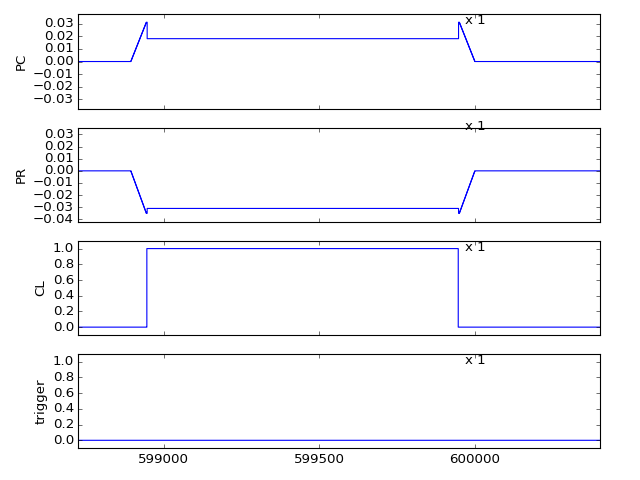

In [160]:
# Pulse Barrier with PC/PR compensation ,   ------------  one step RAP then Comp

def set_barrier_high(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd = "SOURce%d:MARKer%d:VOLTage:LEVel:HIGH %f"%(ch_num, marker_num, dev_value/0.01)
    print cmd
    w.AWG.safe_write(cmd)
def set_barrier_low(dev_value):
    ch_num, marker_num = 1, 1
    if dev_value <-1.4 or dev_value > 1.4:
        raise Exception("The marker high voltage level should be (-1.4, 1.4).")
    cmd2 = "SOURce%d:MARKer%d:VOLTage:LEVel:Low %f"%(ch_num, marker_num, dev_value/0.01)
    print cmd2
    w.AWG.safe_write(cmd2)  

# Positive pulse
amp = 0.005
set_barrier_high(amp)
set_barrier_low(0.0)

PC_Com = -1.003 * amp
PR_Com = 0.310 * amp
    
def send_ramp_pulses(evol_times,
                     cycle_time = 200e3,
                     ramp_time  =  40e3,
                     adia_time = 1000,
                     Meas  = (0.00,  0.00),                                         
                     Init  = ( 0.01, -0.01),
                     Comp  = (0.00,  0.00),
                     Eject = (0.0, 0.00),
                     Close = 0.00,
                     Open  = 1.00):
    if w.AWG.t_sample > (max(evol_times)-min(evol_times))/len(evol_times):
        print 'You may want to increase the AWG sampling time from %e ns'%w.AWG.t_sample

    all_ch.refresh()
    for evol_time in evol_times:
        duty_time = 2*ramp_time + evol_time + 0.1*ramp_time

        trigger.excurse(1000, to = 1.)
        detuning.dwell(0.05*cycle_time, at = Meas)
        detuning.dwell(0.10*cycle_time, at = Eject)
        detuning.dwell(0.35*cycle_time - duty_time, at = Meas)
        
        detuning.ramp(ramp_time, _from = Meas, to = Init)     
        
        detuning.dwell(0.05*ramp_time, at = Init)
        detuning.dwell(evol_time, at = Comp)        
        detuning.dwell(0.05*ramp_time, at = Init)

        detuning.ramp(ramp_time, _from = Init, to = Meas)
        
        detuning.dwell(0.35*cycle_time - 1*ramp_time - evol_time, at = Meas)
        detuning.dwell(1*ramp_time, at = [-1.0*i for i in Init])
        detuning.dwell(evol_time, at = [-1.0*i for i in Comp])       
        detuning.dwell(0.1*cycle_time, at = [-1.0*e for e in Eject])
        detuning.dwell(0.05*cycle_time, at = Meas)
        
        barrier.dwell(0.5*cycle_time - evol_time -  1.05* ramp_time - 1.0,at = Close)
        barrier.dwell(evol_time  if evol_time > 0 else 0, at = Open)
        barrier.dwell(0.5*cycle_time + 1.05* ramp_time + 1.0, at = Close)
        
        all_ch.section(go_to = None if evol_time < max(evol_times) else 0)

    detuning.dwell(w.AWG.t_sample*2400, at=0.)
    all_ch.section(repeat=np.inf)
    all_ch.compose()

    all_ch.load_seq()
    w.AWG.jump(-1)
    w.AWG._OPC() # wait for the AWG to complete all pending operations

w.AWG.t_sample = 0.5
evol_times = np.linspace(0, 100e3, 101)
send_ramp_pulses(evol_times = evol_times, cycle_time = 400e3, ramp_time = 50, adia_time = 1000, Meas = (0.00,  0.00), 
                 Init = (0.0312, -0.0350), Comp = (0.0312 + PC_Com, -0.0350 + PR_Com), Eject = (-0.007, -0.005), Close = 0.00, Open  = 1.00)
all_ch.show(1)
time_label = 'dwell'

## Evol_time dependence

### one

In [223]:
## Evol_time dependence

(w.PR, w.PL) = Me_po
sleep(1.)
num_blocks = 3
num_recs   = 400

if time_label == 'evolution' or time_label == 'dwell':
    config_CDS = {'meas_offset': 20.2*us_pnts, 'meas_samples': 4.*us_pnts,   # 50.2, 20.2, 18.2   # sample 4.0
                   'ref_offset': 8.2*us_pnts,  'ref_samples': 4.*us_pnts}   # 20.2,  8.2 , 7.4   # sample 7.2

with ex.data_store(diskless=False) as d:
    d.axis(np.arange(num_blocks), var="block")
    d.axis(np.arange(num_recs), var="rec")
    d.axis(evol_times, var="%s time"%time_label, units="ns")
    d.storage('Vrf', chunksizes=(1, num_recs, len(evol_times)), noplot=True)
    #d.setup_plot(noplot=True) # live_plot=False

    with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                     num_blocks=num_blocks+1, recs_per_block=len(evol_times)*num_recs,
                     **config_CDS):
        sleep(0.5)
        
        w.AWG.jump(1)
        w.AWGMA.jump(1)
#        w.AWG.jump(1)
#         for _ in range(1):
#             w.Vrf.val #wait for capacitor charge up
        for _ in d.loop(): #real measurement
            d.put(w.Vrf.val.reshape(num_recs,len(evol_times)))
        w.AWG.jump(0)
        w.AWGMA.jump(0)


In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
(2, :, :) done.
Closed 190814183247


In [43]:
### Evol_time dependence  ... for S-T0
(w.PR, w.PL) = Me_po
sleep(1.)
num_blocks = 140      # 100 to see lab_time freq fluctuation
num_recs   = 100

# if time_label == 'evolution' or time_label == 'dwell':
#     config_CDS = {'meas_offset':10.2*us_pnts, 'meas_samples': 5.0*us_pnts,
#                   'ref_offset': 4.2*us_pnts, 'ref_samples': 4.4*us_pnts}

if time_label == 'evolution' or time_label == 'dwell':
    config_CDS = {'meas_offset':20.2*us_pnts, 'meas_samples': 4.6*us_pnts,
                  'ref_offset': 8.2*us_pnts, 'ref_samples': 7.0*us_pnts}

with ex.data_store(diskless=False) as d:
    d.axis(np.arange(num_blocks), var="block")
    d.axis(np.arange(num_recs), var="rec")
    d.axis(evol_times, var="%s time"%time_label, units="ns")
    d.storage('Vrf', noplot = True, chunksizes=(1, num_recs, len(evol_times)))
    #d.storage('Vrf', chunksizes=(num_recs, len(evol_times)))
    #d.setup_plot(live_plot=False)

    with w.Vrf.start(time_average=True, record_average=False, triggered = True, num_blocks=num_blocks+1,
                      recs_per_block=len(evol_times)*num_recs,
                     **config_CDS):
        sleep(0.2)
        w.AWG.jump(1)
        w.AWGMA.jump(1)
        #for _ in range(1):
        #    w.Vrf.val #wait for capacitor charge up
        for _ in d.loop(): #real measurement
            d.put(w.Vrf.val.reshape(num_recs,len(evol_times)))
        w.AWG.jump(0)
        w.AWGMA.jump(0)


In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
(139, :, :) done.
Closed 190809155333


In [531]:
w.PR.val, w.PL.val = (-0.735, -0.2864) 

### SWAP

In [14]:
### Evol_time dependence  .... SWAP
(w.PR, w.PL) = Me_po  # Me_po
sleep(1.)

num_blocks = 4
num_recs   = 200

if time_label == 'evolution' or time_label == 'dwell':
    config_CDS = {'meas_offset':20.2*us_pnts, 'meas_samples': 4.6*us_pnts,  # 7.6 us
                  'ref_offset': 8.2*us_pnts, 'ref_samples': 7.6*us_pnts}

with ex.data_store(diskless=False) as d:
    d.axis(np.arange(num_blocks), var="block")
    d.axis(np.arange(num_recs), var="rec")
    d.axis(evol_times, var="%s time"%time_label, units="ns")
    d.storage('Vrf', chunksizes=(1, num_recs, len(evol_times)))   #chunksizes=(num_blocks, num_recs, len(evol_times))
    #d.storage('Vrf', chunksizes=(num_recs, len(evol_times)))
    d.setup_plot(live_plot=False)

    with w.Vrf.start(time_average=True, record_average=False, triggered = True, num_blocks=num_blocks+1,
                      recs_per_block=len(evol_times)*num_recs,
                     **config_CDS):
        sleep(0.5)
        w.AWG.jump(1)
        w.AWGMA.jump(1)
        #for _ in range(1):
        #    w.Vrf.val #wait for capacitor charge up
        for _ in d.loop(): #real measurement
            d.put(w.Vrf.val.reshape(num_recs,len(evol_times)))
        w.AWG.jump(0)
        w.AWGMA.jump(0)


In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
(3, :, :) done.
Closed 190807144007


In [53]:
#w.AWG.jump(0)
#w.AWGMA.jump(1)
evol_position = np.linspace(10., 0., 26)*0.001
print evol_position
#print dvec*evol_position[14], Read

[0.01   0.0096 0.0092 0.0088 0.0084 0.008  0.0076 0.0072 0.0068 0.0064
 0.006  0.0056 0.0052 0.0048 0.0044 0.004  0.0036 0.0032 0.0028 0.0024
 0.002  0.0016 0.0012 0.0008 0.0004 0.    ]


In [15]:
### Evol_time dependence  .... SWAP 2D -  detuning(evol position) and evol_time
(w.PR, w.PL) = Me_po  # Me_po
sleep(1.)

num_blocks = 6
num_recs   = 200  # in this measu, calc Ps along recs

if time_label == 'evolution' or time_label == 'dwell':
    config_CDS = {'meas_offset':20.2*us_pnts, 'meas_samples': 4.6*us_pnts,
                  'ref_offset': 8.2*us_pnts, 'ref_samples': 7.6*us_pnts}

dvec = np.array([-1.0, 1.0])
#int_vec = np.array([-2.0,-1.0])
evol_position = np.linspace(0., 16., 41)*0.001   # PR values
#int_position =  np.linspace(0., 10.0, 26)*0.001
#detu_position =  np.array([1., -1.0])*0.005

evol_times = np.linspace(0, 50., 126)
n_blocks = np.arange(num_blocks)
n_recs = np.arange(num_recs) 
#Medi = Cent_po - Me_po + np.array([0.0044, -0.004]) 
w.AWG.t_sample = 0.4

with ex.data_store(diskless=False) as d:
    d.axis(evol_position*1000, var="det_PR",units="mV")     # at each det_PR, store 1 bocck of len(recs)*len(evol_times)
    #d.axis(int_position*int_vec[0]*1000, var="det_PR",units="mV")     # at each det_PR, store 1 bocck of len(recs)*len(evol_times)
    d.axis(n_blocks, var="block")    
    d.axis(n_recs, var="rec")
    #d.axis(evol_position, var="det_PR")   
    d.axis(evol_times, var="%s time"%time_label, units="ns")
    d.storage('Vrf', chunksizes=(1,1,len(n_recs), len(evol_times)))
    #d.storage('Vrf', chunksizes=(num_recs, len(evol_times)))
    d.setup_plot(live_plot=False)

    for nn, _ in enumerate(d.loop()):
        sleep(1.0)
        Evol =  Cent_po - Me_po  + dvec*evol_position[nn]  # + np.array([1., -1.0])*0.006
        print Evol
        #Evol =  Cent_po - Me_po  + detu_position + int_vec*int_position[nn]  # + np.array([1., -1.0])*0.006
        send_SWAP_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = 6., Eject = Eject, RAP = 2. , SAP = 400., wait = 0.8, 
                         Meas = Meas , Init = Init , Evol = Evol , Read = Read,  Medi = Medi)
        #sleep(2.)

        with w.Vrf.start(time_average=True, record_average=False, triggered = True, num_blocks = num_blocks+1,
                          recs_per_block=len(evol_times)*len(n_recs),
                         **config_CDS):
            sleep(0.5)
            w.AWG.jump(1)
            w.AWGMA.jump(1)
            #for _ in range(1):
            #    w.Vrf.val #wait for capacitor charge up
            for _ in d.loop(): #real measurement   
                d.put(w.Vrf.val.reshape(len(n_recs),len(evol_times)))
            w.AWG.jump(0)
            w.AWGMA.jump(0)


In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
[-0.0045  0.0025]
Waveforms generated in 0.07 and sent in 8.78
Waveforms generated in 0.05 and sent in 8.70
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 9.61 seconds
(0, 5, :, :) done.[-0.0049  0.0029]
Waveforms generated in 0.04 and sent in 8.75
Waveforms generated in 0.08 and sent in 8.58
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 9.68 seconds
(1, 5, :, :) done.[-0.0053  0.0033]
Waveforms generated in 0.08 and sent in 8.70
Waveforms generated in 0.10 and sent in 8.61
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 9.58 seconds
(2, 5, :, :) done.[-0.0057  0.0037]
Waveforms generated in 0.07 and sent in 8.77
Waveforms generated in 0.01 and sent in 8.73
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 9.61 seconds
(3, 5, :, :) done.[-0.0061  0.0041]
Waveforms generated in 0.08 and sent in 8.69
Wavefor

Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 9.58 seconds
(39, 5, :, :) done.[-0.0205  0.0185]
Waveforms generated in 2.37 and sent in 7.76
Waveforms generated in 2.42 and sent in 8.06
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 9.63 seconds
(40, 5, :, :) done.
Closed 190807144154


In [233]:
### Evol_time dependence  .... SWAP 2D -  SAP time or wait  and evol_time
num_blocks = 10
num_recs   = 200  # in this measu, calc Ps along recs

if time_label == 'evolution' or time_label == 'dwell':
    config_CDS = {'meas_offset':20.2*us_pnts, 'meas_samples': 6*us_pnts,
                  'ref_offset': 8.2*us_pnts, 'ref_samples': 6.4*us_pnts}

dvec = np.array([1,-1.0])
SAP_times = np.linspace(0,80,41)
evol_times = np.linspace(0,40,101)
n_blocks = np.arange(num_blocks)
n_recs = np.arange(num_recs) 

with ex.data_store(diskless=False) as d:
    d.axis(SAP_times, var="wait",units="ns")     # at each det_PR, store 1 bocck of len(recs)*len(evol_times)
    d.axis(n_blocks, var="block")    
    d.axis(n_recs, var="rec")
    #d.axis(evol_position, var="det_PR")   
    d.axis(evol_times, var="%s time"%time_label, units="ns")
    d.storage('Vrf', chunksizes=(len(SAP_times),len(n_blocks),len(n_recs), len(evol_times)))
    #d.storage('Vrf', chunksizes=(num_recs, len(evol_times)))
    d.setup_plot(live_plot=False)

    for nn, _ in enumerate(d.loop()):
        wait = SAP_times[nn]
        #Evol =  Cent_po - Me_po + dvec*evol_position[nn]
        send_SWAP_pulses(evol_times = evol_times, cycle_time = 40e3, ramp_time = 20, Eject = Eject , RAP = 0., SAP = 400, wait = wait,
                         Meas = Meas , Init = Init , Evol = Evol , Medi = Medi)
        sleep(2.)

        with w.Vrf.start(time_average=True, record_average=False, triggered = True, num_blocks = num_blocks+1,
                          recs_per_block=len(evol_times)*len(n_recs),
                         **config_CDS):
            sleep(0.5)
            w.AWG.jump(0)
            #for _ in range(1):
            #    w.Vrf.val #wait for capacitor charge up
            for _ in d.loop(): #real measurement   
                d.put(w.Vrf.val.reshape(len(n_recs),len(evol_times)))
            w.AWG.jump(-1)


In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180802123123
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 7.48 seconds
(0, 9, slice(None, None, None), slice(None, None, None)) done.Loading the sequence into AWG (TCPIP::192.168.1.3)  in 7.48 seconds
(1, 9, slice(None, None, None), slice(None, None, None)) done.Loading the sequence into AWG (TCPIP::192.168.1.3)  in 7.49 seconds
(2, 9, slice(None, None, None), slice(None, None, None)) done.Loading the sequence into AWG (TCPIP::192.168.1.3)  in 7.56 seconds
(3, 9, slice(None, None, None), slice(None, None, None)) done.Loading the sequence into AWG (TCPIP::192.168.1.3)  in 7.55 seconds
(4, 9, slice(None, None, None), slice(None, None, None)) done.Loading the sequence into AWG (TCPIP::192.168.1.3)  in 7.55 seconds
(5, 9, slice(None, None, None), slice(None, None, None)) done.Loading the sequence into AWG (TCPIP::192.168.1.3)  in 7.55 seconds
(6, 9,

TypeError: 'NoneType' object has no attribute '__getitem__'

In [92]:
evol_position = np.linspace(1.2,2.4, 3)
evol_times = np.linspace(1.2,2.4, 3)
                            
with ex.data_store(diskless=False) as d:
    d.axis(evol_position, var="det_PR")    
    #d.axis(n_blocks, var="block")
    #d.axis(n_recs, var="rec")
    #d.axis(evol_position, var="det_PR")   
    d.axis(evol_times, var="%s time"%time_label, units="ns")
    d.storage('Vrf', chunksizes=(len(evol_position), len(evol_times)))
    #d.storage('Vrf', chunksizes=(num_recs, len(evol_times)))
    d.setup_plot(live_plot=False)
    
    for tes,nnn in enumerate(d.loop()):
        print tes,nnn
        d.put(np.linspace(0,1,3))
        

In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180628123245
0 1.2
(0, slice(None, None, None)) done.1 1.8
(1, slice(None, None, None)) done.2 2.4
(2, slice(None, None, None)) done.Reopened 180628123300.h5 in read-only mode


In [101]:
d = ex.load_data(h5files()[-2], load_now = True)
d

NameError: name 'h5files' is not defined

In [315]:
### Evol_time dependence  .... S-T0  PS_test
num_blocks = 10
num_recs   = 200
thres = -0.0014

if time_label == 'evolution' or time_label == 'dwell':
    config_CDS = {'meas_offset':6.2*us_pnts, 'meas_samples': 3*us_pnts,
                  'ref_offset': 2.6*us_pnts, 'ref_samples': 3*us_pnts}

with ex.data_store(diskless=False) as d:
    d.axis(np.arange(num_blocks), var="block")
    d.axis(evol_times, var="%s time"%time_label, units="us")
    d.storage('Ps', chunksizes=(num_blocks, len(evol_times)))
    d.setup_plot(live_plot=False)

    with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                     num_blocks= num_blocks+1, recs_per_block=len(evol_times)*num_recs,
                     **config_CDS):
        sleep(0.5)
        w.AWG.jump(0)
        #for _ in range(1):
        #    w.Vrf.val #wait for capacitor charge up
        for _ in d.loop(): #real measurement
            raw_arr = w.Vrf.val.reshape(num_recs,len(evol_times))
            d.put(1. - tk.probability_lower(raw_arr, thres, axis = 0))
        w.AWG.jump(-1)


In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180626203654


AttributeError: 'DataArray' object has no attribute 'view'

In [102]:
6*us_pnts

750.0

In [209]:
## Evol_time dependence   1st order
num_blocks = 2
num_recs   = 1000

if time_label == 'evolution' or time_label == 'dwell':
    config_CDS = {'meas_offset': 50.2*us_pnts, 'meas_samples': 6.0*us_pnts,
                  'ref_offset': 22.*us_pnts, 'ref_samples': 6.0*us_pnts}

with ex.data_store(diskless=False) as d:
    d.axis(np.arange(num_blocks), var="block")
    d.axis(np.arange(num_recs), var="rec")
    d.axis(evol_times, var="dwell time", units="ns")  #var="%s time"%time_label
    d.storage('Vrf', chunksizes=(num_blocks, num_recs, len(evol_times)))
    d.setup_plot(live_plot=False)

    with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                     num_blocks=num_blocks+1, recs_per_block=len(evol_times)*num_recs,
                     **config_CDS):
        sleep(0.5)
        w.AWG.jump(0)
        for _ in range(1):
            w.Vrf.val #wait for capacitor charge up
        for _ in d.loop(): #real measurement
            d.put(w.Vrf.val.reshape(num_recs,len(evol_times)))
        w.AWG.jump(-1)


In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180523210634
(1, slice(None, None, None), slice(None, None, None)) done.Reopened 180523211142.h5 in read-only mode


### loop

In [52]:
Init_array = np.array([-0.008, -0.010]) + np.array([1, 0])*np.linspace(0,0.024,25).reshape(25,1)
len(Init_array)

25

In [213]:
aa = np.array([1, -1.9])*np.linspace(0.004, 0.026, 12).reshape(12,1)
aa[0,1]

-0.0076

In [203]:
range(1)

[0]

In [84]:
## Evol_time dependence,    1st order transition PR dependence
#with RAP time for ST0
(w.PR, w.PL) = Me_po
sleep(1.)

for _ in range(1):

    #t_array  = np.linspace(0,8.0,21) #*np.ones(7).reshape(7,1)
    #index_array = np.arange(0,len(Init_array))
    #RAP_arr = np.linspace(0,120,41)
    #index_array = np.arange(0,len(RAP_arr))
    PR_array = np.linspace(0.0, 0.020, 51)
    Tran_vec = np.array([-0.0040, -0.0040]) + np.array([1., -1.50])*PR_array.reshape(51,1)
    Tran_array = Cent_po - Me_po + Tran_vec
#     Init_vec =  np.array([-0.0020, -0.0020]) + np.array([1, -1.50])*np.linspace(0.0, 0.008, 41).reshape(41,1)
#     Init_array = Cent_po -Me_po + Init_vec #+ np.array([-0.0020,-0.0008])

    #Tran_array = Cent_po -Me_po + np.array([0.006, -0.010]) + np.array([-0.0051,0.]) + np.array([1, -2.15])*np.linspace(0,0.012,7).reshape(7,1)

    num_blocks = 3
    num_recs   = 800

    if time_label == 'evolution' or time_label == 'dwell':
        config_CDS = {'meas_offset': 100.2*us_pnts, 'meas_samples': 10.0*us_pnts,
                      'ref_offset': 40.2*us_pnts, 'ref_samples': 10.0*us_pnts}

    with ex.data_store(diskless=False) as d:
        d.axis(PR_array * 1000, var="det_PR", units="mV")    
        d.axis(np.arange(num_blocks), var="block")
        d.axis(np.arange(num_recs), var="rec")
        d.axis(evol_times, var="%s time"%time_label, units="ns")
        d.storage('Vrf', chunksizes=(len(Init_vec),num_blocks, num_recs, len(evol_times)))
        d.setup_plot(live_plot=False)

        for nn, _ in enumerate(d.loop()):
            Tran = Tran_array[nn]
            #RAP = RAP_arr[index]
            #evol_t = np.linspace(0,20e3,21)
            send_tran_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = 8., adia_time = 200, Tran = Tran,
                            Meas = Meas, Init = Init,Read = Read, Eject = Eject)
    #         send_ST0_pulses(evol_times = evol_t, cycle_time = 20e3, ramp_time = 40, Eject = Eject, RAP = RAP,
    #                         Meas = Meas, Init = Init, Evol = Evol, Medi = Medi)
            sleep(2)
            with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                             num_blocks=num_blocks+1, recs_per_block=len(evol_times)*num_recs,
                             **config_CDS):
                sleep(0.5)
                w.AWG.jump(1)
                w.AWGMA.jump(1)
#                 for _ in range(1):
#                     w.Vrf.val #wait for capacitor charge up
                for _ in d.loop(): #real measurement
                    d.put(w.Vrf.val.reshape(num_recs,len(evol_times)))
                w.AWG.jump(0)
                w.AWGMA.jump(0)


In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
You may want to increase the AWG sampling time from 4.000000e-01 ns
Waveforms generated in 8.59 and sent in 4.75
Waveforms generated in 8.54 and sent in 4.74
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.20 seconds
(0, 2, :, :) done.You may want to increase the AWG sampling time from 4.000000e-01 ns
Waveforms generated in 8.68 and sent in 4.66
Waveforms generated in 8.49 and sent in 4.84
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.18 seconds
(1, 2, :, :) done.You may want to increase the AWG sampling time from 4.000000e-01 ns
Waveforms generated in 8.46 and sent in 4.74
Waveforms generated in 8.54 and sent in 4.71
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.25 seconds
(2, 2, :, :) done.You may want to increase the AWG sampling time from 4.000000e-01 ns
Waveforms generated in 8.74 and sent in 4.58
Waveform

Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.17 seconds
(31, 2, :, :) done.You may want to increase the AWG sampling time from 4.000000e-01 ns
Waveforms generated in 8.64 and sent in 4.67
Waveforms generated in 8.53 and sent in 4.76
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.26 seconds
(32, 2, :, :) done.You may want to increase the AWG sampling time from 4.000000e-01 ns
Waveforms generated in 8.55 and sent in 4.73
Waveforms generated in 8.51 and sent in 4.74
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.17 seconds
(33, 2, :, :) done.You may want to increase the AWG sampling time from 4.000000e-01 ns
Waveforms generated in 8.77 and sent in 4.88
Waveforms generated in 8.63 and sent in 4.69
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 3.21 seconds
(34, 2, :, :) done.You may want to increase the AWG sampling time from 4.000000e-01 ns
Waveforms generated in 8.48 and sent in 4.76
Waveforms generated in 8.45 and sent 

In [224]:
## Evol_time dependence,    2nd order vs. PR shift paral to L/or R line, one stage pulses for 2nd order
#with RAP time for ST0
(w.PR, w.PL) = Me_po
sleep(1.)

for step in np.array([0]):

    #t_array  = np.linspace(0,8.0,21) #*np.ones(7).reshape(7,1)
    #index_array = np.arange(0,len(Init_array))
    #RAP_arr = np.linspace(0,120,41)
    #index_array = np.arange(0,len(RAP_arr))
    evol_times = np.linspace(0., 4., 21)
    ramp_time = [0.2, 0.4][step]
    PR_array =  [ np.linspace(0.00, 0.008, 21), np.linspace(0.00, 0.010,51)][0]
    slope_vec = [ np.array([-1.0, 0.8]), np.array([-1.0, 0.5])][1]
    Init_vec =  slope_vec*PR_array.reshape(len(PR_array),1)
    Init_array = Cent_po - Me_po + Init_vec + np.array([0.000,-0.006])

    #Tran_array = Cent_po -Me_po + np.array([0.006, -0.010]) + np.array([-0.0051,0.]) + np.array([1, -2.15])*np.linspace(0,0.012,7).reshape(7,1)

    num_blocks = 3
    num_recs   = 400

    if time_label == 'evolution' or time_label == 'dwell':
        config_CDS = {'meas_offset': 20.2*us_pnts, 'meas_samples': 4.0*us_pnts,
                      'ref_offset':  8.2*us_pnts, 'ref_samples': 4.0*us_pnts}

    with ex.data_store(diskless=False) as d:
        d.axis(PR_array * 1000, var="det_PR", units="mV")    
        d.axis(np.arange(num_blocks), var="block")
        d.axis(np.arange(num_recs), var="rec")
        d.axis(evol_times, var="%s time"%time_label, units="ns")
        d.storage('Vrf', chunksizes=(len(Init_vec),num_blocks, num_recs, len(evol_times)))
        d.setup_plot(live_plot=False)

        for nn, _ in enumerate(d.loop()):
            Init = Init_array[nn]
            #RAP = RAP_arr[index]
            #evol_t = np.linspace(0,20e3,21)
            onestage_pulses(evol_times = evol_times, cycle_time = cycle_time, ramp_time = ramp_time, adia_time = 200, 
                            Meas = Meas, Medi = (0., 0.), Init = Init,Read = Read, Eject = Eject)
    #         send_ST0_pulses(evol_times = evol_t, cycle_time = 20e3, ramp_time = 40, Eject = Eject, RAP = RAP,
    #                         Meas = Meas, Init = Init, Evol = Evol, Medi = Medi)
            sleep(2.)
            with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                             num_blocks=num_blocks+1, recs_per_block=len(evol_times)*num_recs,
                             **config_CDS):
                sleep(0.5)
                w.AWG.jump(1)
                w.AWGMA.jump(1)
#                 for _ in range(1):
#                     w.Vrf.val #wait for capacitor charge up
                for _ in d.loop(): #real measurement
                    d.put(w.Vrf.val.reshape(num_recs,len(evol_times)))
                w.AWG.jump(0)
                w.AWGMA.jump(0)


In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
You may want to increase the AWG sampling time from 2.000000e-01 ns
Waveforms generated in 1.08 and sent in 1.75
Waveforms generated in 1.12 and sent in 1.67
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 1.58 seconds
(0, 2, :, :) done.You may want to increase the AWG sampling time from 2.000000e-01 ns
Waveforms generated in 1.03 and sent in 1.76
Waveforms generated in 1.14 and sent in 1.67
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 1.58 seconds
(1, 2, :, :) done.You may want to increase the AWG sampling time from 2.000000e-01 ns
Waveforms generated in 1.09 and sent in 1.72
Waveforms generated in 1.07 and sent in 1.75
Loading the sequence into AWG (TCPIP::192.168.1.3::INSTR)  in 1.57 seconds
(2, 2, :, :) done.You may want to increase the AWG sampling time from 2.000000e-01 ns
Waveforms generated in 0.99 and sent in 1.82
Waveform

In [151]:
Cent_po -Me_po

array([ 0.0028, -0.0114])

In [150]:
Init_array

array([[ 0.0008, -0.0122],
       [ 0.0012, -0.013 ],
       [ 0.0016, -0.0138],
       [ 0.002 , -0.0146],
       [ 0.0024, -0.0154],
       [ 0.0028, -0.0162],
       [ 0.0032, -0.017 ],
       [ 0.0036, -0.0178],
       [ 0.004 , -0.0186],
       [ 0.0044, -0.0194],
       [ 0.0048, -0.0202],
       [ 0.0052, -0.021 ],
       [ 0.0056, -0.0218],
       [ 0.006 , -0.0226],
       [ 0.0064, -0.0234],
       [ 0.0068, -0.0242],
       [ 0.0072, -0.025 ],
       [ 0.0076, -0.0258],
       [ 0.008 , -0.0266],
       [ 0.0084, -0.0274],
       [ 0.0088, -0.0282]])

In [450]:
## Evol_time dependence, with different Init_vec

#fields = np.linspace(0.1, 1.0, 10)
block_ammount = np.array([3])  #[5,10]
Init_array = Cent_po -Me_po + np.array([0.004, -0.010]) + np.array([1, -2.10])*np.linspace(0,0.014,15).reshape(15,1)
#Init_array = Cent_po -Me_po + np.array([0.006, -0.010]) + np.array([1, -2.25])*np.linspace(0,0.012,4).reshape(4,1)
t_array = np.array([np.linspace(0,20e3,21),np.linspace(0,20e3,21),np.linspace(0,14e3,21),np.linspace(0,14e3,21),np.linspace(0,14e3,21),np.linspace(0,14e3,21),
                    np.linspace(0,10e3,21),np.linspace(0,10e3,21),np.linspace(0,4e3,21),np.linspace(0,4e3,21),np.linspace(0,4e3,21),np.linspace(0,4e3,21),
                    np.linspace(0,3e3,21),np.linspace(0,2e3,21),np.linspace(0,1e3,21),])
#t_array  = np.linspace(0,8.0,21) #*np.ones(7).reshape(7,1)
index_array = np.arange(0,len(Init_array))
#Tran_array = Cent_po -Me_po + np.array([0.006, -0.010]) + np.array([-0.0051,0.]) + np.array([1, -2.15])*np.linspace(0,0.012,7).reshape(7,1)

for index in index_array:
    Init = Init_array[index]
    #Tran = Tran_array[index]
    evol_t = t_array[index]
    send_ramp_pulses(evol_times = evol_t, cycle_time = 400e3, ramp_time = 20, adia_time = 20, 
                     Meas = (0.00, 0.00), Medi = Medi, Init = Init, Eject = Eject)   # Tran =Tran
    sleep(5)

    num_blocks = 5
    num_recs   = 1000

    if time_label == 'evolution' or time_label == 'dwell':
        config_CDS = {'meas_offset': 201*us_pnts, 'meas_samples': 6.0*us_pnts,
                      'ref_offset': 91*us_pnts, 'ref_samples': 20.0*us_pnts}

    with ex.data_store(diskless=False) as d:
        d.axis(np.arange(num_blocks), var="block")
        d.axis(np.arange(num_recs), var="rec")
        d.axis(evol_t, var="%s time"%time_label, units="ns")
        d.storage('Vrf', chunksizes=(num_blocks, num_recs, len(evol_t)))
        d.setup_plot(live_plot=False)

        with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                         num_blocks=num_blocks+1, recs_per_block=len(evol_t)*num_recs,
                         **config_CDS):
            sleep(0.5)
            w.AWG.jump(0)
            for _ in range(1):
                w.Vrf.val #wait for capacitor charge up
            for _ in d.loop(): #real measurement
                d.put(w.Vrf.val.reshape(num_recs,len(evol_t)))
            w.AWG.jump(-1)


Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.58 seconds
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180611210525
(4, slice(None, None, None), slice(None, None, None)) done.Reopened 180611211801.h5 in read-only mode
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.57 seconds
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180611211801
(4, slice(None, None, None), slice(None, None, None)) done.Reopened 180611211917.h5 in read-only mode
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.58 seconds
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180611211917
(4, slice(None, None, None), slice(None, None, None)) done.Reopened 180611212034.h5 in read-only mode
Loading the sequence into AWG (TCPIP::192.168.1.3)  

In [482]:
## Evol_time dependence, with different magnetic fields, 4 Inits at each magnetic

fields = np.linspace(0.1, 1.0, 10)
block_ammount = np.array([3])  #[5,10]
Init_array = Cent_po -Me_po + np.array([0.006, -0.010]) + np.array([1, -2.25])*np.linspace(0,0.012,4).reshape(4,1)
t_array = np.array([np.linspace(0,20e3,21),np.linspace(0,16e3,21),np.linspace(0,2e3,21),np.linspace(0,60,21)])
index_array = np.arange(0,4)

for field in fields:
    w.Bext.val = field
    sleep(5)
    for index in index_array:
        Init = Init_array[index]
        evol_t = t_array[index]
        send_ramp_pulses(evol_times = evol_t, cycle_time = 400e3, ramp_time = 40, adia_time = 20, Meas = (0.00, 0.00), Medi = Medi, Init = Init, Eject = Eject)
        sleep(5)

        num_blocks = 3
        num_recs   = 1000

        if time_label == 'evolution' or time_label == 'dwell':
            config_CDS = {'meas_offset': 200.2*us_pnts, 'meas_samples': 8.0*us_pnts,
                          'ref_offset': 101*us_pnts, 'ref_samples': 8.0*us_pnts}

        with ex.data_store(diskless=False) as d:
            d.axis(np.arange(num_blocks), var="block")
            d.axis(np.arange(num_recs), var="rec")
            d.axis(evol_t, var="%s time"%time_label, units="ns")
            d.storage('Vrf', chunksizes=(num_blocks, num_recs, len(evol_t)))
            d.setup_plot(live_plot=False)

            with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                             num_blocks=num_blocks+1, recs_per_block=len(evol_t)*num_recs,
                             **config_CDS):
                sleep(0.5)
                w.AWG.jump(0)
                for _ in range(1):
                    w.Vrf.val #wait for capacitor charge up
                for _ in d.loop(): #real measurement
                    d.put(w.Vrf.val.reshape(num_recs,len(evol_t)))
                w.AWG.jump(-1)
            

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.58 seconds
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
(2, slice(None, None, None), slice(None, None, None)) done.Reopened 180514181515.h5 in read-only mode
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.58 seconds
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180514181515
(2, slice(None, None, None), slice(None, None, None)) done.Reopened 180514181629.h5 in read-only mode
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.71 seconds
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180514181629
(2, slice(None, None, None), slice(None, None, None)) done.Reopened 180514181744.h5 in read-only mode
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.70 seconds
In-m

In [491]:
np.linspace(-0.004,0.012,5)

array([-0.004,  0.   ,  0.004,  0.008,  0.012])

In [492]:
## Evol_time dependence, with different magnetic fields, 10 fields at each Init vector(5)

fields = np.linspace(0.1, 1.0, 10)
block_ammount = np.array([5])  #[5,10]
Init_array = Cent_po -Me_po + np.array([0.006, -0.010]) + np.array([1, -2.25])*np.linspace(-0.004,0.012,5).reshape(5,1)
t_array = np.array([np.linspace(0,40e3,21),np.linspace(0,30e3,21),np.linspace(0,16e3,21),np.linspace(0,2e3,21),np.linspace(0,60,21)])
index_array = np.arange(0,5)

for index in index_array:
    Init = Init_array[index]
    evol_t = t_array[index]
    send_ramp_pulses(evol_times = evol_t, cycle_time = 400e3, ramp_time = 40, adia_time = 20, Meas = (0.00, 0.00), Medi = Medi, Init = Init, Eject = Eject)
    sleep(5)
    for field in fields:
        w.Bext.val = field
        sleep(10)

        num_blocks = 5
        num_recs   = 1000

        if time_label == 'evolution' or time_label == 'dwell':
            config_CDS = {'meas_offset': 200.2*us_pnts, 'meas_samples': 6.0*us_pnts,
                          'ref_offset': 101*us_pnts, 'ref_samples': 6.0*us_pnts}

        with ex.data_store(diskless=False) as d:
            d.axis(np.arange(num_blocks), var="block")
            d.axis(np.arange(num_recs), var="rec")
            d.axis(evol_t, var="%s time"%time_label, units="ns")
            d.storage('Vrf', chunksizes=(num_blocks, num_recs, len(evol_t)))
            d.setup_plot(live_plot=False)

            with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                             num_blocks=num_blocks+1, recs_per_block=len(evol_t)*num_recs,
                             **config_CDS):
                sleep(0.5)
                w.AWG.jump(0)
                for _ in range(1):
                    w.Vrf.val #wait for capacitor charge up
                for _ in d.loop(): #real measurement
                    d.put(w.Vrf.val.reshape(num_recs,len(evol_t)))
                w.AWG.jump(-1)
            

Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.73 seconds
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180514212156
(4, slice(None, None, None), slice(None, None, None)) done.Reopened 180514213352.h5 in read-only mode
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180514213352
(4, slice(None, None, None), slice(None, None, None)) done.Reopened 180514213635.h5 in read-only mode
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180514213635
(4, slice(None, None, None), slice(None, None, None)) done.Reopened 180514213918.h5 in read-only mode
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180514213918
(4, slice(None, None, None), slice(None, N

In [479]:
Evol_array = np.array([np.linspace(0,20e3,21),np.linspace(0,20e3,21),np.linspace(0,2e3,21),np.linspace(0,100,21)])
np.arange(0,4) # Evol_array,

array([0, 1, 2, 3])

### loop pulse

In [37]:


amp_array = np.linspace(0.03,0.08,6)
index_array = np.arange(0,6)
#PR_Com = -0.65 * amp   # -1.13 * amp
#PL_Com = 0.11 * amp   # 0.29 * amp

Cent_po = np.array([-0.9260,-0.3482])
Me_po   = np.array([-0.9249,-0.3456])
Init_vec = np.array([0.006, -0.010]) + np.array([1, -2.20])*(0.012)
      # relative to center position cent_po

Init = Cent_po - Me_po + Init_vec
Eject = np.array([-0.0044, -0.0028])      #Ej - Me
Medi = Cent_po - Me_po + np.array([0.0015, -0.0030])          #np.array([0.0018, -0.0038])#Med - Me
Meas = (0.00,  0.00)

#Comp = Init + np.array([PR_Com, PL_Com])

w.AWG.t_sample = 1
evol_t = np.linspace(0., 60 , 21)

for index in index_array:
    amp = amp_array[index]
    set_barrier_high(amp)
    set_barrier_low(0.0)

    PR_Com = -0.65 * amp   # -1.13 * amp
    PL_Com = 0.11 * amp   # 0.29 * amp
    Comp = Init + np.array([PR_Com, PL_Com])
    
    #evol_t = t_array[index]
    send_barrier_pulses(evol_times = evol_t, cycle_time = 400e3, ramp_time = 40, adia_time = 20, 
                 Meas = Meas, Medi = Medi, Init = Init, Comp = Comp, Eject = Eject, Close = 0.0, Open = 1.0)
    sleep(2)

    num_blocks = 3
    num_recs   = 1000

    if time_label == 'evolution' or time_label == 'dwell':
        config_CDS = {'meas_offset': 200.2*us_pnts, 'meas_samples': 6.0*us_pnts,
                      'ref_offset': 101*us_pnts, 'ref_samples': 6.0*us_pnts}

    with ex.data_store(diskless=False) as d:
        d.axis(np.arange(num_blocks), var="block")
        d.axis(np.arange(num_recs), var="rec")
        d.axis(evol_t, var="%s time"%time_label, units="ns")
        d.storage('Vrf', chunksizes=(num_blocks, num_recs, len(evol_t)))
        d.setup_plot(live_plot=False)

        with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                         num_blocks=num_blocks+1, recs_per_block=len(evol_t)*num_recs,
                         **config_CDS):
            sleep(0.5)
            w.AWG.jump(0)
            for _ in range(1):
                w.Vrf.val #wait for capacitor charge up
            for _ in d.loop(): #real measurement
                d.put(w.Vrf.val.reshape(num_recs,len(evol_t)))
            w.AWG.jump(-1)


SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.500000
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.69 seconds
Comp = [-0.0026 -0.0357]
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180515220623
(2, slice(None, None, None), slice(None, None, None)) done.Reopened 180515221319.h5 in read-only mode
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.666667
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.58 seconds
Comp = [-0.0091 -0.0346]
In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 180515221319
(2, slice(None, None, None), slice(None, None, None)) done.Reopened 180515221430.h5 in read-only mode
SOURce1:MARKer1:VOLTage:LEVel:HIGH 0.833333
SOURce1:MARKer1:VOLTage:LEVel:Low 0.000000
Loading the sequence into AWG (TCPIP::192.168.1.3)  in 1.

In [ ]:
## Evol_time dependence, with changing delays
delays = np.linspace(50,100,51)
block_ammount = np.array([5,10])

for bloc in block_ammount:
    for delay in delays:
        cmd = "SOURCE%d:MARKER%d:DELAY %d%s"%(1,1,delay,'PS')
        w.AWG.safe_write(cmd)

        num_blocks = bloc
        num_recs   = 1000

        if time_label == 'evolution' or time_label == 'dwell':
            config_CDS = {'meas_offset': 50.2*us_pnts, 'meas_samples': 2.0*us_pnts,
                          'ref_offset': 15.2*us_pnts, 'ref_samples': 2.0*us_pnts}

        with ex.data_store(diskless=False) as d:
            d.axis(np.arange(num_blocks), var="block")
            d.axis(np.arange(num_recs), var="rec")
            d.axis(evol_times, var="%s time"%time_label, units="ns")
            d.storage('Vrf', chunksizes=(num_blocks, num_recs, len(evol_times)))
            d.setup_plot(live_plot=False)

            with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                             num_blocks=num_blocks+1, recs_per_block=len(evol_times)*num_recs,
                             **config_CDS):
                sleep(0.5)
                w.AWG.jump(0)
                for _ in range(1):
                    w.Vrf.val #wait for capacitor charge up
                for _ in d.loop(): #real measurement
                    d.put(w.Vrf.val.reshape(num_recs,len(evol_times)))
                w.AWG.jump(-1)
            

In [10]:
#print time_label
#cmd = "SOURce2:MARKer2:DELay?"
cmd = "SOURce%d:MARKer%d:VOLTage:HIGH?"%(2, 1)
res = w.AWG.safe_write(cmd)
print w.AWG.safe_read()
#print res

1.4000000000


## delay setting

In [620]:
#cmd = "AWGCONTROL:DC1:STATE %d"%(0)

# "AWGCONTROL:RUN"/"AWGCONTROL:STOP"
#w.AWG.safe_write("AWGCONTROL:STOP")
w.AWG.safe_write("OUTPUT1:STATE 0")
w.AWG.safe_write("OUTPUT2:STATE 0")

(17L, <StatusCode.success: 0>)

In [ ]:
##### Marker delay set
#print time_label
#cmd = "SOURce2:MARKer2:DELay?"
delay = 0
cmd = "SOURCE%d:MARKER%d:DELAY %d%s"%(1,1,delay,'PS')
w.AWG.safe_write(cmd)
#print w.AWG.safe_read()4
#print res

In [47]:
w.AWG.safe_write('OUTPut:OFF')
#qu = w.AWG.safe_query("OUTPut1:STATe")   # SYSTem:ERRor[:NEXT]?
#print qu

(12L, <StatusCode.success: 0>)

In [187]:
w.check()

'L = -0.59 V, PL = -0.3449 V, T = -0.4 V, PR = -0.9446 V, R = -0.41 V, C1 = -0.75 V, C2 = 0. V, SL = -1.2 V, SC = -0.472 V, SR = -0.325 V, rf(rf.frequency=204.600000, rf.power=15.000000), Vps=0.600000, AWG(), Bext=0.400000'

In [11]:
#w.AWG.check()
print w.AWG.errors

[u'1']


In [1133]:
# Query Marker delay
#print time_label
#cmd = "SOURce2:MARKer2:DELay?"
cmd = "SOURce%d:MARKer%d:DELay?"%(1,1)
res = w.AWG.safe_query(cmd)
print res
#print res

0.00000000E+000


In [10]:
# Query marker 1 amplitude
#print time_label
#cmd = "SOURce2:MARKer2:DELay?"
#cmd = "SOURCE1:VOLTAGE:AMPLITUDE?"
#cmd = "SOURCE1:MARKER1:VOLTAGE:AMPLITUDE?"
cmd = "SYSTem:ERRor:NEXT?"
res = w.AWG.safe_query(cmd)
print res

#print res

0,"No error"


In [18]:
# Query Channel 1 DAC resolution
#print time_label
#cmd = "SOURce2:MARKer2:DELay?"
cmd = "SOURCE1:DAC:RES?"
res1 = w.AWG.safe_query(cmd)
print res1
#print res

10


In [20]:
# Query Channel 1  high level
#print time_label
#cmd = "SOURce2:MARKer2:DELay?"
cmd = "SOURCE1:VOLTAGE:LEVEL:IMMEDIATE:HIGH?"
res = w.AWG.safe_query(cmd)
print res
#print res

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [82]:
#measurement offset dependence
num_recs   = 500

with ex.data_store(diskless=False) as d:
    d.axis(np.arange(0.5,4.001,0.5), var="post pulse delay", units = 'us')
    d.axis(np.arange(num_recs), var="rec")
    d.axis(evol_times, var="%s time"%time_label, units="ns")
    d.storage('Vrf', chunksizes=(1, num_recs, len(wait_time)))
    d.setup_plot(live_plot=False)
    
    for t_offset in d.loop():
        with w.Vrf.start(time_average=True, record_average=False, triggered = True,
                         num_blocks=2, recs_per_block=len(wait_time)*num_recs,
                         meas_offset = (5+t_offset)*us_pnts, meas_samples = 1*us_pnts,
                         ref_offset  = 1*us_pnts,  ref_samples = 4*us_pnts):
            sleep(0.2)
            w.AWG.jump(0)
            w.Vrf.val
            d.put(w.Vrf.val.reshape(num_recs,len(wait_time)))
            w.AWG.jump(-1)

In-memory caching is disabled and the data will be written out directly to disk. Live plotting is not available in this mode.
Closed 170202031339
(7, slice(None, None, None), slice(None, None, None)) done.Reopened 170202031550.h5 in read-only mode


In [240]:
gates = np.linspace(0,2,2)
voltages  = np.linspace(1., -1.0, 2)
zipresult = zip(gates, voltages)


print zipresult

with ex.data_store(comment=w.status) as d:
    d.axis(np.arange(2), var = 'direction')
    d.axis(rng, var = gates[0])
    d.axis(rng, var = gates[1], dim = 1)
    d.storage('current', units = 'A')
    
    for up_down in d.loop():
        for voltages in d.loop(reverse = True):
            sleep(0.05)
            for gate, voltage in zip(gates, voltages):
                gate.val = voltage
            d.put(w.SMU.current.val)
    w.SMU.voltage.val = 0.


[(0.0, 1.0), (2.0, -1.0)]


In [191]:
range(1)

[0]

## Sweep 2 gates along detuning

In [303]:
w.PR.val, w.PL.val = np.array([-0.9256, -0.3275]) # Cent_po # (-1.0380, -0.5192)

In [24]:
w.SC.val = -0.383 # -0.614
print w.check()

L = -0.54 V, PL = -0.588 V, T = -0.5 V, PR = -0.44 V, R = -0.64 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.383 V, SR = -0.74 V, G1 = 0. V, G2 = 0. V, SMU(SMU.voltage=0.000000), rf(rf.frequency=205.000000, rf.power=5.500000), Vps=0.000000


In [397]:
# Sweep 2 gates simultaneously- 1 trace
gates = (w.PR, w.PL)
n_indeces   = 10
original_values = [gates[0].val, gates[1].val]

gate_y, gate_x = w.PL, w.PR
dVPR, pnts = 0.008, 81
dVPL = dVPR * 1.0    #  0.5 for PR, ratio is PR/PL along transition line

rng_list1 = gate_x.val + np.linspace(-0.5, 0.5, pnts)*dVPR
rng_list2 = gate_y.val + np.linspace(0.5, -0.5, pnts)*dVPL

# rng_list1 = np.linspace(-0.6966, -0.6937, 101)
# rng_list2 = np.linspace(-0.3322, -0.3366, 101)

rng = zip(rng_list1,rng_list2)

nplc = 1
meas_samples, recs_per_block, meas_offset = nplc*20e6/8/10, n_indeces, 1000/8

for __ in range(1):
    with ex.data_store(comment=w.status) as d:
        d.axis(rng_list1, var = gates[0])
        d.axis(rng_list2, var = gates[1], dim = 0)
        d.storage('Vrf', units = 'V')

        for index, v in enumerate(d.loop()):
            #sleep(0.05)
            voltages = rng[index]
            for gate, voltage in zip(gates, voltages):
                gate.val = voltage
            sleep(0.1)    
            with w.Vrf.start(time_average=True, record_average = True, triggered= False, dmm = True,
                              meas_samples=meas_samples, recs_per_block=recs_per_block, meas_offset = meas_offset):
                d.put(w.Vrf.val)

    for index in range(len(gates)):
        gates[index].val = original_values[index]


(21) done.   
Closed 190603220601


KeyboardInterrupt: 

In [113]:
# Repeated -sweep 2 gates simultaneously
gates = (w.PR, w.PL)
n_repeat   = 100
n_indeces   = 10 # 40

original_values = [gates[0].val, gates[1].val]


dVPR, pnts = 0.010, 101   # full range
dVPL = dVPR * 1.0 # 0.1 # 2.3    #  0.5 for PR, ratio is PL/PR along detuning

for gy in [0.]: # [-1.1985,-1.1990,-1.1995,-1.200,-1.2010]
    #w.PL.val = gy 
    gate_y, gate_x = w.PL, w.PR
    rng_list1 = gate_x.val + np.linspace(-0.5, 0.5, pnts)*dVPR
    rng_list2 = gate_y.val + np.linspace(0.5, -0.5, pnts)*dVPL

    rng = zip(rng_list1,rng_list2)
    nplc = 1
    meas_samples, recs_per_block, meas_offset = nplc*20e6/8/10, n_indeces, 1000/8

    with ex.data_store(comment=w.status) as d:
        d.axis(np.arange(n_repeat), var = 'repeat')
        d.axis(rng_list1, var = gates[0])
        d.axis(rng_list2, var = gates[1], dim = 1)
        d.storage('Vrf', units = 'V')

        for repeat in d.loop():
            for index, v in enumerate(d.loop()):
                #sleep(0.05)
                voltages = rng[index]
                for gate, voltage in zip(gates, voltages):
                    gate.val = voltage
                sleep(0.02)    
                with w.Vrf.start(time_average=True, record_average = True, triggered= False, dmm = True,
                                  meas_samples=meas_samples, recs_per_block= recs_per_block, meas_offset = meas_offset):
                    d.put(w.Vrf.val)
        #d.put(d['Vrf'].values.reshape(n_average,len(rng_list1), -1).mean(axis = 0))
    for index in range(len(gates)):
        gates[index].val = original_values[index]


(0, 63) done.KeyboardInterrupt received. Delaying interrupt until a critical code finishes...

Closed 190705173354


Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\mul

KeyboardInterrupt: 

In [236]:
w.PR, w.PL = (-0.3784, -0.9322)      # (-0.9697, -0.1961)
w.check()

'L = -0.38 V, PL = -0.9322 V, T = -0.35 V, PR = -0.3784 V, R = -0.69 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.252 V, SR = -0.75 V, G1 = 0. V, G2 = 0. V, SMU(SMU.voltage=0.000000), rf(rf.frequency=204.700000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=0.200000'

In [234]:
w.SC.val = -0.252
print w.check()

L = -0.38 V, PL = -0.9325 V, T = -0.35 V, PR = -0.3784 V, R = -0.69 V, C1 = -0.6 V, C2 = 0. V, SL = -1.3 V, SC = -0.252 V, SR = -0.75 V, G1 = 0. V, G2 = 0. V, SMU(SMU.voltage=0.000000), rf(rf.frequency=204.700000, rf.power=7.000000), Vps=0.200000, AWG(), AWGMA(), Bext=0.200000


In [237]:
# Repeated -sweep 1 gate for Lorentz (Breit-Wigner) fit

sweepg = 'PL'
gates = (w.PR, w.PL)
wh = 0 if sweepg=='PR' else 1
n_repeat   =  1
n_indeces   = 20

original_values = [gates[0].val, gates[1].val]

#gate_y, gate_x = w.PL, w.PR
# dVPR, pnts = 0.006, 101   # full range
# dVPL = dVPR * 0.0 # 2.3    #  0.5 for PR, ratio is PR/PL along transition line

dVPL, pnts = 0.005, 51   # full range
dVPR = dVPL * 1.0        

# rng_list1 = gates[1].val + np.linspace(0.5, -0.5, pnts)*dVPL
# rng_list0 = gates[0].val + np.linspace(-0.5, 0.5, pnts)*dVPR
rng_list1 = gates[1].val + np.linspace(0.5, -0.5, pnts)*dVPL
rng_list0 = gates[0].val + np.linspace(0.5, -0.5, pnts)*dVPR

#rng = zip(rng_list1,rng_list2)
nplc = 1
meas_samples, recs_per_block, meas_offset = nplc*10e6/8/10, n_indeces, 1000/8

with ex.data_store(comment=w.status) as d:
    d.axis(np.arange(n_repeat), var = 'repeat')
    #d.axis(np.linspace(5.,15.,21), var = 'power',units ='dBm')
    d.axis((rng_list0,rng_list1)[wh], var = gates[wh])
    #d.axis(rng_list2, var = gates[1], dim = 1)
    d.storage('Vrf', units = 'V')

    for repeat in d.loop():
    #for w.rf.power in d.loop():
        #gates[wh].val = rng_list0[0]
        #sleep(60.0)
        for index, v in enumerate(d.loop()):
            #sleep(0.05)
#             voltages = rng[index]
#             for gate, voltage in zip(gates, voltages):
#                 gate.val = voltage
            gates[wh].val = v
            sleep(0.013)    
            with w.Vrf.start(time_average=True, record_average = True, triggered= False, dmm = True,
                              meas_samples=meas_samples, recs_per_block= recs_per_block, meas_offset = meas_offset):
                d.put(w.Vrf.val)
    #d.put(d['Vrf'].values.reshape(n_average,len(rng_list1), -1).mean(axis = 0))
for index in range(len(gates)):
    gates[index].val = original_values[index]

(0, 50) done.
Closed 190725171052


In [238]:
# Power Repeated -sweep 1 gate for Lorentz (Breit-Wigner) fit

sweepg = 'PL'
gates = (w.PR, w.PL)
wh = 0 if sweepg=='PR' else 1
n_repeat   =  1
n_indeces   = 17

original_values = [gates[0].val, gates[1].val]

#gate_y, gate_x = w.PL, w.PR
# dVPR, pnts = 0.006, 101   # full range
# dVPL = dVPR * 0.0 # 2.3    #  0.5 for PR, ratio is PR/PL along transition line

dVPL, pnts = 0.005, 51   # full range
dVPR = dVPL * 1.0        

# rng_list1 = gates[1].val + np.linspace(0.5, -0.5, pnts)*dVPL
# rng_list0 = gates[0].val + np.linspace(-0.5, 0.5, pnts)*dVPR
rng_list1 = gates[1].val + np.linspace(0.5, -0.5, pnts)*dVPL
rng_list0 = gates[0].val + np.linspace(0.5, -0.5, pnts)*dVPR

#rng = zip(rng_list1,rng_list2)
nplc = 1
meas_samples, recs_per_block, meas_offset = nplc*20e6/8/10, n_indeces, 1000/8

with ex.data_store(comment=w.status) as d:
    #d.axis(np.arange(n_repeat), var = 'repeat')
    d.axis(np.linspace(1,14.,27), var = 'power',units ='dBm')
    #d.axis(np.arange(n_repeat), var = 'repeat')
    d.axis((rng_list0,rng_list1)[wh], var = gates[wh])
    #d.axis(rng_list2, var = gates[1], dim = 1)
    d.storage('Vrf', units = 'V')

    #for repeat in d.loop():
    for w.rf.power in d.loop():
        #gates[wh].val = rng_list0[0]
        sleep(13.0)
        #for repea in d.loop():

        for index, v in enumerate(d.loop()):
            #sleep(0.05)
#             voltages = rng[index]
#             for gate, voltage in zip(gates, voltages):
#                 gate.val = voltage
            gates[wh].val = v
            sleep(0.013)    
            with w.Vrf.start(time_average=True, record_average = True, triggered= False, dmm = True,
                              meas_samples=meas_samples, recs_per_block= recs_per_block, meas_offset = meas_offset):
                d.put(w.Vrf.val)
    #d.put(d['Vrf'].values.reshape(n_average,len(rng_list1), -1).mean(axis = 0))
for index in range(len(gates)):
    gates[index].val = original_values[index]


(7, 46) done.

Exception IndexError: 'list assignment index out of range' in 'AlazarDigitizer.SignalProcessor.SignalProcessor._put_data' ignored


(26, 50) done.
Closed 190725171123


In [243]:
# Loop  Repeated -sweep 1 gate for Lorentz (Breit-Wigner) fit

sweepg = 'PL'
gates = (w.PR, w.PL)
wh = 0 if sweepg=='PR' else 1
n_repeat   =
n_indeces   = 

original_values = [gates[0].val, gates[1].val]

#gate_y, gate_x = w.PL, w.PR
# dVPR, pnts = 0.006, 101   # full range
# dVPL = dVPR * 0.0 # 2.3    #  0.5 for PR, ratio is PR/PL along transition line
for n_ind in np.array([10]):
    n_indeces = n_ind
    for pnt in np.array([51,101]):

        dVPL, pnts = 0.005, pnt   # full range
        dVPR = dVPL * 1.0        

        # rng_list1 = gates[1].val + np.linspace(0.5, -0.5, pnts)*dVPL
        # rng_list0 = gates[0].val + np.linspace(-0.5, 0.5, pnts)*dVPR
        rng_list1 = gates[1].val + np.linspace(-0.5, 0.5, pnts)*dVPL
        rng_list0 = gates[0].val + np.linspace(0.5, -0.5, pnts)*dVPR

        #rng = zip(rng_list1,rng_list2)
        nplc = 1
        meas_samples, recs_per_block, meas_offset = nplc*20e6/8/10, n_indeces, 1000/8

        with ex.data_store(comment=w.status) as d:
            d.axis(np.arange(n_repeat), var = 'repeat')
            d.axis((rng_list0,rng_list1)[wh], var = gates[wh])
            #d.axis(rng_list2, var = gates[1], dim = 1)
            d.storage('Vrf', units = 'V')

            for repeat in d.loop():
                
                for index, v in enumerate(d.loop()):
                    #sleep(0.05)
        #             voltages = rng[index]
        #             for gate, voltage in zip(gates, voltages):
        #                 gate.val = voltage
                    gates[wh].val = v
                    sleep(0.02)    
                    with w.Vrf.start(time_average=True, record_average = True, triggered= False, dmm = True,
                                      meas_samples=meas_samples, recs_per_block= recs_per_block, meas_offset = meas_offset):
                        d.put(w.Vrf.val)
            #d.put(d['Vrf'].values.reshape(n_average,len(rng_list1), -1).mean(axis = 0))
        for index in range(len(gates)):
            gates[index].val = original_values[index]


(2, 20) done. KeyboardInterrupt received. Delaying interrupt until a critical code finishes...

Closed 190606214233


Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\multiprocessing\queues.py", line 264, in _feed
    send(obj)
IOError: [Errno 232] The pipe is being closed
Traceback (most recent call last):
  File "C:\Users\taruchalab\Anaconda2\lib\mul

KeyboardInterrupt: 

In [1062]:
w.check()

'L = -0.32 V, PL = -1.1491 V, T = -0.51 V, PR = -0.2466 V, R = -0.85 V, C1 = -0.65 V, C2 = 0. V, SL = -1.3 V, SC = -0.765 V, SR = -0.8 V, rf(rf.frequency=207.500000, rf.power=14.500000), Vps=4.500000, AWG(), AWGMA(), Bext=0.200000'

In [ ]:
#IV curve
with ex.data_store(comment=w.status) as d:
    d.axis(np.linspace(-0.005, 0.005, 21), var = w.SMU.voltage)
    d.storage('current', units = 'nA')
    
    for w.SMU.voltage.val in d.loop():
        sleep(0.05)
        d.put(w.SMU.current.val*1e9)
w.SMU.voltage.val = 0.

In [14]:
evol = np.linspace(0,2,1)
print evol

[ 0.]


In [276]:
evol = np.linspace(0.4,-0.6,5)
print evol

[-1.3  -1.28 -1.26]


In [245]:
gatey, gatex = (0.1, -0.05)
dV, pnts = 0.05, 11

var_rng_list11 = ((gatey + np.linspace(0.5, -0.5, pnts)*dV),
                  (gatex + np.linspace(0.5, -0.5, pnts)*dV))
print var_rng_list11

(array([ 0.125,  0.12 ,  0.115,  0.11 ,  0.105,  0.1  ,  0.095,  0.09 ,
        0.085,  0.08 ,  0.075]), array([-0.025, -0.03 , -0.035, -0.04 , -0.045, -0.05 , -0.055, -0.06 ,
       -0.065, -0.07 , -0.075]))


In [252]:
vlist1 = np.linspace(0.4,0.,5)
vlist2 = np.linspace(-0.5,-0.9,5)
vloop = zip(vlist1, vlist2)
gates = (1,2)

print vloop
for voltages in vloop:
    vari = zip(gates, voltages)
    for gate, voltage in vari:
        change = (gate,voltage)
        print change
#    print vari
#change_vrg = zip(gates, voltage)


[(0.40000000000000002, -0.5), (0.30000000000000004, -0.59999999999999998), (0.20000000000000001, -0.69999999999999996), (0.099999999999999978, -0.80000000000000004), (0.0, -0.90000000000000002)]
(1, 0.40000000000000002)
(2, -0.5)
(1, 0.30000000000000004)
(2, -0.59999999999999998)
(1, 0.20000000000000001)
(2, -0.69999999999999996)
(1, 0.099999999999999978)
(2, -0.80000000000000004)
(1, 0.0)
(2, -0.90000000000000002)


In [253]:
dV, pnts = 0.01, 11
rng_list1 = 0.1 + np.linspace(-0.5, 0.5, pnts)*dV
rng_list2 = 0.1 + np.linspace(0.5, -0.5, pnts)*dV

rng = zip(rng_list1,rng_list2)
print rng

[(0.095000000000000001, 0.10500000000000001), (0.096000000000000002, 0.10400000000000001), (0.097000000000000003, 0.10300000000000001), (0.098000000000000004, 0.10200000000000001), (0.099000000000000005, 0.10100000000000001), (0.10000000000000001, 0.10000000000000001), (0.10100000000000001, 0.099000000000000005), (0.10200000000000001, 0.098000000000000004), (0.10300000000000001, 0.097000000000000003), (0.10400000000000001, 0.096000000000000002), (0.10500000000000001, 0.095000000000000001)]


In [254]:
rng = np.linspace(-0.5, 0.5, 11)
for rr in enumerate(rng):
    print rr

(0, -0.5)
(1, -0.40000000000000002)
(2, -0.29999999999999999)
(3, -0.19999999999999996)
(4, -0.099999999999999978)
(5, 0.0)
(6, 0.10000000000000009)
(7, 0.20000000000000007)
(8, 0.30000000000000004)
(9, 0.40000000000000002)
(10, 0.5)


In [255]:
gate = (1, 2)
rng = (5, 6)
print zip(gate,rng)

[(1, 5), (2, 6)]


In [276]:
gates = (w.PR, w.PC)
print range(len(gates))

[0, 1]


In [194]:
aa = np.linspace(1, 10, 3)
print aa

[  1.    5.5  10. ]


In [100]:
aa = np.arange(0, 10, 0.5)
print aa, len(aa)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5] 20


In [11]:
num = np.linspace(0.,5.,3)
print "num =", num

num = [ 0.   2.5  5. ]


In [29]:
print np.linspace(-1.08, -1.2, 7)

[-1.08 -1.1  -1.12 -1.14 -1.16 -1.18 -1.2 ]


<IPython.core.display.Javascript object>


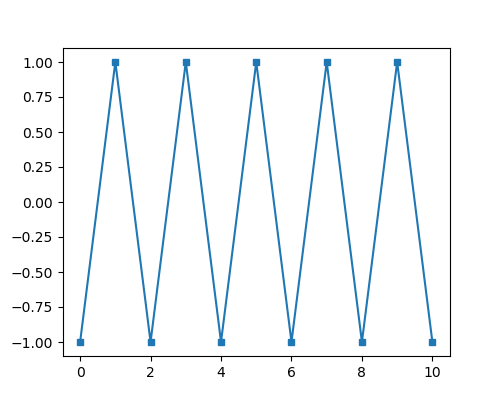

In [73]:
evol_tt = np.linspace(0,10,11)
y = np.empty(11)
for N,evo in enumerate(evol_tt):
    if N%2 == 1:
        y[N] = 1.
    else:
        y[N] = -1.

fig, ax = plt.subplots(figsize = (5,4))
ax.plot(evol_tt, y, 's-', markersize = 4)
    

In [447]:
6%2

0

In [473]:
b1 = np.empty(3)
print b1

[ 0.  0.  0.]


In [14]:
%%latex 
$$\sqrt{a_2 + b^2}$$

<IPython.core.display.Latex object>

VGFiKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShIQm94KGNoaWxkcmVuPShEcm9wZG93bihkZXNjcmlwdGlvbj11J25hbWUnLCBvcHRpb25zPSh1J1ZyZicsIHUnZFZyZicpLCB2YWx1ZT11J1bigKY=


<IPython.core.display.Javascript object>


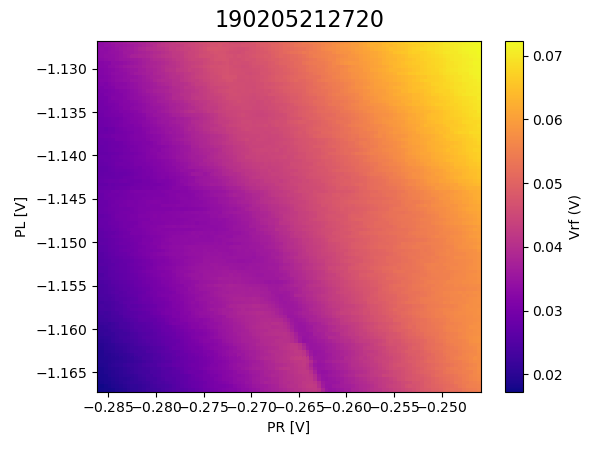

In [74]:
d = ex.load_data('190205212720')
tk.plot(d)